# Economic Data Analysis

In [1]:
# Data processing
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import textwrap
import datetime

%matplotlib inline

import locale # For currency formatting
locale.setlocale(locale.LC_ALL, '')

# Common DGLIM utilities
import dglim
dglim.setProjectPath('../')
dglim.usePlotStyle()

In [2]:
data_path = '../Datasets/'

master_df = dglim.loadData('Master Dataset')

merged_locations_df = master_df.drop_duplicates(subset=['GRU ID', 'Address'])
len(merged_locations_df)

5528

## Gather CSI Data

In [3]:
economic_data_path = data_path + 'Economic Data/'

national_csi_df = pd.read_csv('../Datasets/Economic Data/nationwide consumer sentiment (formatted).csv')
national_csi_df = national_csi_df.groupby('Year').mean()
national_csi_df.rename(columns={'Consumer Sentiment Index' : 'National CSI'}, inplace=True)

national_csi_df[:1]

National CSI
Year              
1952          86.2

In [4]:
# USING FLORIDA-WIDE CSI

# local_csi_df = pd.read_excel(economic_data_path + 'csi_history_2018-03.xls')
# # csi_df.set_index(keys=['Year'], inplace=True)
# local_csi_df.drop(labels=['Unnamed: 9'], axis='columns', inplace=True)
# local_csi_df.dropna(inplace=True)
# local_csi_df.rename(columns={'Index value' : 'Local CSI'}, inplace=True)
# local_csi_df = local_csi_df.groupby('Year').mean()

# local_csi_df[:1]

In [113]:
len(local_csi_df)

25

In [5]:
# USING GAINESVILLE MSA CSI

local_csi_df = pd.read_excel(economic_data_path + 'CSI - Gainesville MSA.xlsx') \
    .drop(labels=[
            'Unnamed: 0',
            'msa_nm'
        ], axis='columns') \
    .dropna() \
    .rename(columns={
            'year' : 'Year',
            'uf_csi' : 'Local CSI'
        }) \
    .groupby('Year').mean()

local_csi_df[:1]

Local CSI
Year           
1993   87.74644

In [6]:
csi_df = pd.DataFrame(index=national_csi_df.index.join(local_csi_df.index))
csi_df = csi_df.join(national_csi_df, how='outer')
csi_df = csi_df.join(local_csi_df[['Local CSI']], how='outer')

csi_df['National CSI Change'] = csi_df['National CSI'].diff()
csi_df['Local CSI Change'] = csi_df['Local CSI'].diff()

csi_df.dropna()[:1]

National CSI  Local CSI  National CSI Change  Local CSI Change
Year                                                                
1994     92.266667   91.60355                9.475           3.85711

## Gather GDP Data

In [7]:
national_gdp_df = pd.read_csv(economic_data_path + 'Real GDP (formatted).csv')
national_gdp_df.drop(axis='columns', labels=['Line', 'Category ID'], inplace=True)
national_gdp_df.set_index('Category', inplace=True)
national_gdp_df = national_gdp_df.transpose()
national_gdp_df.index.rename('Year', inplace=True)
national_gdp_df.index = national_gdp_df.index.astype('int')
national_gdp_df.rename(columns={'    Gross domestic product' : 'National Real GDP'}, inplace=True)
national_gdp_df['National Real GDP'] = national_gdp_df['National Real GDP'].astype('float64')
national_gdp_df['National Real GDP Change'] = national_gdp_df['National Real GDP'].diff()
national_gdp_df['National Real GDP Percentage Change'] = national_gdp_df['National Real GDP'].pct_change()

national_gdp_df[:1]

Category  National Real GDP Personal consumption expenditures   Goods  \
Year                                                                    
1929                  7.328                             7.931   8.646   

Category     Durable goods     Nondurable goods   Services  \
Year                                                         
1929                 3.133               13.890      6.988   

Category Gross private domestic investment   Fixed investment  \
Year                                                            
1929                                 6.581              7.600   

Category     Nonresidential       Structures  \
Year                                           
1929                  5.450           32.650   

Category                 ...                   Imports     Goods     Services  \
Year                     ...                                                    
1929                     ...                     2.655     2.586        3.105   

Category Government consumption expenditures and gross investment   Federal  \
Year                                                                          
1929                                                  5.365           2.127   

Category     National defense     Nondefense   State and local  \
Year                                                             
1929                    1.829          2.811            10.434   

Category National Real GDP Change National Real GDP Percentage Change  
Year                                                                   
1929                          NaN                                 NaN  

[1 rows x 28 columns]

In [8]:
# Note: this "local gdp"  the Gainesville MSA, which includes Alachua and Gilchrest counties
local_gdp_df = pd.read_csv(economic_data_path + 'Gainesville Real GDP.csv')
local_gdp_df.drop(axis='columns', labels=['Area', 'IndCode'], inplace=True)
local_gdp_df.set_index('Industry', inplace=True)
local_gdp_df = local_gdp_df.transpose()
local_gdp_df.index.rename('Year', inplace=True)
local_gdp_df.index = local_gdp_df.index.astype('int')
local_gdp_df.rename(columns={'All industry total' : 'Gainesville Real GDP'}, inplace=True)
local_gdp_df['Gainesville Real GDP'] = local_gdp_df['Gainesville Real GDP'].astype('float64')
local_gdp_df['Gainesville Real GDP Change'] = local_gdp_df['Gainesville Real GDP'].diff()
local_gdp_df['Gainesville Real GDP Percentage Change'] = local_gdp_df['Gainesville Real GDP'].pct_change()

local_gdp_df

Industry  Gainesville Real GDP   Private industries  \
Year                                                  
2001                    81.015                78.07   
2002                    82.824               80.771   
2003                    83.307               83.797   
2004                    91.738               88.292   
2005                    93.205               93.345   
2006                    96.625               97.529   
2007                   102.139              102.674   
2008                   101.998               104.05   
2009                   100.000                  100   
2010                   100.558              100.548   
2011                    98.230               97.976   
2012                    99.568               98.381   
2013                   104.766               106.35   
2014                   101.458              101.077   
2015                   102.260              102.126   
2016                   104.801              105.093   

Industry     Agriculture, forestry, fishing, and hunting       Farms  \
Year                                                                   
2001                                                 (D)     168.196   
2002                                                 (D)     105.139   
2003                                                 (D)      99.613   
2004                                                 (D)     112.954   
2005                                                 (D)     125.009   
2006                                                 (D)     105.314   
2007                                                 (D)      61.436   
2008                                                 (D)      87.732   
2009                                                 (D)         100   
2010                                                 (D)     175.562   
2011                                                 (D)     159.311   
2012                                                 (D)      194.53   
2013                                                 (D)     166.966   
2014                                                 (D)      248.98   
2015                                                 (D)     262.133   
2016                                                 (D)        (NA)   

Industry       Forestry, fishing, and related activities  \
Year                                                       
2001                                                 (D)   
2002                                                 (D)   
2003                                                 (D)   
2004                                                 (D)   
2005                                                 (D)   
2006                                                 (D)   
2007                                                 (D)   
2008                                                 (D)   
2009                                                 (D)   
2010                                                 (D)   
2011                                                 (D)   
2012                                                 (D)   
2013                                                 (D)   
2014                                                 (D)   
2015                                                 (D)   
2016                                                (NA)   

Industry     Mining, quarrying, and oil and gas extraction  \
Year                                                         
2001                                                   (D)   
2002                                                   (D)   
2003                                                   (D)   
2004                                                   (D)   
2005                                                   (D)   
2006                                                   (D)   
2007                                                   (D)   
2008                                                   (D)   
2009       

## Gather Unemployment Data

In [160]:
# Load data and drop excess headers
temp_df = pd.read_excel(economic_data_path + 'Unemployment.xlsx')[9:]

# Use first row as column labels
temp_df.columns = temp_df.iloc[0]
temp_df = temp_df.reindex(temp_df.index.drop(9))

# Use year as index
temp_df = temp_df.set_index('Year')
temp_df.columns.name = None

# Use numpy floats
temp_df['Annual'] = temp_df['Annual'].astype('float64')

local_unemployment_df = temp_df[['Annual']].rename(columns={'Annual' : 'Unemployment Rate'})
local_unemployment_df[:1]

Unemployment Rate
Year                   
1990                3.8

## Gather Business Data

In [9]:
lifespans_path = data_path + 'BusinessesWithEndDateAndLifespan/'

active_businesses_df = pd.read_csv(lifespans_path + 'ActiveBusinesses.csv')
inactive_business_df = pd.read_csv(lifespans_path + 'InactiveBusinesses.csv')
inactive_business_bType = pd.read_csv(lifespans_path + 'InactiveBusinessesWithBusinessType.csv', usecols=['business_type','id'])

*** Add business type of inactive businesses to the dataset ***

In [10]:
inactive_business_df['business_type'] = inactive_business_df['id'].map(inactive_business_bType.set_index('id')['business_type'])

In [11]:
## Converting date from String to Datetime format for inactive_business_df
inactive_business_df['start_date'] = pd.to_datetime(inactive_business_df['start_date'])
inactive_business_df['out_of_business'] = pd.to_datetime(inactive_business_df['out_of_business'])

In [12]:
## Converting date from String to Datetime format for active_business_df
active_businesses_df['start_date'] = pd.to_datetime(active_businesses_df['start_date'])
active_businesses_df['out_of_business'] = pd.to_datetime(active_businesses_df['out_of_business'])

In [13]:
naics_bus_types = pd.read_excel(data_path + 'NAICS_BusinessTypes.xlsx')

In [14]:
naics_bus_types

Business types  \
0                                BEAUTY PARLOR   
1                                 PHOTOGRAPHER   
2                         PHYSICIAN/SURGEON MD   
3                            MASSAGE THERAPIST   
4                              ATTORNEY/LAWYER   
5               BARBER/COSMETOLOGIST/NAIL TECH   
6       AUTO-TRANSFER, HAULING OR DELIVERY CO.   
7                                    ARCHITECT   
8                                   CONSULTANT   
9                                SERVICE-OTHER   
10           LAUNDRY-SELF SERVICE OR AUTOMATIC   
11                          AUTO REPAIR GARAGE   
12          CONTRACTOR-PLUMBER/INCL. GAS LINES   
13                           COMPUTER ANALYSTS   
14                          SCHOOL-KARATE/JUDO   
15                 MANUFACTURING-FOOD PRODUCTS   
16                                  RESTAURANT   
17                                  LABORATORY   
18                           PEDDLER-FOOD CART   
19                             RETAIL MERCHANT   
20           BOOKKEEPING OR INCOME TAX SERVICE   
21                 SCHOOL NOT OTHERWISE LISTED   
22                    PROFESSIONAL-ACUPUNCTURE   
23                 EXERCISE OR TRAINING STUDIO   
24         NURSERY SCHOOL AND/OR CHILD DAYCARE   
25         REPAIRS NOT REQUIRING STATE LICENSE   
26   INTERIOR JANITORIAL AND CLEANING SERVICES   
27                    INSURANCE AGENT -1 AGENT   
28                               LAND SURVEYOR   
29                          ACCOUNTANT/AUDITOR   
..                                         ...   
258           WATCHMAN, GUARD OR PATROL AGENCY   
259          CONTRACTOR-CONCRETE, STONE, BRICK   
260                            BUSINESS SCHOOL   
261                              SWIMMING POOL   
262                              NOTARY PUBLIC   
263                           CONTRACTOR-OTHER   
264                            RINKS AND PARKS   
265       CONTRACTOR-FLOOR SANDING & FINISHING   
266                    DATA PROCESSING SERVICE   
267       TREE SERVICE-TRIMMING & PRUNING ONLY   
268                                  ORTHOTIST   
269                     LIMOSINES WITH DRIVERS   
270          WHOLESALE BAKERY SALES - NO PLANT   
271      NEWSPAPER - 6 OR MORE WEEKLY EDITIONS   
272                                  GEOLOGIST   
273                      AUTO-RECOVERY SERVICE   
274               THEATER SEATING 500 OR FEWER   
275                      REAL ESTATE APPRAISER   
276                  CAR/TRUCK RENTALS/LEASING   
277                AUTO STORAGE OR PARKING LOT   
278             BANQUET HALL/CONFERENCE CENTER   
279                     HEARING AID CONSULTANT   
280             INVESTMENT ADVISER FIRM/BRANCH   
281                          BRIDAL CONSULTANT   
282    PHOTO/FILM DEVELOPER - NOT PHOTOGRAPHER   
283           SAND, DIRT, ROCK OR SHELL DEALER   
284   MANUFACTURING-SILK/CUT FLORAL ARRAN ONLY   
285                      COIN-OP/MUSIC MACHINE   
286              PROFESSIONAL-ATHLETIC TRAINER   
287                        ARMORED CAR SERVICE   

                                  NAICS Business Type  
0                                      Other Services  
1                 Arts, Entertainment, and Recreation  
2                   Health Care and Social Assistance  
3                   Health Care and Social Assistance  
4    Professional, Scientific, and Technical Services  
5                                      Other Services  
6                      Transportation and Warehousing  
7    Professional, Scientific, and Technical Services  
8    Professional, Scientific, and Technical Services  
9    Professional, Scientific, and Technical Services  
10   Professional, Scientific, and Technical Services  
11   Professional, Scientific, and Technical Services  
12                                       Construction  
13   Professional, Scientific, and Technical Services  
14                               Educational Services  
15                    Accommodation

In [15]:
def getNAICSBusinessType(business_type):
    temp_series = naics_bus_types['NAICS Business Type'][naics_bus_types['Business types'] == business_type]
    if len(temp_series):
        return temp_series.iloc[0]
    else:
        return "Not found"

In [16]:
inactive_business_df

business_type     id  \
0                                        NaN  32306   
1                                        NaN  21953   
2                                        NaN  21954   
3                                        NaN  21955   
4                                        NaN  35468   
5                                        NaN  21951   
6                                        NaN  21952   
7                                        NaN  36018   
8                                        NaN  28081   
9                                        NaN  30769   
10                                       NaN  24950   
11                                       NaN  30304   
12                                       NaN  21961   
13                                       NaN  24230   
14                                       NaN  34749   
15                                       NaN  30986   
16                           BUSINESS BROKER  40963   
17                                       NaN  23869   
18                                       NaN  24919   
19                           RETAIL MERCHANT  16532   
20                           RETAIL MERCHANT  37247   
21                                       NaN  10005   
22                                       NaN  26551   
23                                       NaN  30650   
24                                       NaN  10007   
25                                       NaN  10010   
26                                       NaN  10011   
27                                       NaN  27071   
28                                       NaN  29389   
29                                       NaN  10015   
...                                      ...    ...   
8621                                     NaN  33027   
8622                      ADVERTISING AGENCY  25278   
8623                                     NaN  26297   
8624                      WHOLESALE MERCHANT  38191   
8625                                     NaN  26866   
8626                                     NaN  35549   
8627                                     NaN  21914   
8628                                     NaN  28611   
8629                                     NaN  33985   
8630                                     NaN  21922   
8631                                     NaN  24585   
8632                                     NaN  24778   
8633                                     NaN  22643   
8634                                     NaN  36751   
8635                                     NaN  33498   
8636  AUTO-TRANSFER, HAULING OR DELIVERY CO.  40750   
8637                                     NaN  27409   
8638                                     NaN  26579   
8639                                     NaN  34647   
8640                                     NaN  34648   
8641                                     NaN  25462   
8642                                     NaN  30259   
8643                                     NaN  33173   
8644                                     NaN  28869   
8645                                     NaN  29336   
8646                      AUTO REPAIR GARAGE  40347   
8647                                     NaN  27649   
8648                                     NaN  21940   
8649                                     NaN  21942   
8650                                     NaN  33811   

                                         name start_date  \
0                         D'S TEE'S AND TINGS 2005-03-12   
1                        13TH ST. DAIRY QUEEN 1995-01-20   
2             13TH ST. MOBILE HOME CENTER INC 1980-01-01   
3            13TH ST. MOBILE HOME CENTER INC. 1995-05-10   
4                          1ST CLASS FLOORING 2008-05-08   
5                        1ST PLACE AUTO SALES 1995-04-01   
6                     1ST STREET LEGAL CENTER 1995-12-01   
7                              205 PIZZA, LLC 2008-07-01   
8                   21ST CENTURY FROZEN FOODS 2002-07-16   
9                   

In [17]:
active_businesses_df['NAICS Business Type'] = active_businesses_df['business_type'].apply(getNAICSBusinessType)
inactive_business_df['NAICS Business Type'] = inactive_business_df['business_type'].apply(getNAICSBusinessType)

In [18]:
print 'Number of inactive businesses:', len(inactive_business_df)
print 'Entries with business type:', len(inactive_business_df.dropna(subset=['business_type']))
print 'Entries with NAICS type:', len(inactive_business_df[inactive_business_df['NAICS Business Type'] != 'Not found'])

Number of inactive businesses: 8651
Entries with business type: 1272
Entries with NAICS type: 1074


### Number of duplicate active businesses

In [19]:
# Look for duplicate active businesses
counts = active_businesses_df['id'].value_counts()

counts = counts.apply(lambda x: x - 1)
duplicates = counts.sum()
total = len(active_businesses_df)

print str(duplicates) + '/' + str(total) + ' are duplicates (' + str(100.0*duplicates/total) + '%)'

1521/7087 are duplicates (21.4618315225%)


### Number of duplicate inactive businesses

In [20]:
# Look for duplicate inactive businesses
counts = inactive_business_df['name'].value_counts()

counts = counts.apply(lambda x: x - 1)
duplicates = counts.sum()
total = len(inactive_business_df)

print str(duplicates) + '/' + str(total) + ' are duplicates (' + str(100.0*duplicates/total) + '%)'

147/8651 are duplicates (1.69922552306%)


### Number of inactive businesses that have no "Business Type"

In [21]:
# Count entries missing business_type
business_types = inactive_business_df['business_type'].apply(lambda x: 0 if str(x) == 'nan' else 1)

total_count = len(business_types)

listed_count = business_types.sum()
unlisted_count = total_count - listed_count

print 'Businesses with types listed:', str(listed_count) + '/' + str(total_count), str(100.0*listed_count/total_count) + '%'
print 'Businesses without types listed:', str(unlisted_count) + '/' + str(total_count), str(100.0*unlisted_count/total_count) + '%'

Businesses with types listed: 1272/8651 14.7035024853%
Businesses without types listed: 7379/8651 85.2964975147%


# Consumer Sentiment Index

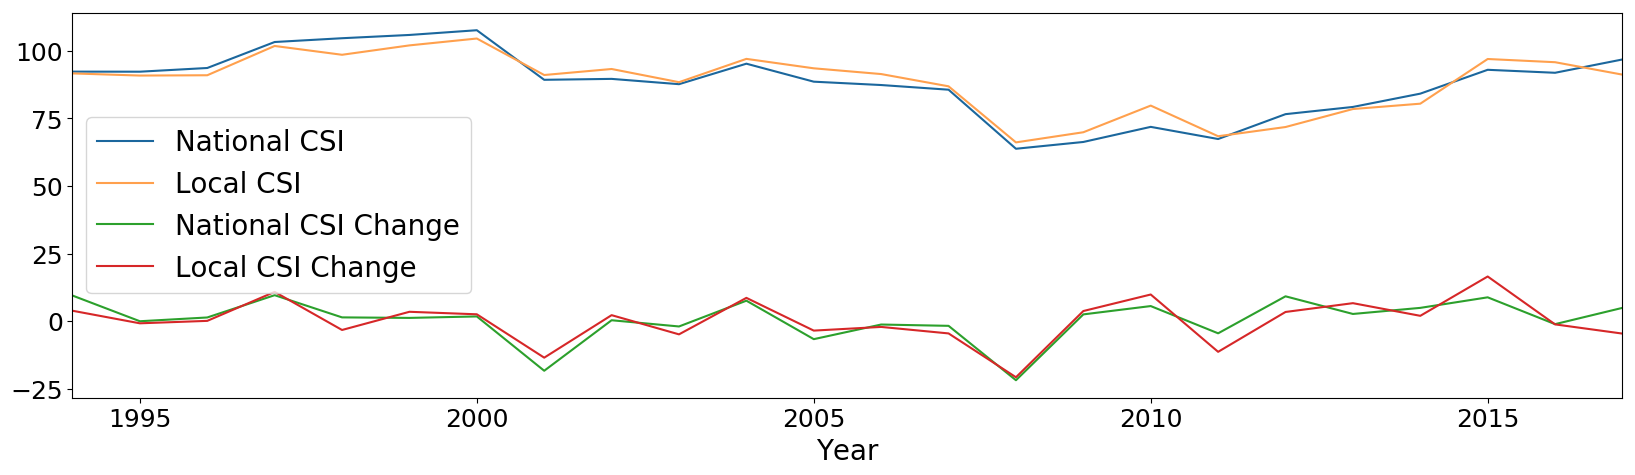

In [119]:
csi_df.dropna().plot(figsize=(20, 5))

### Other stuff

In [23]:
act_bus_copy = active_businesses_df.copy()

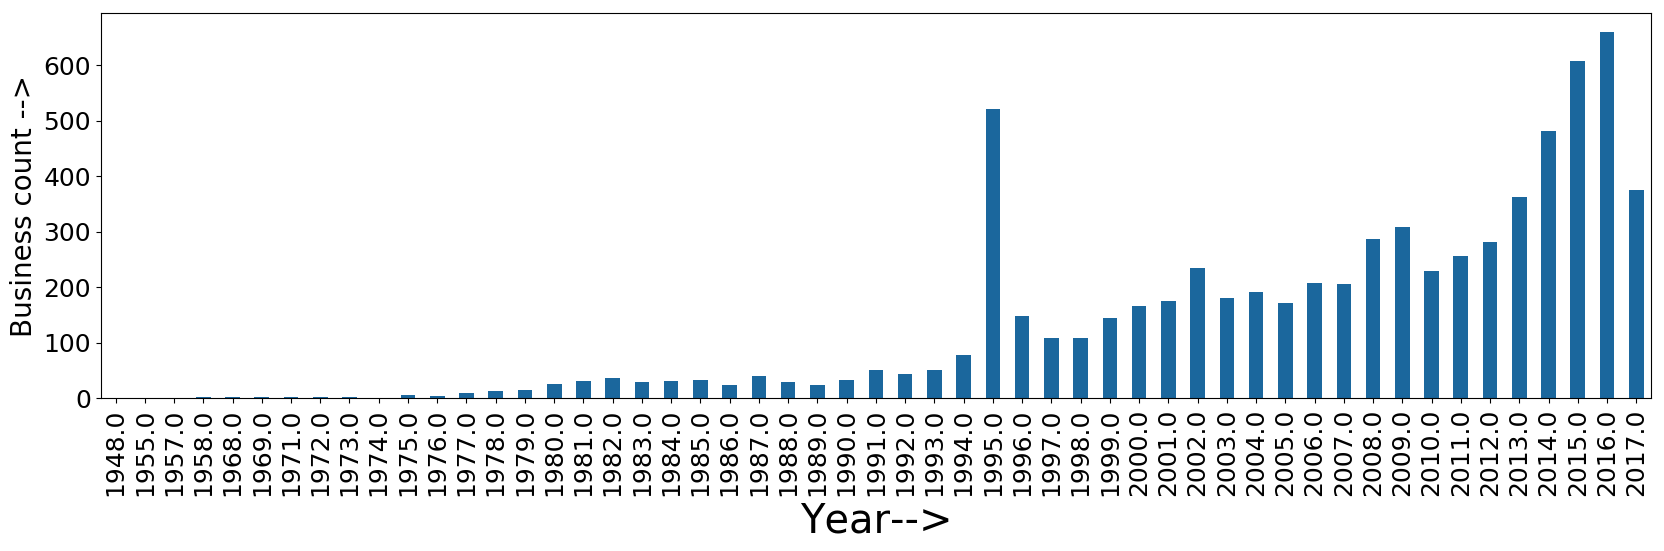

In [24]:
ax = master_df['Start Date'].dt.year.value_counts().sort_index().plot(kind='bar',figsize=(20, 5))
ax.set_xlabel('Year-->',size='x-large')
ax.set_ylabel('Business count -->')

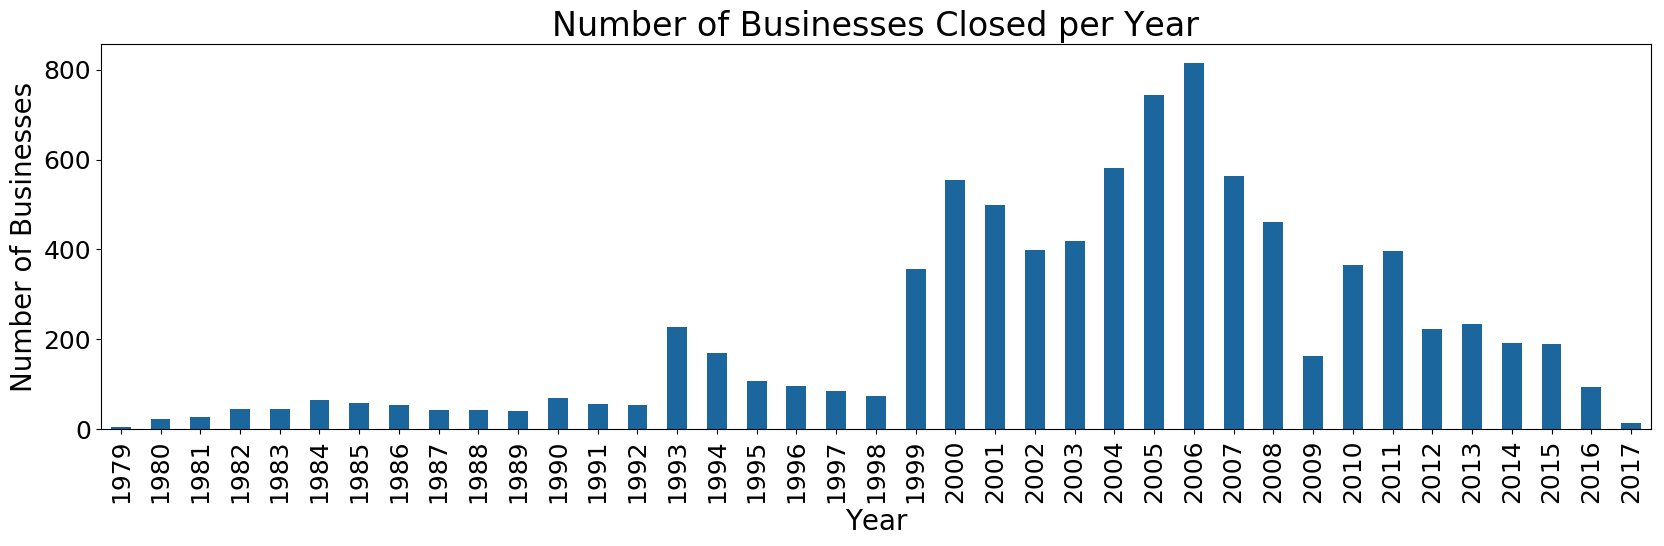

In [25]:
temp_df = inactive_business_df#[inactive_business_df['NAICS Business Type'] == ' Health Care and Social Assistance']
ax = temp_df['out_of_business'].dt.year.value_counts().sort_index().plot(kind='bar',figsize=(20, 5))
ax.set_title('Number of Businesses Closed per Year')
ax.set_ylabel('Number of Businesses')
ax.set_xlabel('Year')

In [26]:
df_act_bus_by_start_year = master_df['Start Date'].dt.year.value_counts().sort_index()
df_inAct_bus_by_start_year = inactive_business_df['start_date'].dt.year.value_counts().sort_index()
sum(df_inAct_bus_by_start_year)

8651

In [27]:
df_stacked = pd.concat([df_act_bus_by_start_year, df_inAct_bus_by_start_year], axis=1).fillna(0)
df_stacked.columns=['ActiveBusCnt','InactiveBusCnt']
df_stacked['totalBusCnt']  = df_stacked['ActiveBusCnt'] + df_stacked['InactiveBusCnt']

# Drop data before 1977
df_stacked.drop([x for x in df_stacked.index if int(x) < 1977 or int(x) > 2018], axis='index', inplace=True)

df_stacked

ActiveBusCnt  InactiveBusCnt  totalBusCnt
1977.0          10.0            19.0         29.0
1978.0          13.0            17.0         30.0
1979.0          15.0            57.0         72.0
1980.0          26.0           105.0        131.0
1981.0          32.0            96.0        128.0
1982.0          36.0           100.0        136.0
1983.0          29.0            92.0        121.0
1984.0          32.0           112.0        144.0
1985.0          33.0            98.0        131.0
1986.0          24.0           120.0        144.0
1987.0          41.0            99.0        140.0
1988.0          30.0           122.0        152.0
1989.0          24.0           104.0        128.0
1990.0          33.0           139.0        172.0
1991.0          51.0           102.0        153.0
1992.0          44.0           147.0        191.0
1993.0          51.0           157.0        208.0
1994.0          78.0           153.0        231.0
1995.0         520.0           212.0        732.0
1996.0         149.0           280.0        429.0
1997.0         109.0           234.0        343.0
1998.0         109.0           287.0        396.0
1999.0         144.0           394.0        538.0
2000.0         166.0           435.0        601.0
2001.0         175.0           424.0        599.0
2002.0         235.0           526.0        761.0
2003.0         181.0           490.0        671.0
2004.0         191.0           600.0        791.0
2005.0         172.0           600.0        772.0
2006.0         207.0           495.0        702.0
2007.0         206.0           384.0        590.0
2008.0         286.0           191.0        477.0
2009.0         309.0           240.0        549.0
2010.0         230.0           205.0        435.0
2011.0         256.0           207.0        463.0
2012.0         281.0           141.0        422.0
2013.0         362.0           154.0        516.0
2014.0         482.0           129.0        611.0
2015.0         608.0            92.0        700.0
2016.0         660.0            38.0        698.0
2017.0         375.0             4.0        379.0

** Percentage of businesses active vs Year they started in **

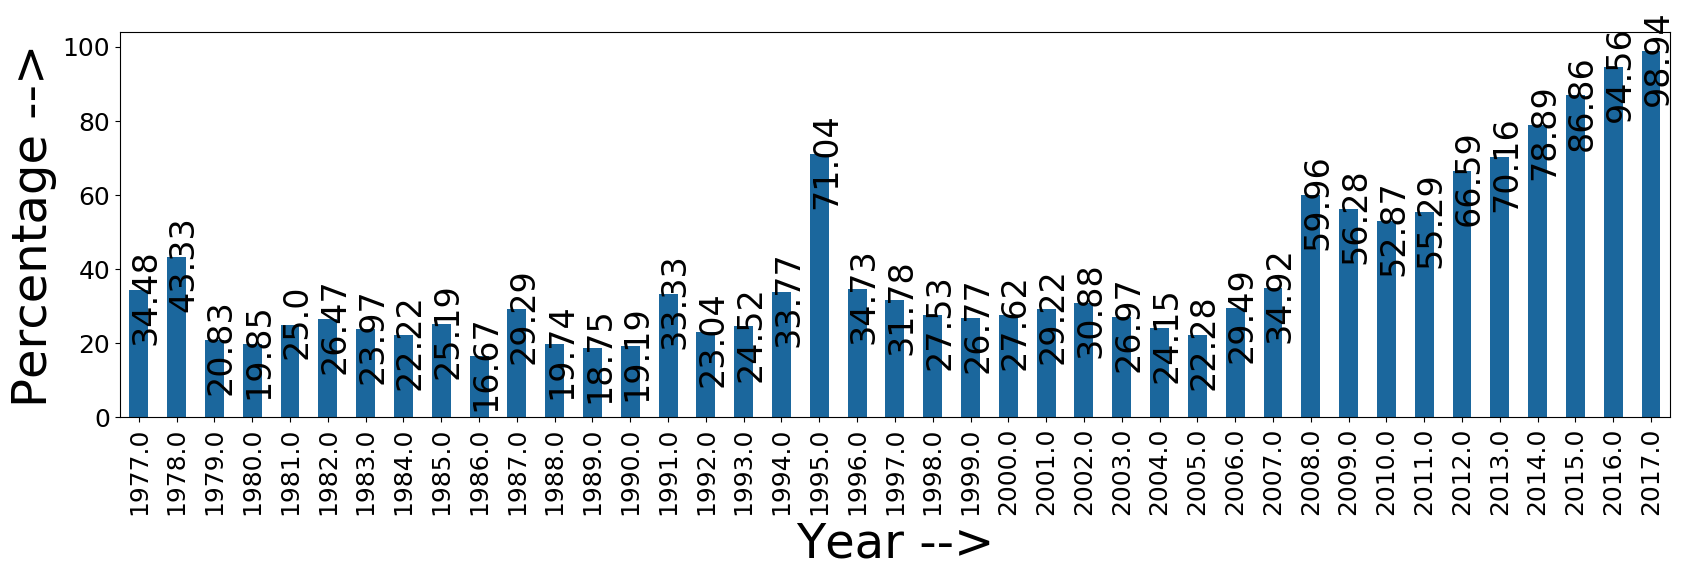

In [28]:
ax = (df_stacked['ActiveBusCnt']*100/df_stacked['totalBusCnt']).plot(kind='bar', figsize=(20,5))
ax.set_xlabel('Year -->' , size='xx-large')
ax.set_ylabel('Percentage -->' , size='xx-large')

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x(), p.get_height()+4), rotation =90, size='large')

# Active/Inactive Comparisons by Year

** Gather Data **

In [161]:
# Get inactive business dates
temp_inactive_df = pd.DataFrame();
temp_inactive_df['Start Date'] = inactive_business_df['start_date'].apply(lambda x: x.year)
temp_inactive_df['End Date'] = inactive_business_df['out_of_business'].apply(lambda x: x.year)

# Get active business dates
temp_active_df = pd.DataFrame();
temp_active_df['Start Date'] = merged_locations_df['Start Date'].apply(lambda x: x.year)
temp_active_df['End Date'] = np.nan

# Combine
temp_df = pd.DataFrame()
temp_df['Start Date'] = temp_inactive_df['Start Date'].tolist() + temp_active_df['Start Date'].tolist()
temp_df['End Date'] = temp_inactive_df['End Date'].tolist() + temp_active_df['End Date'].tolist()

# Only use years
temp_df['Start Date'] = temp_df['Start Date']
temp_df['End Date'] = temp_df['End Date']

# Count by year
year_counts_df = pd.DataFrame()
year_counts_df['Total Opened'] = temp_df['Start Date'].value_counts()
year_counts_df['Total Closed'] = temp_df['End Date'].value_counts()
year_counts_df['Still Active'] = temp_active_df['Start Date'].value_counts()
year_counts_df['No Longer Active'] = temp_inactive_df['Start Date'].value_counts()
year_counts_df.fillna(0, inplace=True)
year_counts_df.index = year_counts_df.index.astype('int').rename('Year')
year_counts_df.sort_index(inplace=True)
year_counts_df['Year'] = year_counts_df.index
year_counts_df['Net Change'] = year_counts_df['Total Opened'] - year_counts_df['Total Closed']
year_counts_df['Open Fraction'] = year_counts_df['Total Opened'] / (year_counts_df['Total Opened'] + year_counts_df['Total Closed'])
year_counts_df['Total Businesses'] = year_counts_df['Net Change'].cumsum()
year_counts_df['Percentage Change'] = year_counts_df['Total Businesses'].pct_change()

# Add economic data
year_counts_df = year_counts_df.join(csi_df, how='left')
year_counts_df = year_counts_df.join(national_gdp_df[['National Real GDP', 'National Real GDP Change', 'National Real GDP Percentage Change']], how='left')
year_counts_df = year_counts_df.join(local_gdp_df[['Gainesville Real GDP', 'Gainesville Real GDP Change', 'Gainesville Real GDP Percentage Change']], how='left')
year_counts_df = year_counts_df.join(local_unemployment_df, how='left')

# Shift things around
year_counts_df['National CSI (-2 Years)'] = year_counts_df['National CSI'].shift(-2)
year_counts_df['Local CSI (-2 Years)'] = year_counts_df['Local CSI'].shift(-2)

# Drop data before 1977
year_counts_df.drop([x for x in year_counts_df.index if x < 1977 or x > 2018], axis='index', inplace=True)

In [162]:
temp_df = year_counts_df


for i in range(0, 2):

    print;
    print '--- Since ', ('1977' if i == 0 else '1997'), '---'

    print;
    print "Local CSI correlation with National CSI:", temp_df['Local CSI'].corr(temp_df['National CSI'])

    print;
    print "Local CSI correlation with Net Change:", temp_df['Local CSI'].corr(temp_df['Net Change'])
    print "Local CSI correlation with Percent Change:", temp_df['Local CSI'].corr(temp_df['Percentage Change'])
    print "Local CSI correlation with Open Fraction:", temp_df['Local CSI'].corr(temp_df['Open Fraction'])

    print;
    print "National CSI correlation with Net Change:", temp_df['National CSI'].corr(temp_df['Net Change'])
    print "National CSI correlation with Percent Change:", temp_df['National CSI'].corr(temp_df['Percentage Change'])
    print "National CSI correlation with Open Fraction:", temp_df['National CSI'].corr(temp_df['Open Fraction'])

    print;
    print "Shifted Local CSI correlation with Net Change:", temp_df['Local CSI (-2 Years)'].corr(temp_df['Net Change'])
    print "Shifted Local CSI correlation with Percent Change:", temp_df['Local CSI (-2 Years)'].corr(temp_df['Percentage Change'])
    print "Shifted Local CSI correlation with Open Fraction:", temp_df['Local CSI (-2 Years)'].corr(temp_df['Open Fraction'])

    print;
    print "Shifted National CSI correlation with Net Change:", temp_df['National CSI (-2 Years)'].corr(temp_df['Net Change'])
    print "Shifted National CSI correlation with Percent ChangeLocal CSI:", temp_df['National CSI (-2 Years)'].corr(temp_df['Percentage Change'])
    print "Shifted National CSI correlation with Open Fraction:", temp_df['National CSI (-2 Years)'].corr(temp_df['Open Fraction'])

    print;
    print "Unemployment Rate correlation with Net Change:", temp_df['Unemployment Rate'].corr(temp_df['Net Change'])
    print "Unemployment Rate correlation with Percent Change:", temp_df['Unemployment Rate'].corr(temp_df['Percentage Change'])
    print "Unemployment Rate correlation with Open Fraction:", temp_df['Unemployment Rate'].corr(temp_df['Open Fraction'])

    temp_df = temp_df[temp_df.index >= 1997]


--- Since  1977 ---

Local CSI correlation with National CSI: 0.951601327044

Local CSI correlation with Net Change: 0.203431343128
Local CSI correlation with Percent Change: 0.20265965628
Local CSI correlation with Open Fraction: 0.218817349805

National CSI correlation with Net Change: 0.258440004812
National CSI correlation with Percent Change: -0.279092830016
National CSI correlation with Open Fraction: 0.00691427002878

Shifted Local CSI correlation with Net Change: 0.595824817509
Shifted Local CSI correlation with Percent Change: 0.569226842857
Shifted Local CSI correlation with Open Fraction: 0.57639285101

Shifted National CSI correlation with Net Change: 0.561264384962
Shifted National CSI correlation with Percent ChangeLocal CSI: -0.113149763396
Shifted National CSI correlation with Open Fraction: 0.0337720612398

Unemployment Rate correlation with Net Change: -0.0199807967941
Unemployment Rate correlation with Percent Change: -0.181506037809
Unemployment Rate correlation wi

National CSI correlation with National Change in GDP: 0.729528279828


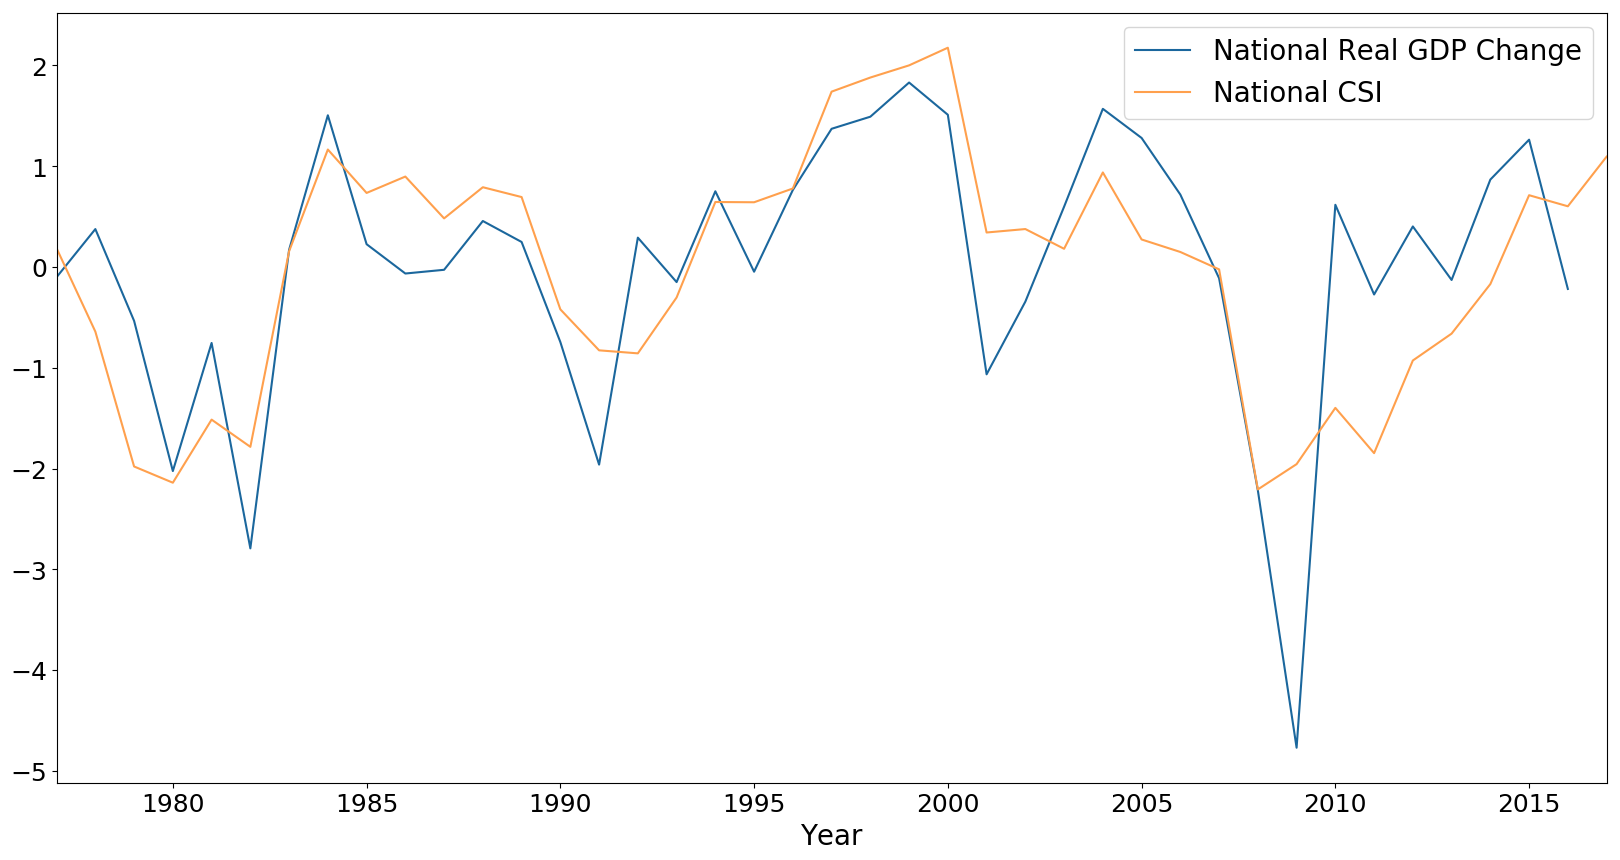

In [34]:
temp_df = year_counts_df.copy()
temp_df['National CSI'] = (temp_df['National CSI'] - temp_df['National CSI'].mean())/10
temp_df['National Real GDP Change'] = (temp_df['National Real GDP Change'] - temp_df['National Real GDP Change'].mean())
temp_df[['National Real GDP Change', 'National CSI']].plot()

print "National CSI correlation with National Change in GDP:", year_counts_df['National CSI'].corr(year_counts_df['National Real GDP Change'])

Local CSI correlation with Gainesville Change in GDP: 0.532960917988


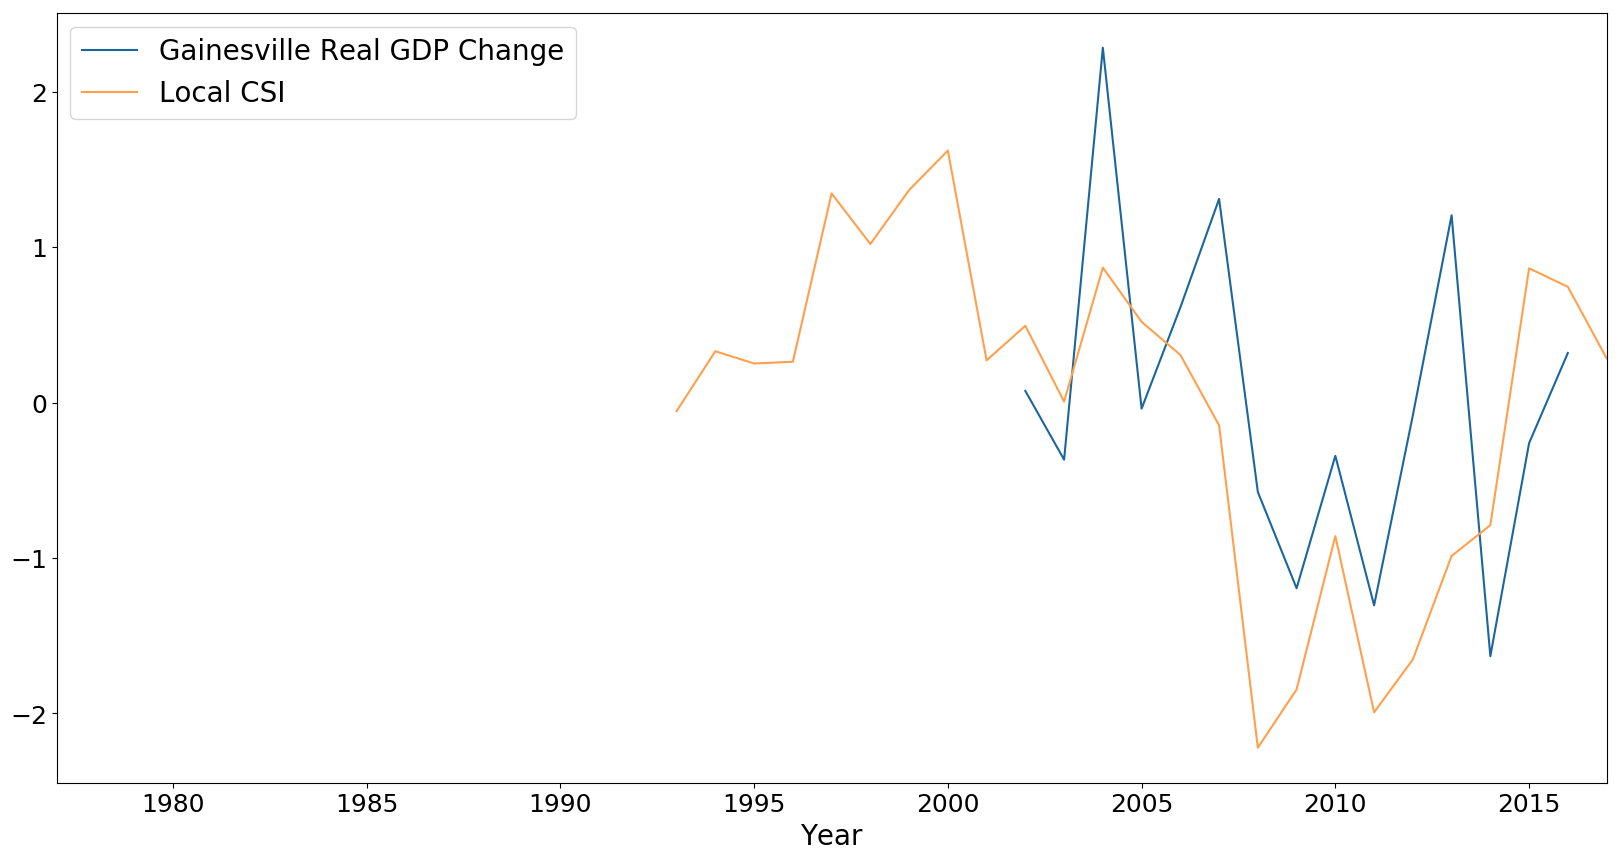

In [35]:
temp_df = year_counts_df.copy()
temp_df['Local CSI'] = (temp_df['Local CSI'] - temp_df['Local CSI'].mean())/10
temp_df['Gainesville Real GDP Change'] = (temp_df['Gainesville Real GDP Change'] - temp_df['Gainesville Real GDP Change'].mean())/3
temp_df[['Gainesville Real GDP Change', 'Local CSI']].plot()

print "Local CSI correlation with Gainesville Change in GDP:", year_counts_df['Local CSI'].corr(year_counts_df['Gainesville Real GDP Change'])

** Still active vs. out of business **

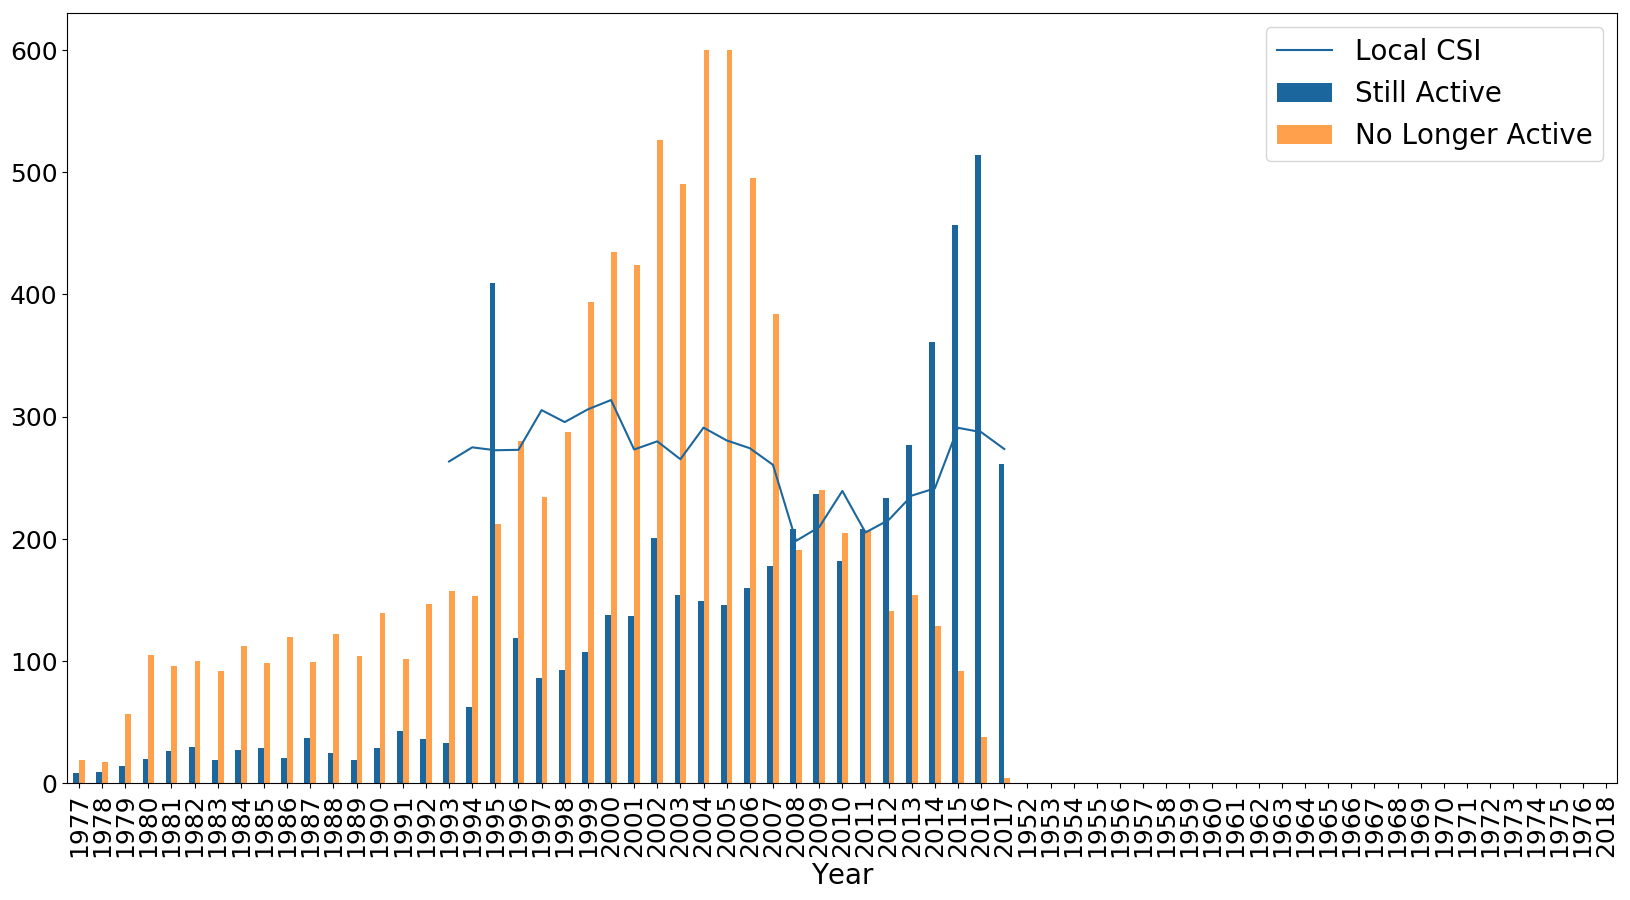

In [36]:
left_2013 = pd.DataFrame({
    'Year': year_counts_df.index.astype('str'),
    'Still Active': year_counts_df['Still Active'].values
})

right_2014 = pd.DataFrame(
    {'Year': year_counts_df.index.astype('str'),
     'No Longer Active': year_counts_df['No Longer Active'].values})

right_2014_target = pd.DataFrame(
    {'Year': csi_df.index.astype('str'),
     'Local CSI': csi_df['Local CSI'].values * 3})

# df_13_14 = pd.merge(left_2013, right_2014, how='outer')
df_13_14 = pd.DataFrame({
    'Year': year_counts_df.index.astype('str'),
    'Still Active': year_counts_df['Still Active'].values,
    'No Longer Active': year_counts_df['No Longer Active'].values
})

df_13_14_target = pd.merge(df_13_14, right_2014_target, how='outer')

ax = df_13_14_target[['Year', 'Local CSI']].plot(x='Year', linestyle='-')
df_13_14_target[['Year', 'Still Active', 'No Longer Active']].plot(x='Year', kind='bar', ax=ax)

plt.show()

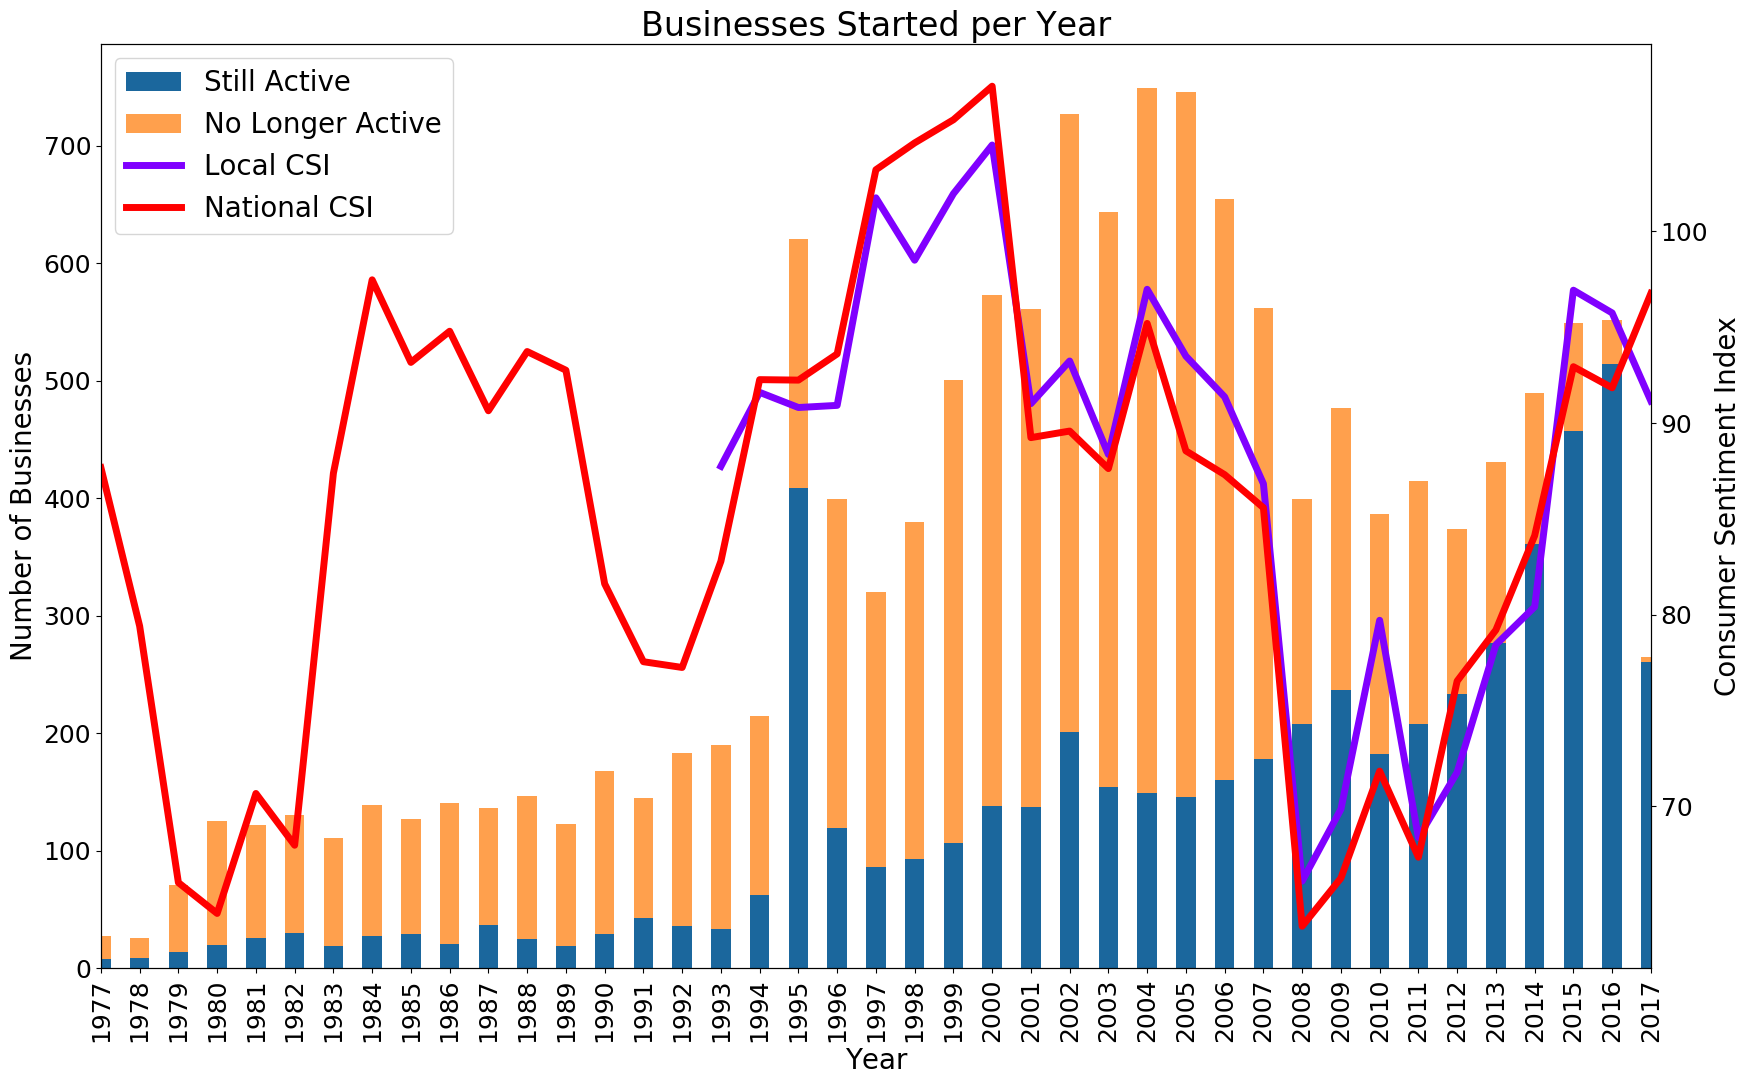

In [37]:
# For whatever reason, multiple plots only works if the x axis is a string value
temp_df = year_counts_df.copy()
temp_df['Year'] = temp_df['Year'].astype('str')

## PLOTTING ##
fig, ax1 = plt.subplots(1, 1)
temp_df[['Year', 'Still Active','No Longer Active']].plot(
    ax=ax1, figsize=(20, 12), rot=90,
    kind='bar', stacked=True,
    x='Year')

ax2 = ax1.twinx()
temp_df[['Year', 'Local CSI', 'National CSI']].plot(
    ax=ax2, mark_right=False,
    linestyle='-', colormap='rainbow', linewidth=5,
    x='Year')

# Figure
ax1.set_title('Businesses Started per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Businesses')
ax2.set_ylabel('Consumer Sentiment Index')

# Hide old legends
ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)

# Make new legend
ax1_handles, ax1_labels = ax1.get_legend_handles_labels()
ax2_handles, ax2_labels = ax2.get_legend_handles_labels()
plt.legend(ax1_handles + ax2_handles, ax1_labels + ax2_labels, loc=2)

# ax.legend(['Consumer Sentiment Index', 'Still active', 'No longer active'], loc=2)

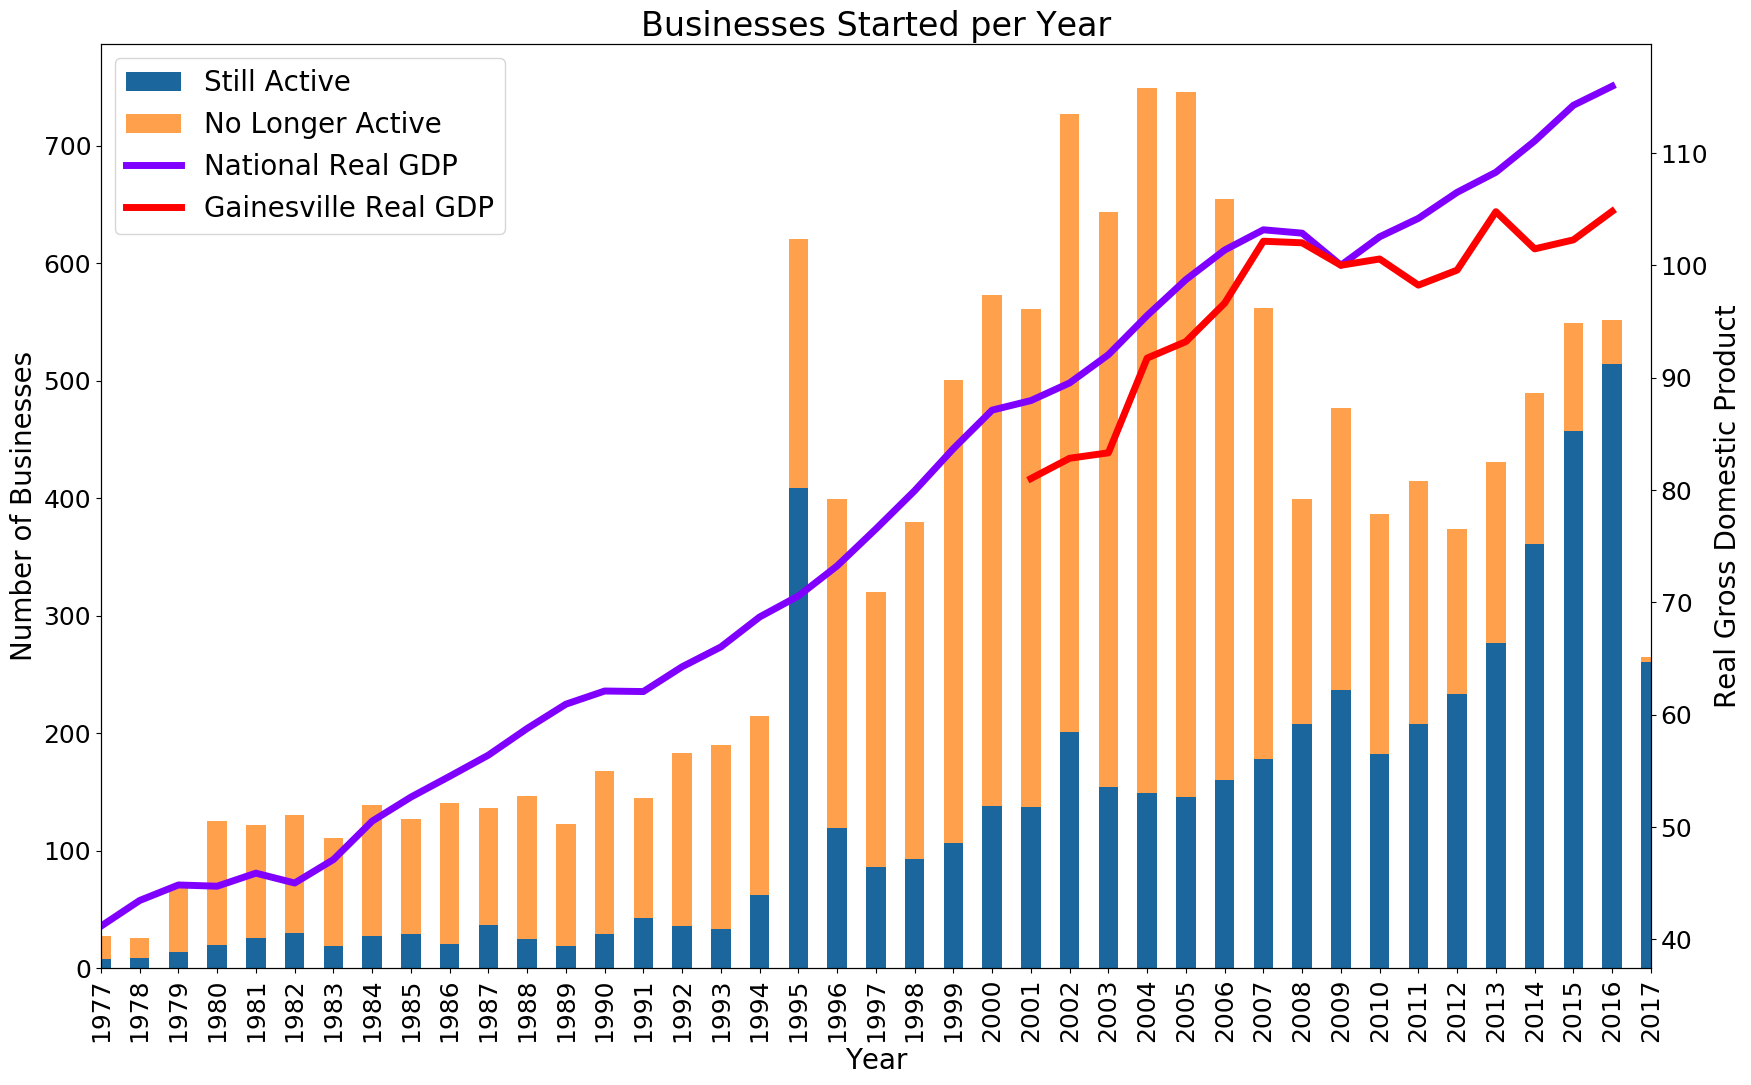

In [38]:
# For whatever reason, multiple plots only works if the x axis is a string value
temp_df = year_counts_df.copy()
temp_df['Year'] = temp_df['Year'].astype('str')

## PLOTTING ##
fig, ax1 = plt.subplots(1, 1)
temp_df[['Year', 'Still Active','No Longer Active']].plot(
    ax=ax1, figsize=(20, 12), rot=90,
    kind='bar', stacked=True,
    x='Year')

ax2 = ax1.twinx()
temp_df[['Year', 'National Real GDP', 'Gainesville Real GDP']].plot(
    ax=ax2, mark_right=False,
    linestyle='-', colormap='rainbow', linewidth=5,
    x='Year')

# Figure
ax1.set_title('Businesses Started per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Businesses')
ax2.set_ylabel('Real Gross Domestic Product')

# Hide old legends
ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)

# Make new legend
ax1_handles, ax1_labels = ax1.get_legend_handles_labels()
ax2_handles, ax2_labels = ax2.get_legend_handles_labels()
plt.legend(ax1_handles + ax2_handles, ax1_labels + ax2_labels, loc=2)

In [39]:
print plt.rcParams

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.mencoder_args: []
animation.mencoder_path: mencoder
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: k
axes.facecolor: w
axes.formatter.limits: [-7, 7]
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.hold: None
axes.labelcolor: k
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', [u'#1b679d', u'#ffa04d', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf'])
axes.spines

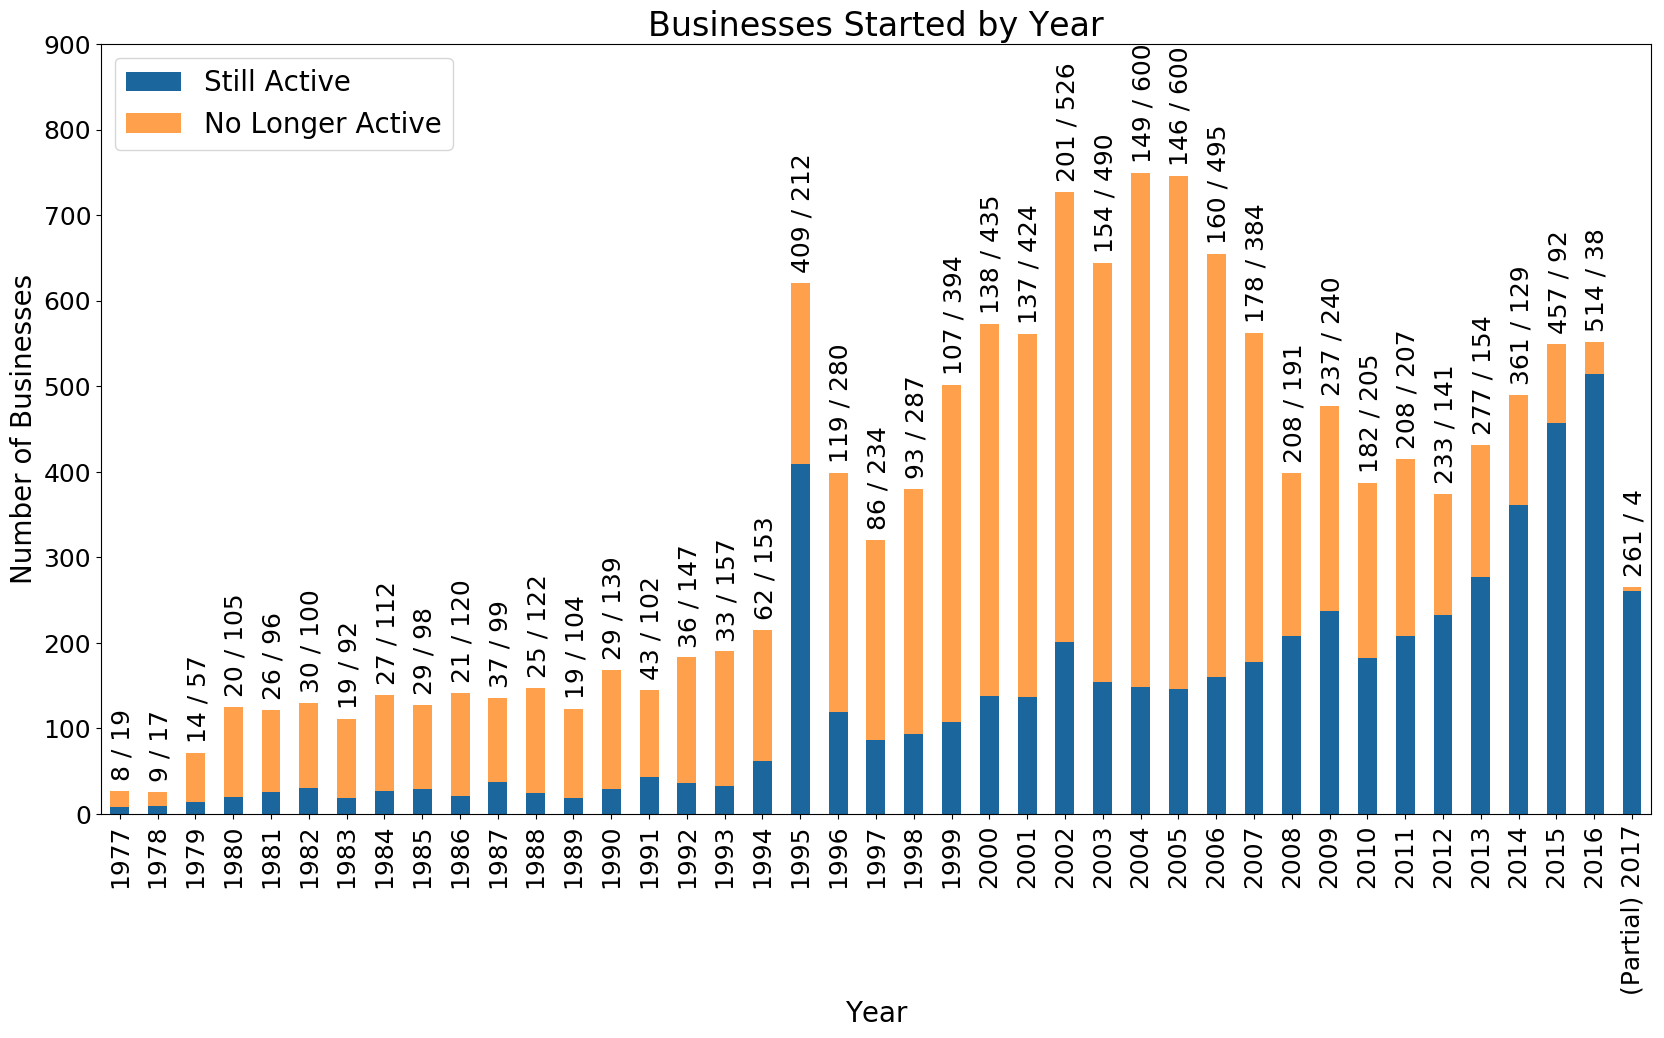

In [40]:
# Plot
ax = year_counts_df[['Year', 'Still Active', 'No Longer Active']].plot(
    rot=90,
    kind='bar', stacked=True,
    x='Year', ylim=[0, 900])

# Label 2017 as incomplete
x_labels = ax.get_xticklabels()
x_labels[40] = '(Partial) 2017'
ax.set_xticklabels(x_labels)

ax.set_title('Businesses Started by Year')
ax.legend(['Still Active', 'No Longer Active'], loc=2)
ax.set_ylabel('Number of Businesses')
ax.set_xlabel('Year')

# Annotate bars
patches_len = len(ax.patches)
for i, p in enumerate(ax.patches[patches_len/2:]):
    active = year_counts_df['Still Active'][1977 + i]
    inactive = year_counts_df['No Longer Active'][1977 + i]
    label = str(int(active)) + ' / ' + str(int(inactive))
    ax.annotate(label, (p.get_x() + p.get_width()/2 + .07, p.get_y() + p.get_height() + 12), rotation=90, va='bottom', ha='center', color='black', size=18)
#max(28, active, inactive) + 

In [41]:
year_counts_df.loc[1999:2007].sum()

Total Opened                               5718.000000
Total Closed                               4931.000000
Still Active                               1370.000000
No Longer Active                           4348.000000
Year                                      18027.000000
Net Change                                  787.000000
Open Fraction                                 4.882268
Total Businesses                          29931.000000
Percentage Change                             0.264739
National CSI                                836.491667
Local CSI                                   847.763310
National CSI Change                         -19.033333
Local CSI Change                            -11.661400
National Real GDP                           839.069000
National Real GDP Change                     23.219000
National Real GDP Percentage Change           0.259227
Gainesville Real GDP                        630.853000
Gainesville Real GDP Change                  21.124000
Gainesvill

In [42]:
year_counts_df.loc[2000:2008]['Total Closed']

Year
2000    555.0
2001    498.0
2002    398.0
2003    419.0
2004    582.0
2005    743.0
2006    816.0
2007    563.0
2008    462.0
Name: Total Closed, dtype: float64

In [43]:
4931. / 9

547.8888888888889

In [44]:
5036. / 9

559.5555555555555

** Opened vs. closed **

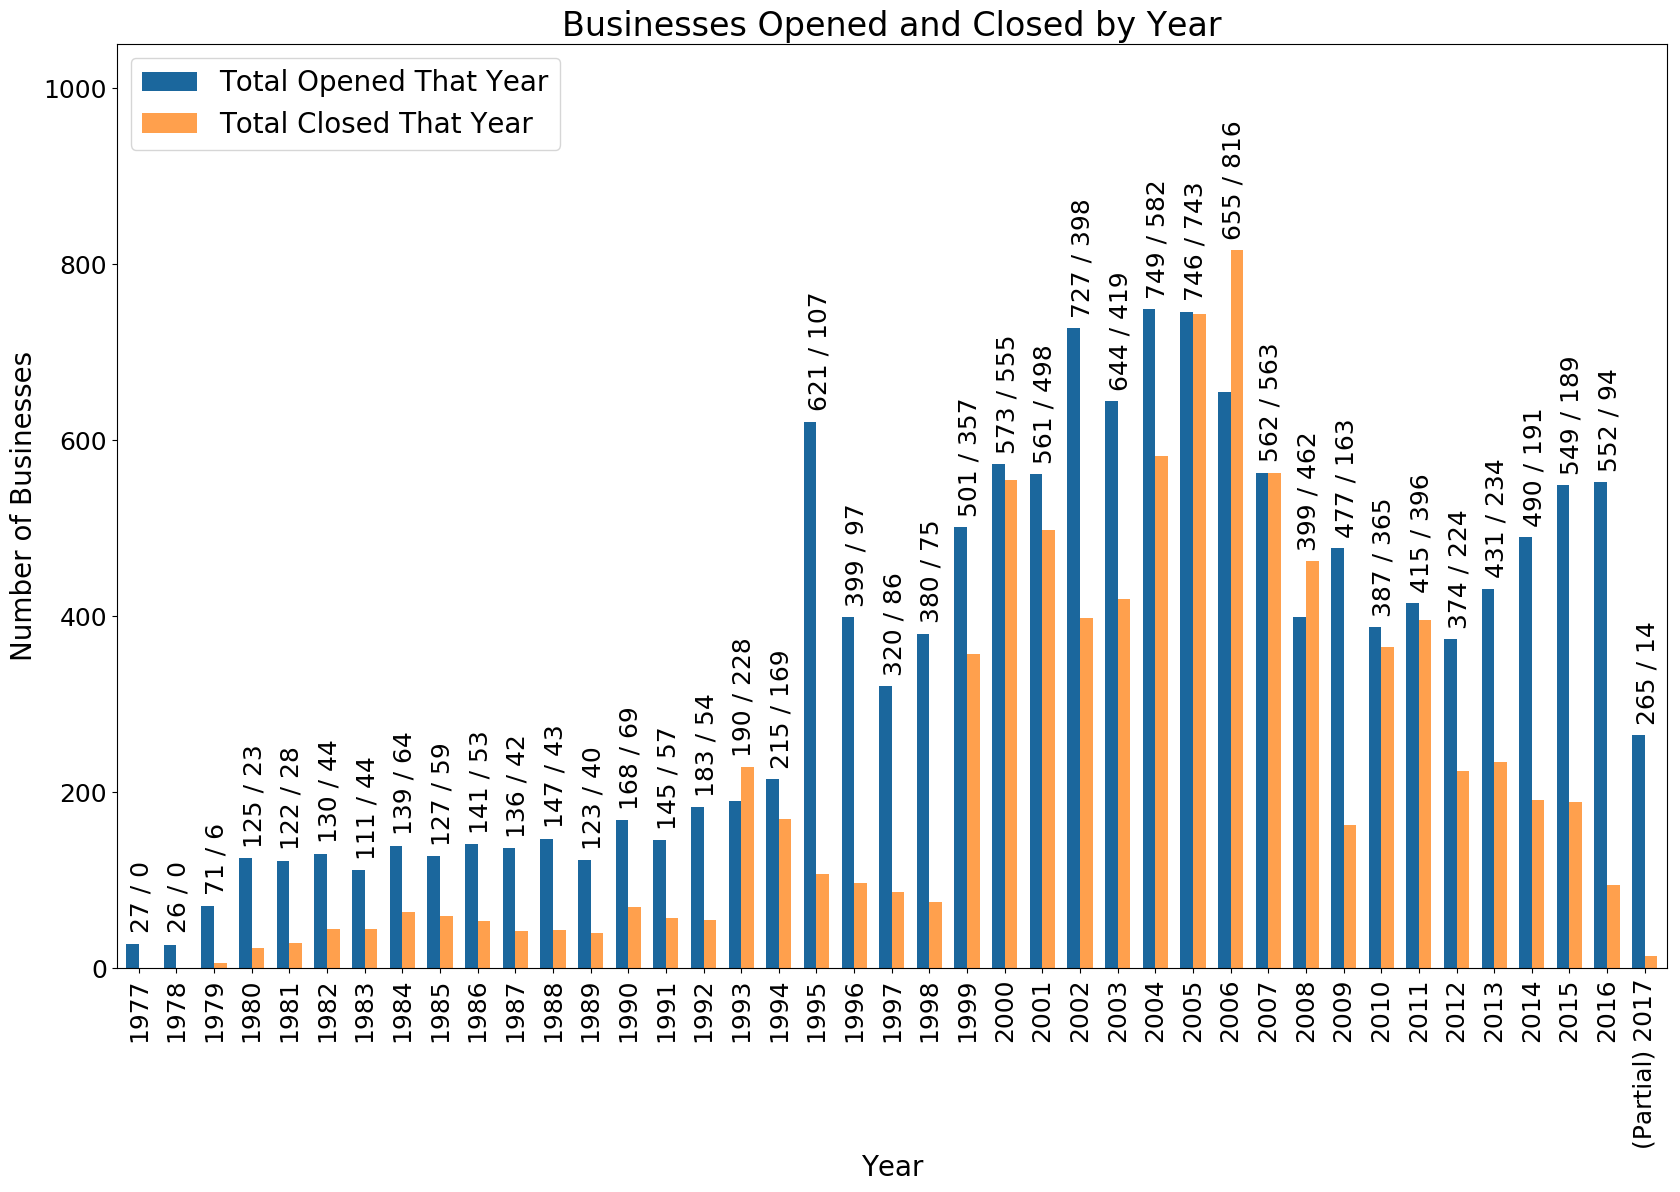

In [45]:
# Plot
ax = year_counts_df[['Total Opened', 'Total Closed']].plot(ylim=[0, 1050], kind='bar', title='Businesses Opened and Closed by Year', width=.67, figsize=(20,12))
ax.legend(['Total Opened That Year', 'Total Closed That Year'], loc=2)
ax.set_ylabel('Number of Businesses')
ax.set_xlabel('Year')

# Label 2017 as incomplete
x_labels = ax.get_xticklabels()
x_labels[40] = '(Partial) 2017'
ax.set_xticklabels(x_labels)

# Annotate bars
patches_len = len(ax.patches)
for i, p in enumerate(ax.patches[patches_len/2:]):
    opened = year_counts_df['Total Opened'][1977 + i]
    closed = year_counts_df['Total Closed'][1977 + i]
    label = str(int(opened)) + ' / ' + str(int(closed))
    ax.annotate(label, (p.get_x() + p.get_width()/2 - .1, max(28, opened, closed) + p.get_y() + 12), rotation=90, va='bottom', ha='center', color='black', size=18)

In [46]:
x_labels[40]

'(Partial) 2017'

In [47]:
str(x_labels[40])

'(Partial) 2017'

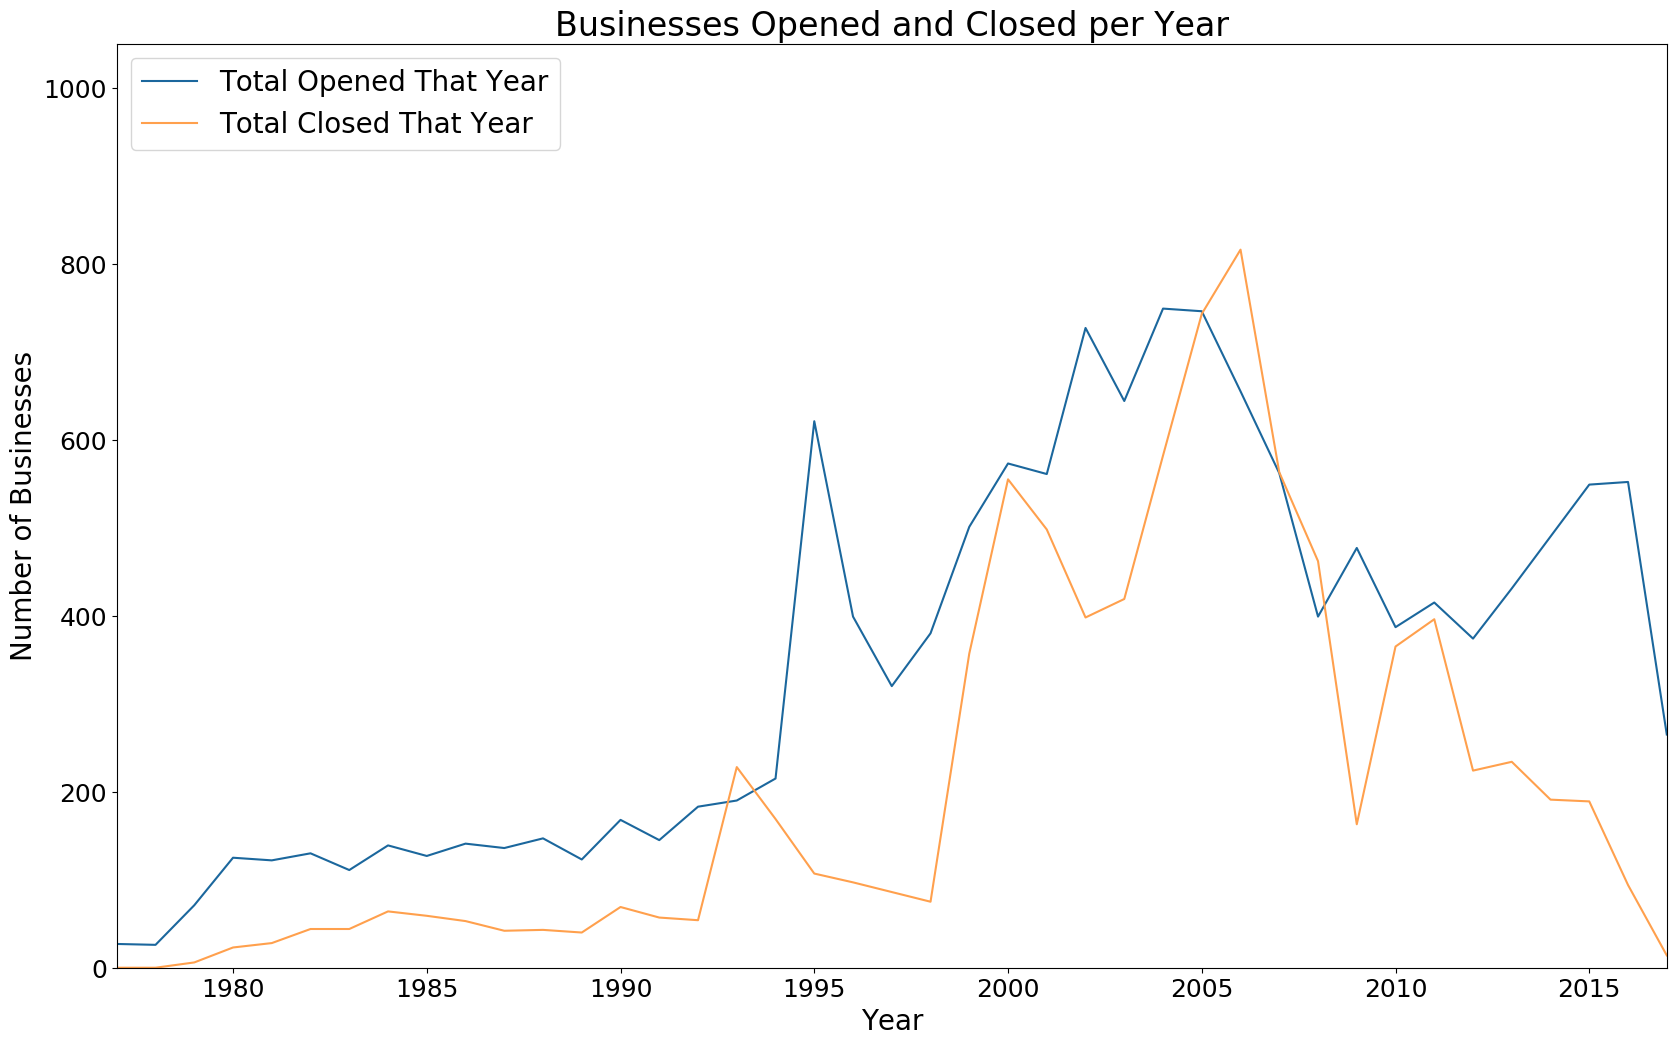

In [48]:
# Plot
ax = year_counts_df[['Total Opened', 'Total Closed']].plot(ylim=[0, 1050], kind='line', title='Businesses Opened and Closed per Year', figsize=(20,12))
ax.legend(['Total Opened That Year', 'Total Closed That Year'], loc=2)
ax.set_ylabel('Number of Businesses')
ax.set_xlabel('Year')
ax.fill_between(year_counts_df['Total Opened'], year_counts_df['Total Closed'], 0)

# Annotate bars
patches_len = len(ax.patches)
for i, p in enumerate(ax.patches[patches_len/2:]):
    opened = year_counts_df['Total Opened'][1977 + i]
    closed = year_counts_df['Total Closed'][1977 + i]
    label = str(int(opened)) + ' / ' + str(int(closed))
    ax.annotate(label, (p.get_x() + p.get_width()/2 - .1, max(28, opened, closed) + p.get_y() + 12), rotation=90, va='bottom', ha='center', color='black')

# IMPORTANT - use this setup for all line/bar mixed graphs

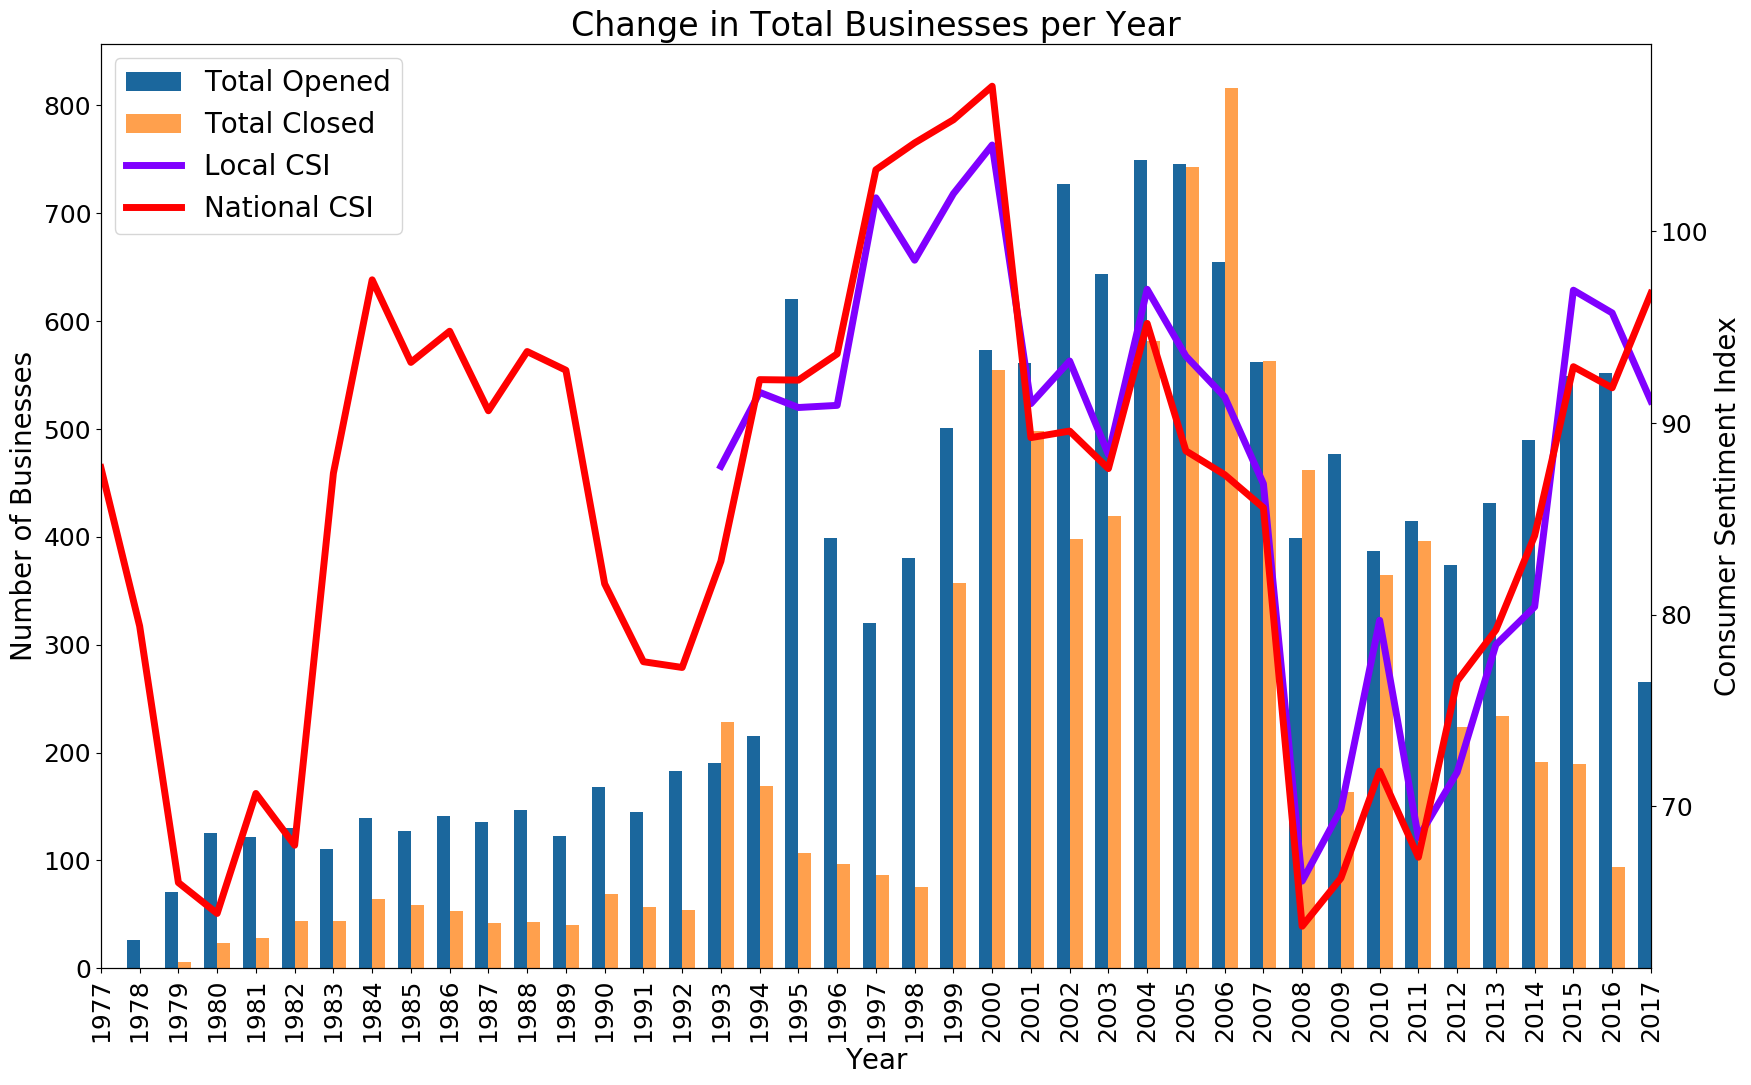

In [49]:
# Plot
# For whatever reason, multiple plots only works if the x axis is a string value
temp_df = year_counts_df.copy()
temp_df['Year'] = temp_df['Year'].astype('str')

## PLOTTING ##
fig, ax1 = plt.subplots(1, 1)
temp_df[['Year', 'Total Opened', 'Total Closed']].plot(
    ax=ax1, figsize=(20, 12), rot=90,
    kind='bar', width=.67,
    x='Year')

ax2 = ax1.twinx()
temp_df[['Year', 'Local CSI', 'National CSI']].plot(
    ax=ax2, mark_right=False,
    linestyle='-', colormap='rainbow', linewidth=5,
    x='Year')

# Figure
ax1.set_title('Change in Total Businesses per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Businesses')
ax2.set_ylabel('Consumer Sentiment Index')

# Hide old legends
ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)

# Make new legend
ax1_handles, ax1_labels = ax1.get_legend_handles_labels()
ax2_handles, ax2_labels = ax2.get_legend_handles_labels()
plt.legend(ax1_handles + ax2_handles, ax1_labels + ax2_labels, loc=2)

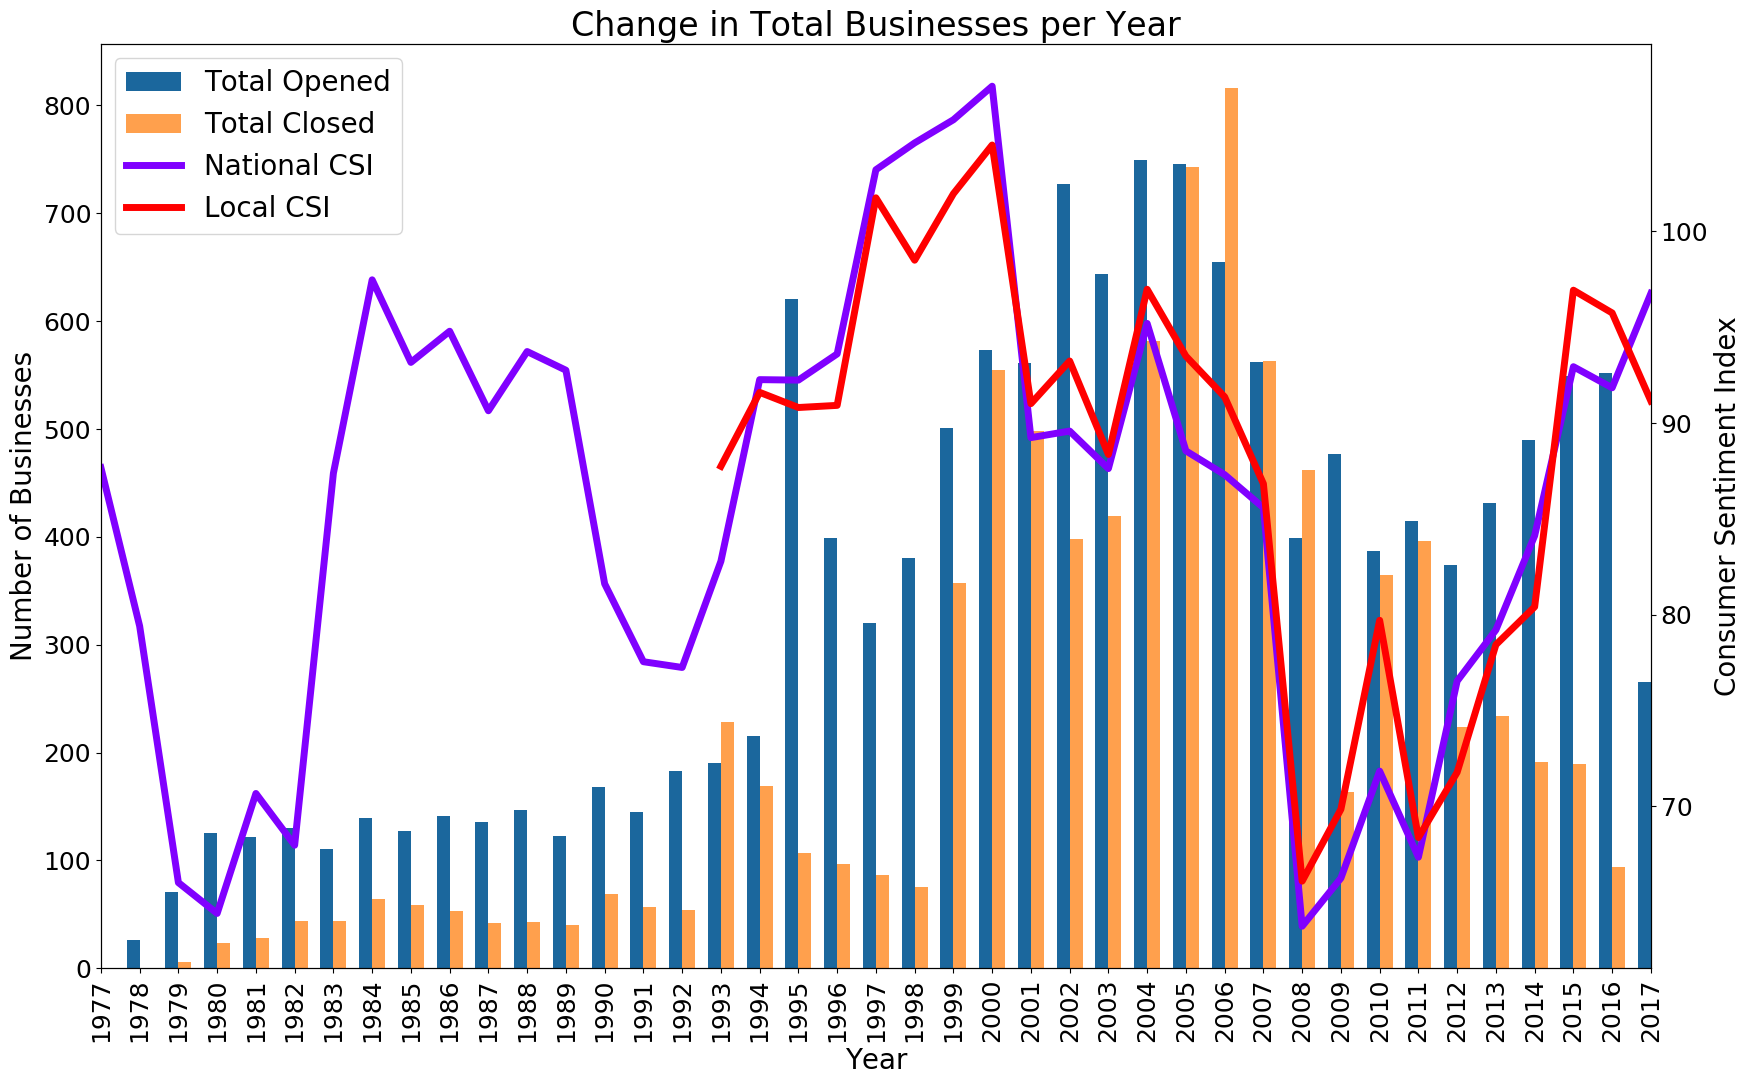

In [50]:
# Plot
# For whatever reason, multiple plots only works if the x axis is a string value
temp_df = year_counts_df.copy()
temp_df['Year'] = temp_df['Year'].astype('str')
# temp_df['Local CSI'] = (temp_df['Local CSI'] - 40) * 15 # BAD
# temp_df['National CSI'] = (temp_df['National CSI'] - 40) * 15 # BAD

## PLOTTING ##
fig, ax1 = plt.subplots(1, 1)
temp_df[['Year', 'Total Opened', 'Total Closed']].plot(
    ax=ax1, figsize=(20, 12), rot=90,
    kind='bar', stacked=False, width=.67,
    x='Year')

ax2 = ax1.twinx()
temp_df[['Year', 'National CSI', 'Local CSI']].plot(
    ax=ax2, mark_right=False,
    linestyle='-', colormap='rainbow', linewidth=5,
    x='Year')

# Figure
ax1.set_title('Change in Total Businesses per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Businesses')
ax2.set_ylabel('Consumer Sentiment Index')

# Hide old legends
ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)

# Make new legend
ax1_handles, ax1_labels = ax1.get_legend_handles_labels()
ax2_handles, ax2_labels = ax2.get_legend_handles_labels()
plt.legend(ax1_handles + ax2_handles, ax1_labels + ax2_labels, loc=2)

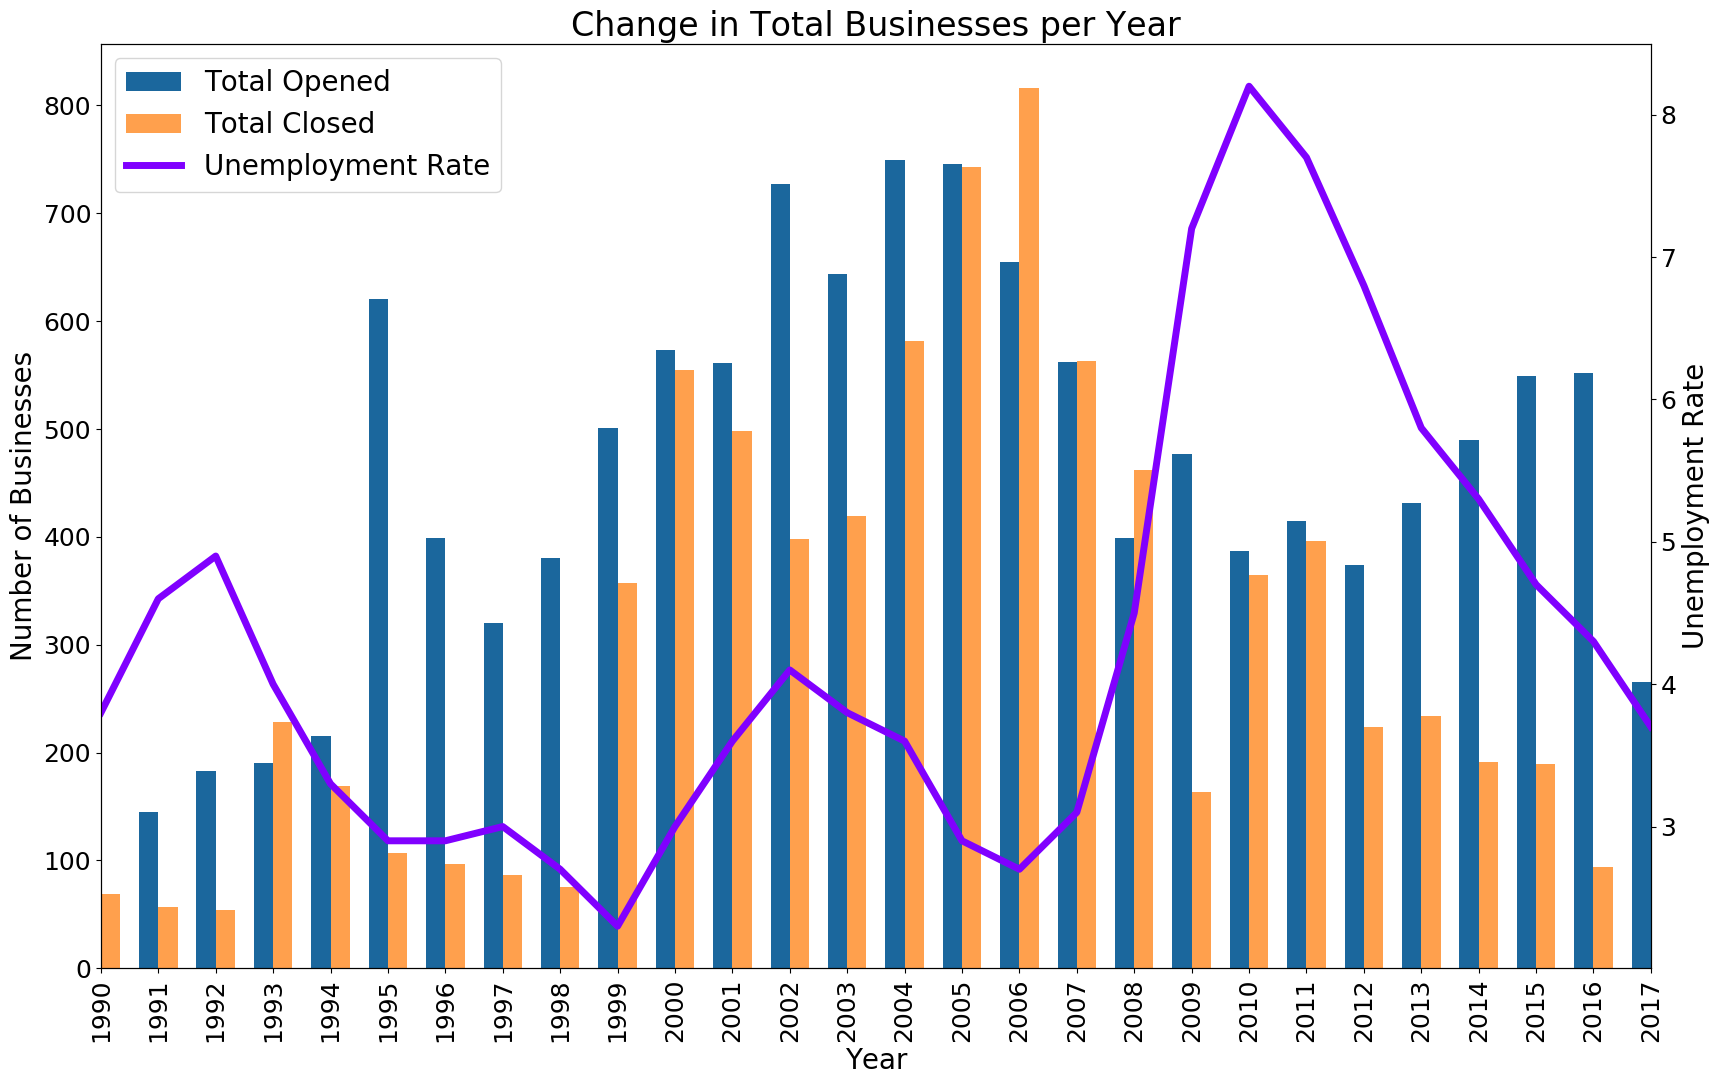

In [170]:
# Plot
# For whatever reason, multiple plots only works if the x axis is a string value
temp_df = year_counts_df.loc[1990:2017].copy()
temp_df['Year'] = temp_df['Year'].astype('str')
# temp_df['Local CSI'] = (temp_df['Local CSI'] - 40) * 15 # BAD
# temp_df['National CSI'] = (temp_df['National CSI'] - 40) * 15 # BAD

## PLOTTING ##
fig, ax1 = plt.subplots(1, 1)
temp_df[['Year', 'Total Opened', 'Total Closed']].plot(
    ax=ax1, figsize=(20, 12), rot=90,
    kind='bar', stacked=False, width=.67,
    x='Year')

ax2 = ax1.twinx()
temp_df[['Year', 'Unemployment Rate']].plot(
    ax=ax2, mark_right=False,
    linestyle='-', colormap='rainbow', linewidth=5,
    x='Year')

# Figure
ax1.set_title('Change in Total Businesses per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Businesses')
ax2.set_ylabel('Unemployment Rate')

# Hide old legends
ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)

# Make new legend
ax1_handles, ax1_labels = ax1.get_legend_handles_labels()
ax2_handles, ax2_labels = ax2.get_legend_handles_labels()
plt.legend(ax1_handles + ax2_handles, ax1_labels + ax2_labels, loc=2);

National GDP correlation with Local GDP: 0.897973325531
National GDP correlation with Total Opened: 0.821524777584
Local GDP correlation with Total Opened: -0.597239544901


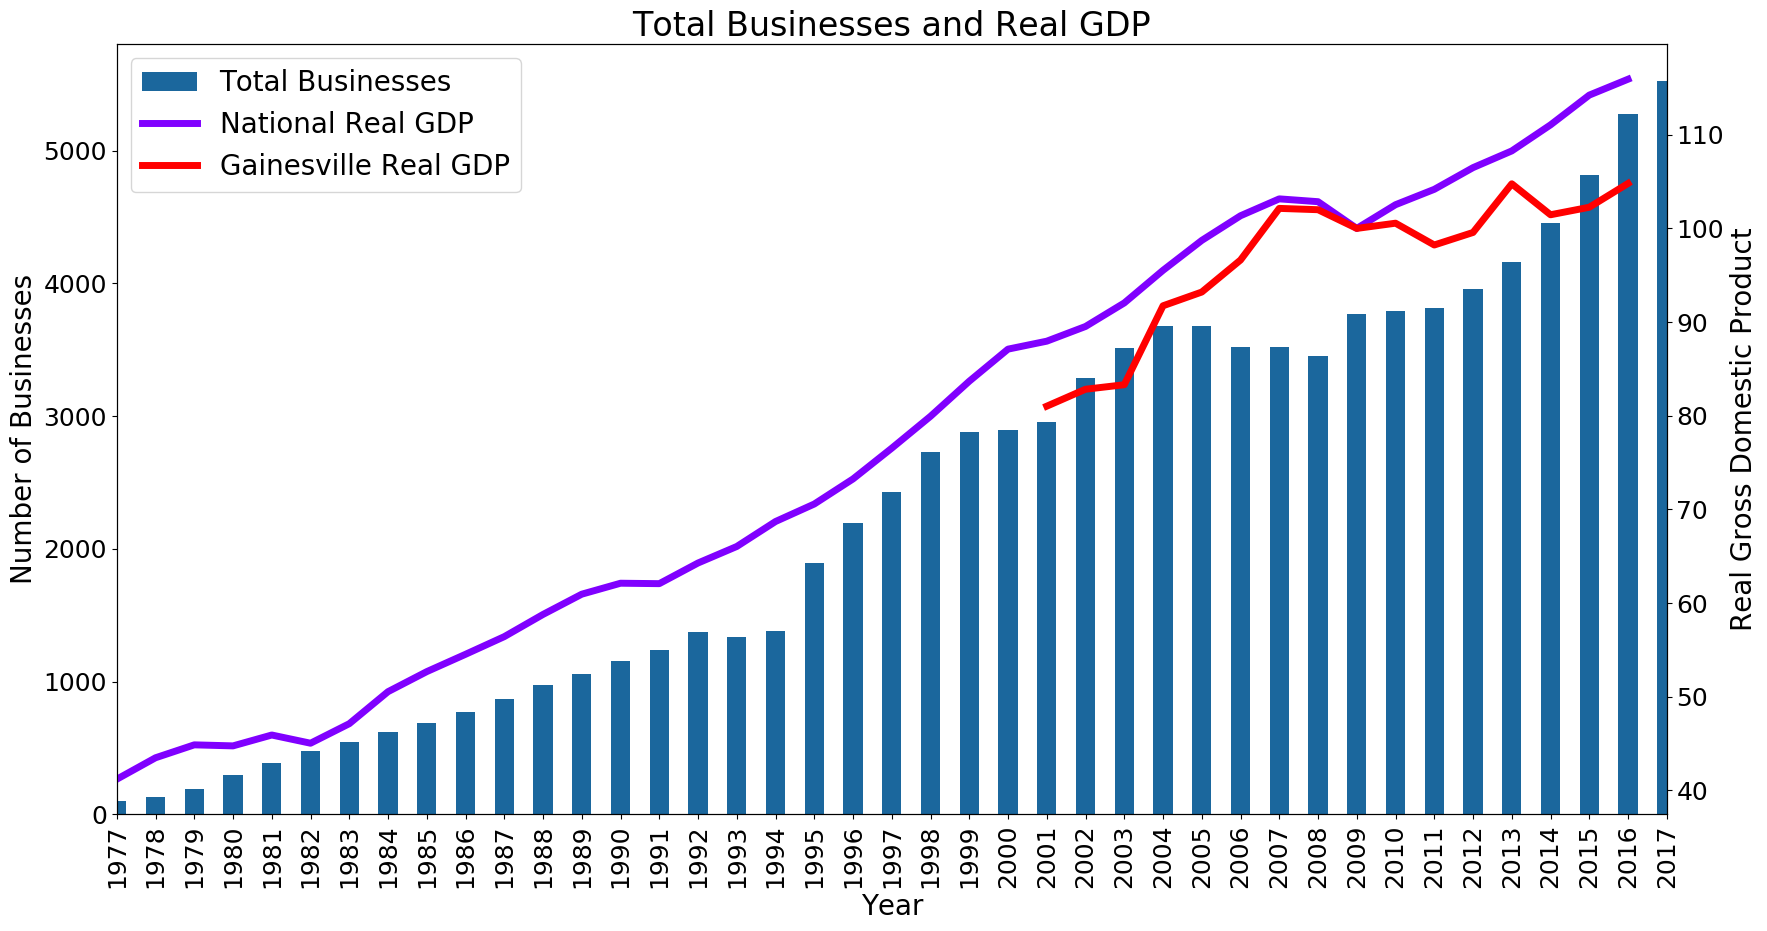

In [52]:
# Plot
# For whatever reason, multiple plots only works if the x axis is a string value
temp_df = year_counts_df.copy()
temp_df['Year'] = temp_df['Year'].astype('str')

## PLOTTING ##
fig, ax1 = plt.subplots(1, 1)
temp_df[['Year', 'Total Businesses']].plot(
    ax=ax1, rot=90,
    kind='bar',
    x='Year')

ax2 = ax1.twinx()
temp_df[['Year', 'National Real GDP', 'Gainesville Real GDP']].plot(
    ax=ax2, mark_right=False,
    linestyle='-', colormap='rainbow', linewidth=5,
    x='Year')

# Figure
ax1.set_title('Total Businesses and Real GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Businesses')
ax2.set_ylabel('Real Gross Domestic Product')

# Hide old legends
ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)

# Make new legend
ax1_handles, ax1_labels = ax1.get_legend_handles_labels()
ax2_handles, ax2_labels = ax2.get_legend_handles_labels()
plt.legend(ax1_handles + ax2_handles, ax1_labels + ax2_labels, loc=2);

print "National GDP correlation with Local GDP:", temp_df['National Real GDP'].corr(temp_df['Gainesville Real GDP'])
print "National GDP correlation with Total Opened:", temp_df['National Real GDP'].corr(temp_df['Total Opened'])
print "Local GDP correlation with Total Opened:", temp_df['Gainesville Real GDP'].corr(temp_df['Total Opened'])

CSI correlation with net change: 0.203431343128
CSI correlation with open fraction: 0.218817349805


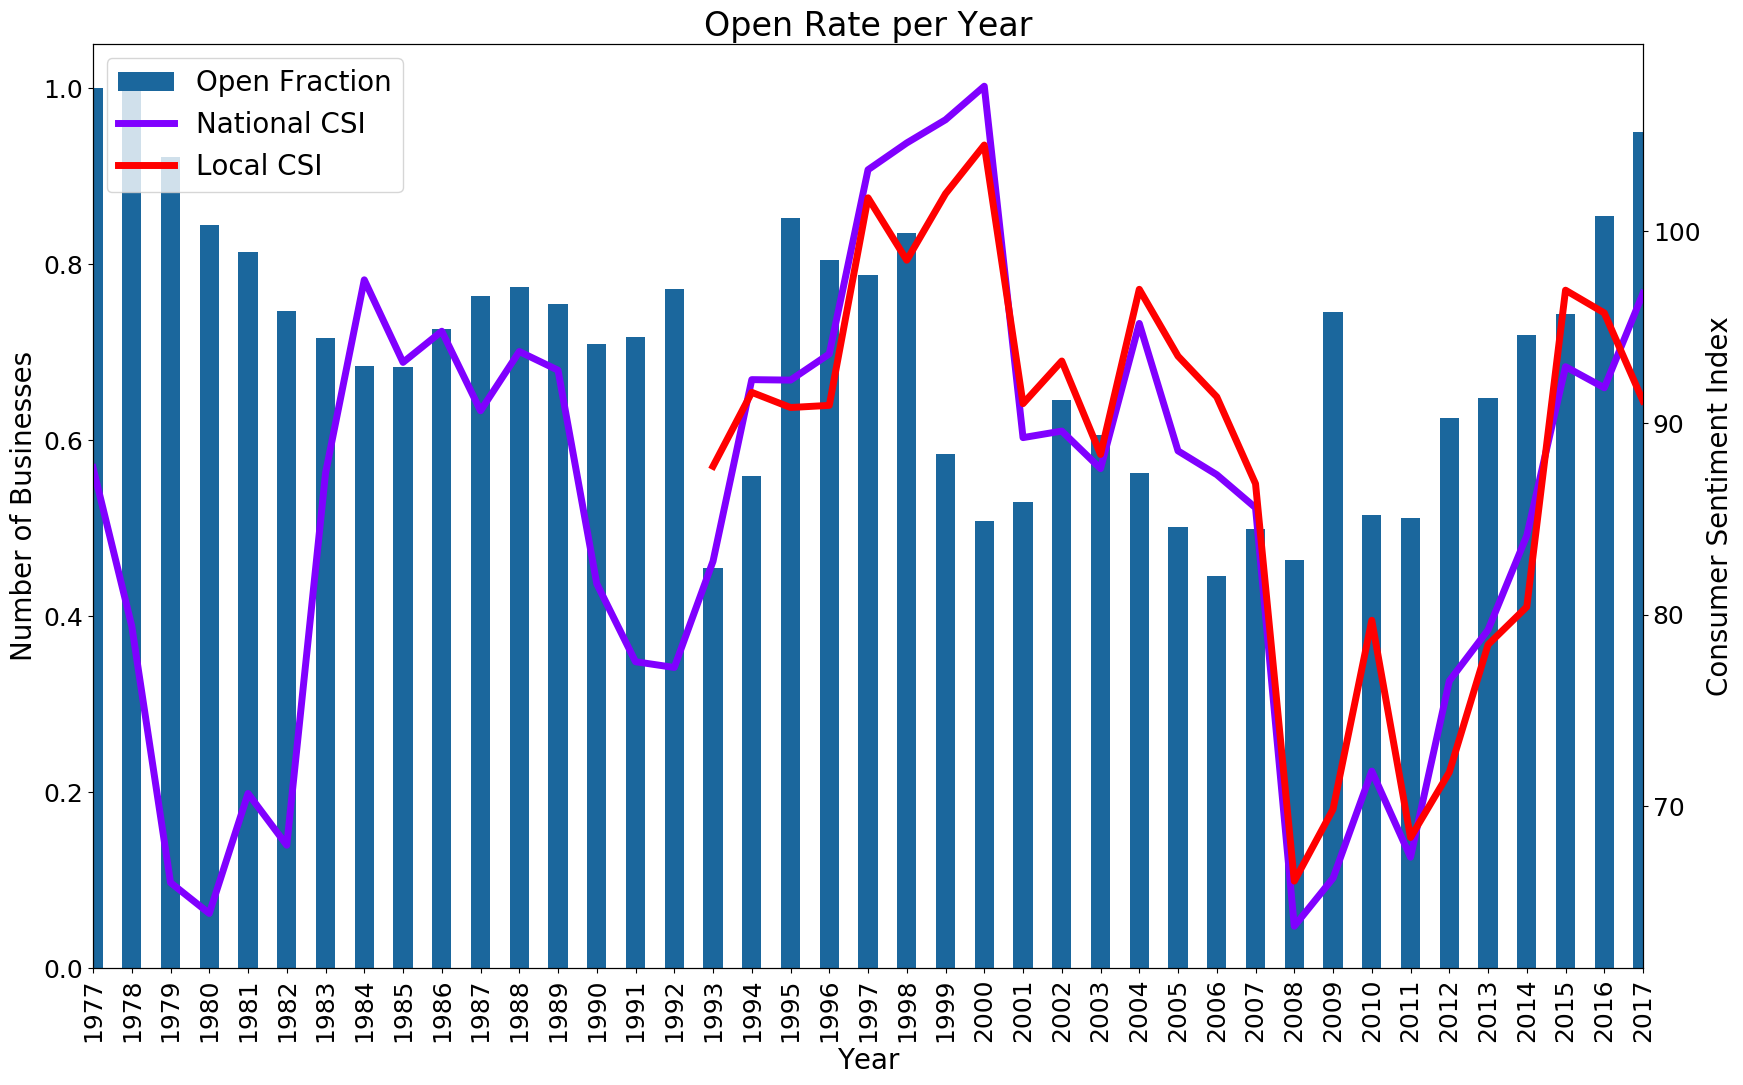

In [53]:
# Plot
# For whatever reason, multiple plots only works if the x axis is a string value
year_counts_df['Net Change'] = year_counts_df['Total Opened'] - year_counts_df['Total Closed']
year_counts_df['Open Fraction'] = year_counts_df['Total Opened'] / (year_counts_df['Total Opened'] + year_counts_df['Total Closed'])
temp_df = year_counts_df.copy()
temp_df['Year'] = temp_df['Year'].astype('str')

## PLOTTING ##
fig, ax1 = plt.subplots(1, 1)
temp_df[['Year', 'Open Fraction']].plot(
    ax=ax1, figsize=(20, 12), rot=90,
    kind='bar',
    x='Year')

ax2 = ax1.twinx()
temp_df[['Year', 'National CSI', 'Local CSI']].plot(
    ax=ax2, mark_right=False,
    linestyle='-', colormap='rainbow', linewidth=5,
    x='Year')

# Figure
ax1.set_title('Open Rate per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Businesses')
ax2.set_ylabel('Consumer Sentiment Index')

# Hide old legends
ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)

# Make new legend
ax1_handles, ax1_labels = ax1.get_legend_handles_labels()
ax2_handles, ax2_labels = ax2.get_legend_handles_labels()
plt.legend(ax1_handles + ax2_handles, ax1_labels + ax2_labels, loc=2)

print "CSI correlation with net change:", temp_df['Local CSI'].corr(temp_df['Net Change'])
print "CSI correlation with open fraction:", temp_df['Local CSI'].corr(temp_df['Open Fraction'])

CSI correlation with net change: 0.213729951584
CSI correlation with open fraction: 0.222983746917
CSI correlation with net change: 0.213729951584
CSI correlation with open fraction: 0.222983746917


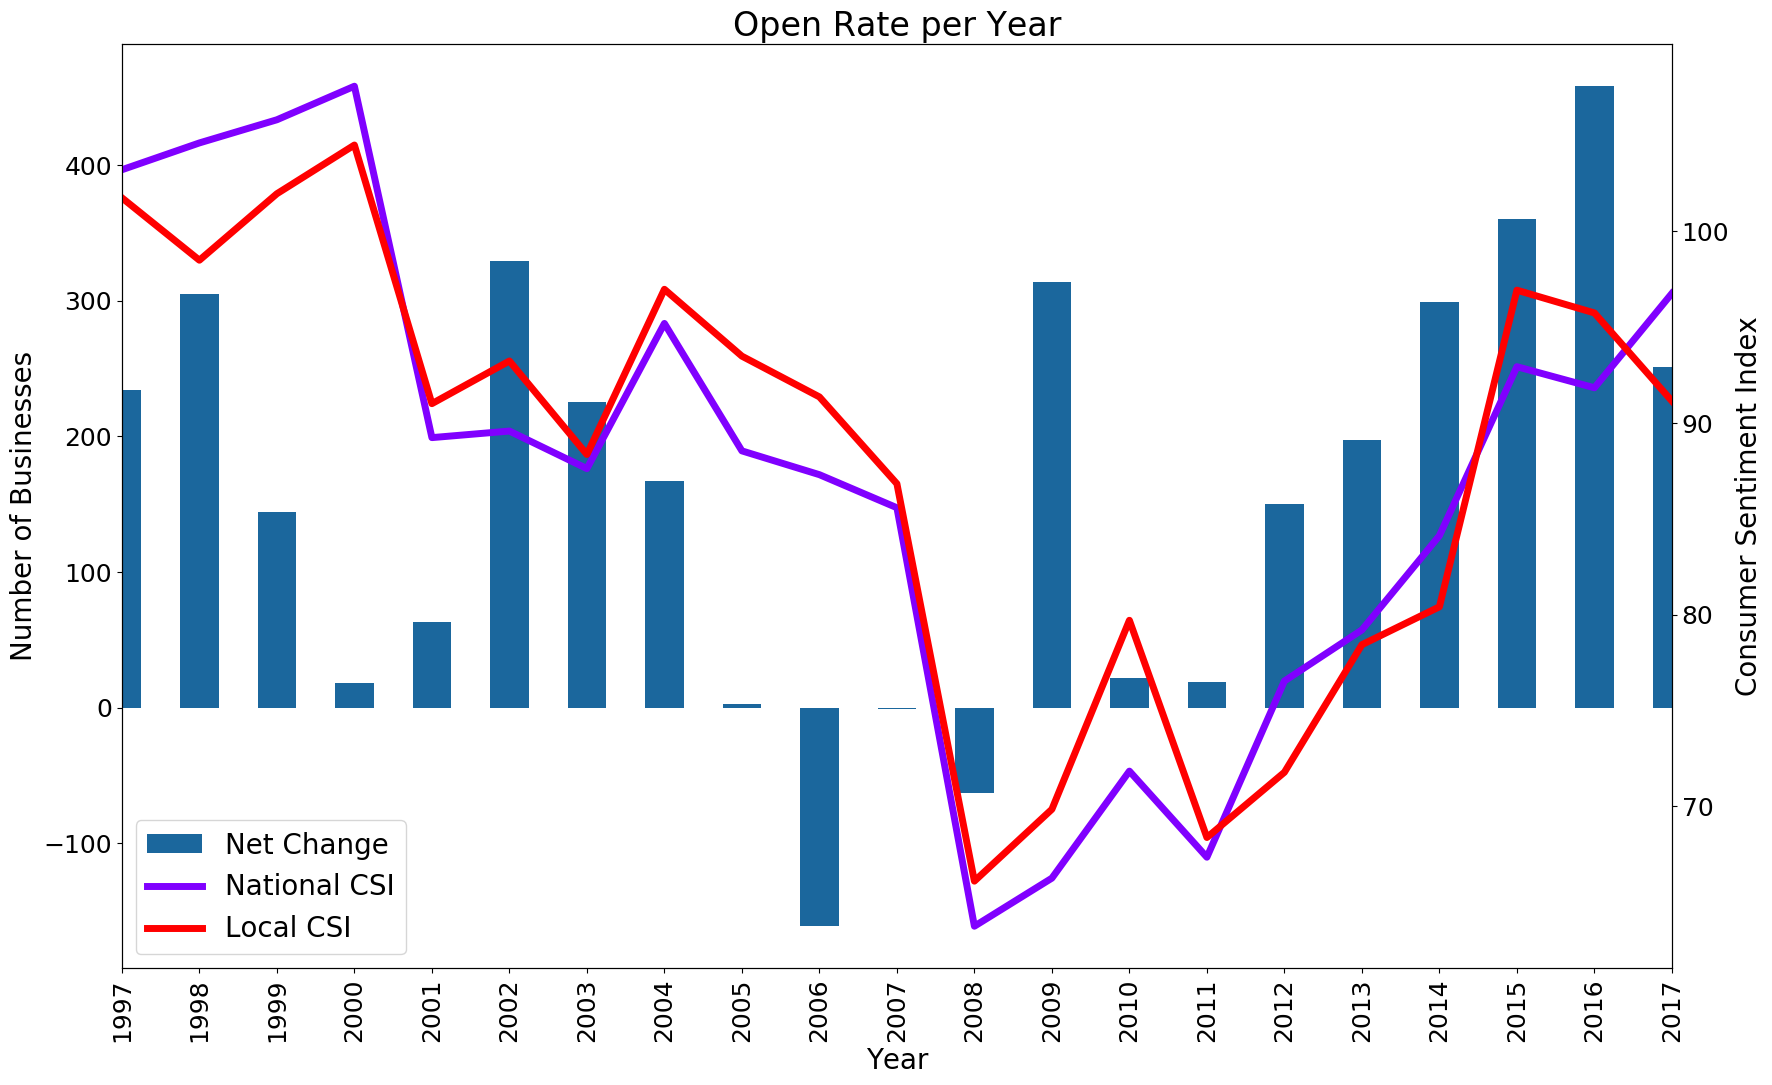

In [54]:
# Plot
# For whatever reason, multiple plots only works if the x axis is a string value
temp_df = year_counts_df.copy()
temp_df = temp_df[temp_df.index >= 1997]
temp_df['Year'] = temp_df['Year'].astype('str')

## PLOTTING ##
fig, ax1 = plt.subplots(1, 1)
temp_df[['Year', 'Net Change']].plot(
    ax=ax1, figsize=(20, 12), rot=90,
    kind='bar',
    x='Year')

ax2 = ax1.twinx()
temp_df[['Year', 'National CSI', 'Local CSI']].plot(
    ax=ax2, mark_right=False,
    linestyle='-', colormap='rainbow', linewidth=5,
    x='Year')

# Figure
ax1.set_title('Open Rate per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Businesses')
ax2.set_ylabel('Consumer Sentiment Index')

# Hide old legends
ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)

# Make new legend
ax1_handles, ax1_labels = ax1.get_legend_handles_labels()
ax2_handles, ax2_labels = ax2.get_legend_handles_labels()
plt.legend(ax1_handles + ax2_handles, ax1_labels + ax2_labels, loc=3)

print "CSI correlation with net change:", temp_df['Local CSI'].corr(temp_df['Net Change'])
print "CSI correlation with open fraction:", temp_df['Local CSI'].corr(temp_df['Open Fraction'])

print "CSI correlation with net change:", temp_df['Local CSI'].corr(temp_df['Net Change'])
print "CSI correlation with open fraction:", temp_df['Local CSI'].corr(temp_df['Open Fraction'])

CSI correlation with net change: 0.213729951584
CSI correlation with open fraction: 0.222983746917


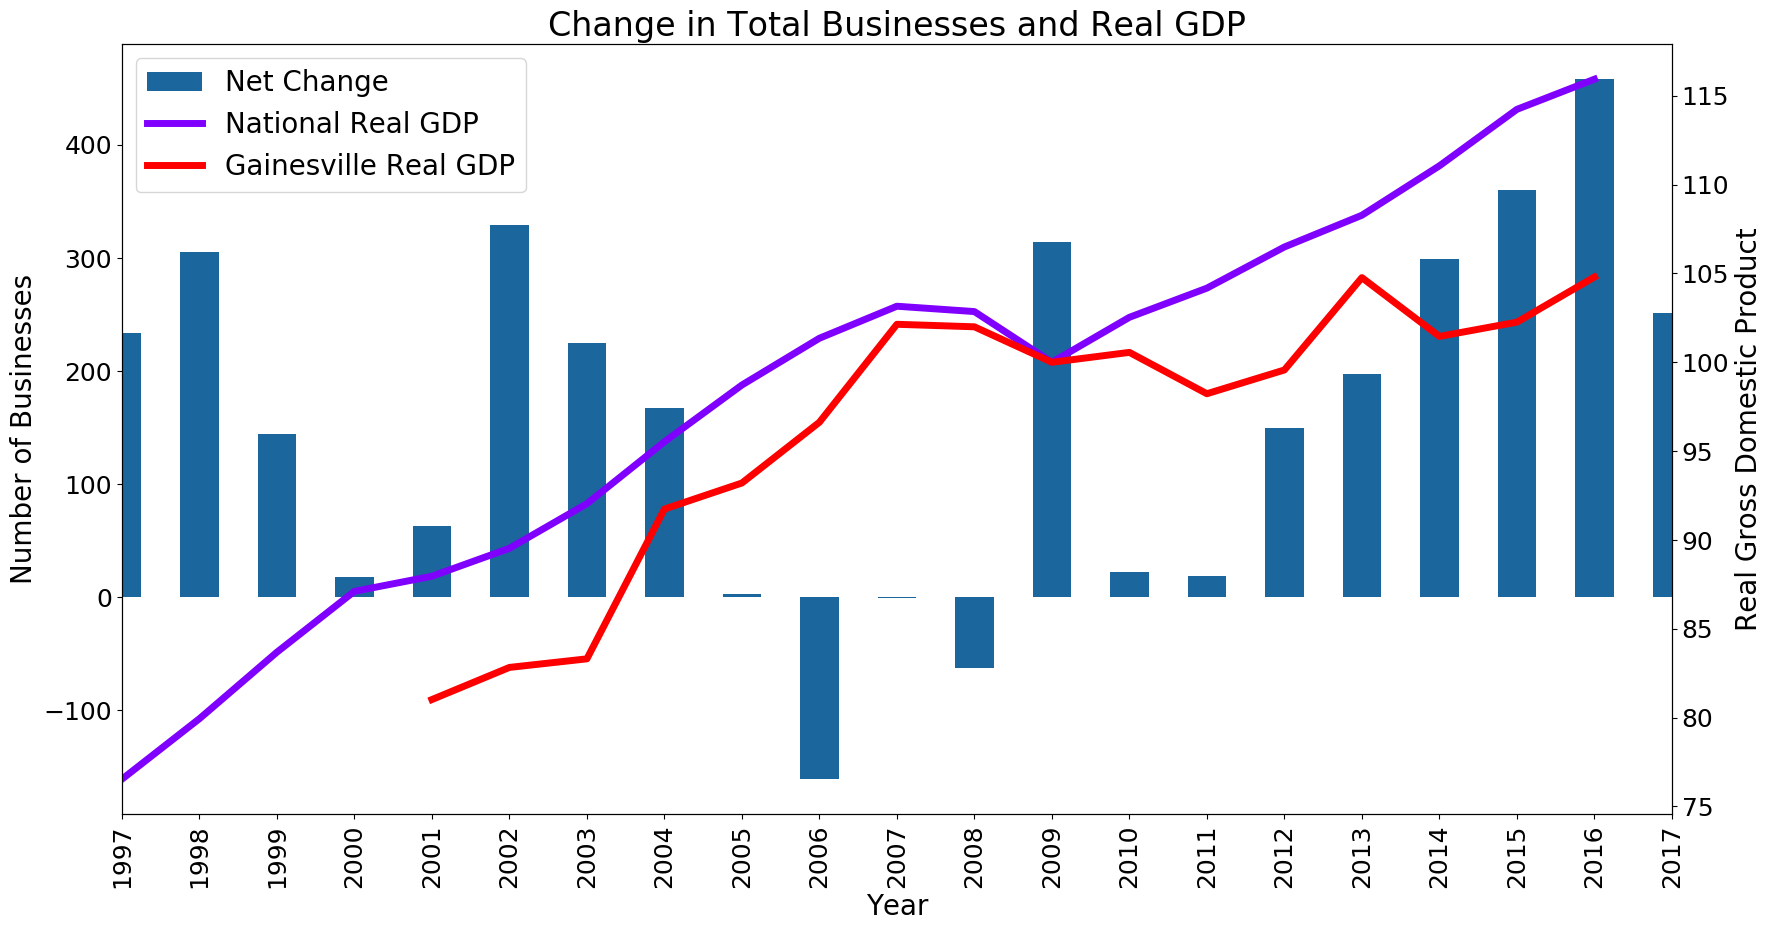

In [55]:
# Plot
# For whatever reason, multiple plots only works if the x axis is a string value
temp_df = year_counts_df.copy()
temp_df = temp_df[temp_df.index >= 1997]
temp_df['Year'] = temp_df['Year'].astype('str')

## PLOTTING ##
fig, ax1 = plt.subplots(1, 1)
temp_df[['Year', 'Net Change']].plot(
    ax=ax1, rot=90,
    kind='bar',
    x='Year')

ax2 = ax1.twinx()
temp_df[['Year', 'National Real GDP', 'Gainesville Real GDP']].plot(
    ax=ax2, mark_right=False,
    linestyle='-', colormap='rainbow', linewidth=5,
    x='Year')

# Figure
ax1.set_title('Change in Total Businesses and Real GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Businesses')
ax2.set_ylabel('Real Gross Domestic Product')

# Hide old legends
ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)

# Make new legend
ax1_handles, ax1_labels = ax1.get_legend_handles_labels()
ax2_handles, ax2_labels = ax2.get_legend_handles_labels()
plt.legend(ax1_handles + ax2_handles, ax1_labels + ax2_labels, loc=2)

print "CSI correlation with net change:", temp_df['Local CSI'].corr(temp_df['Net Change'])
print "CSI correlation with open fraction:", temp_df['Local CSI'].corr(temp_df['Open Fraction'])

Unemployment Rate correlation with net change: 0.0835270629057
Unemployment Rate correlation with percent change: -0.0391382864438
Unemployment Rate correlation with open fraction: 0.0276822148891


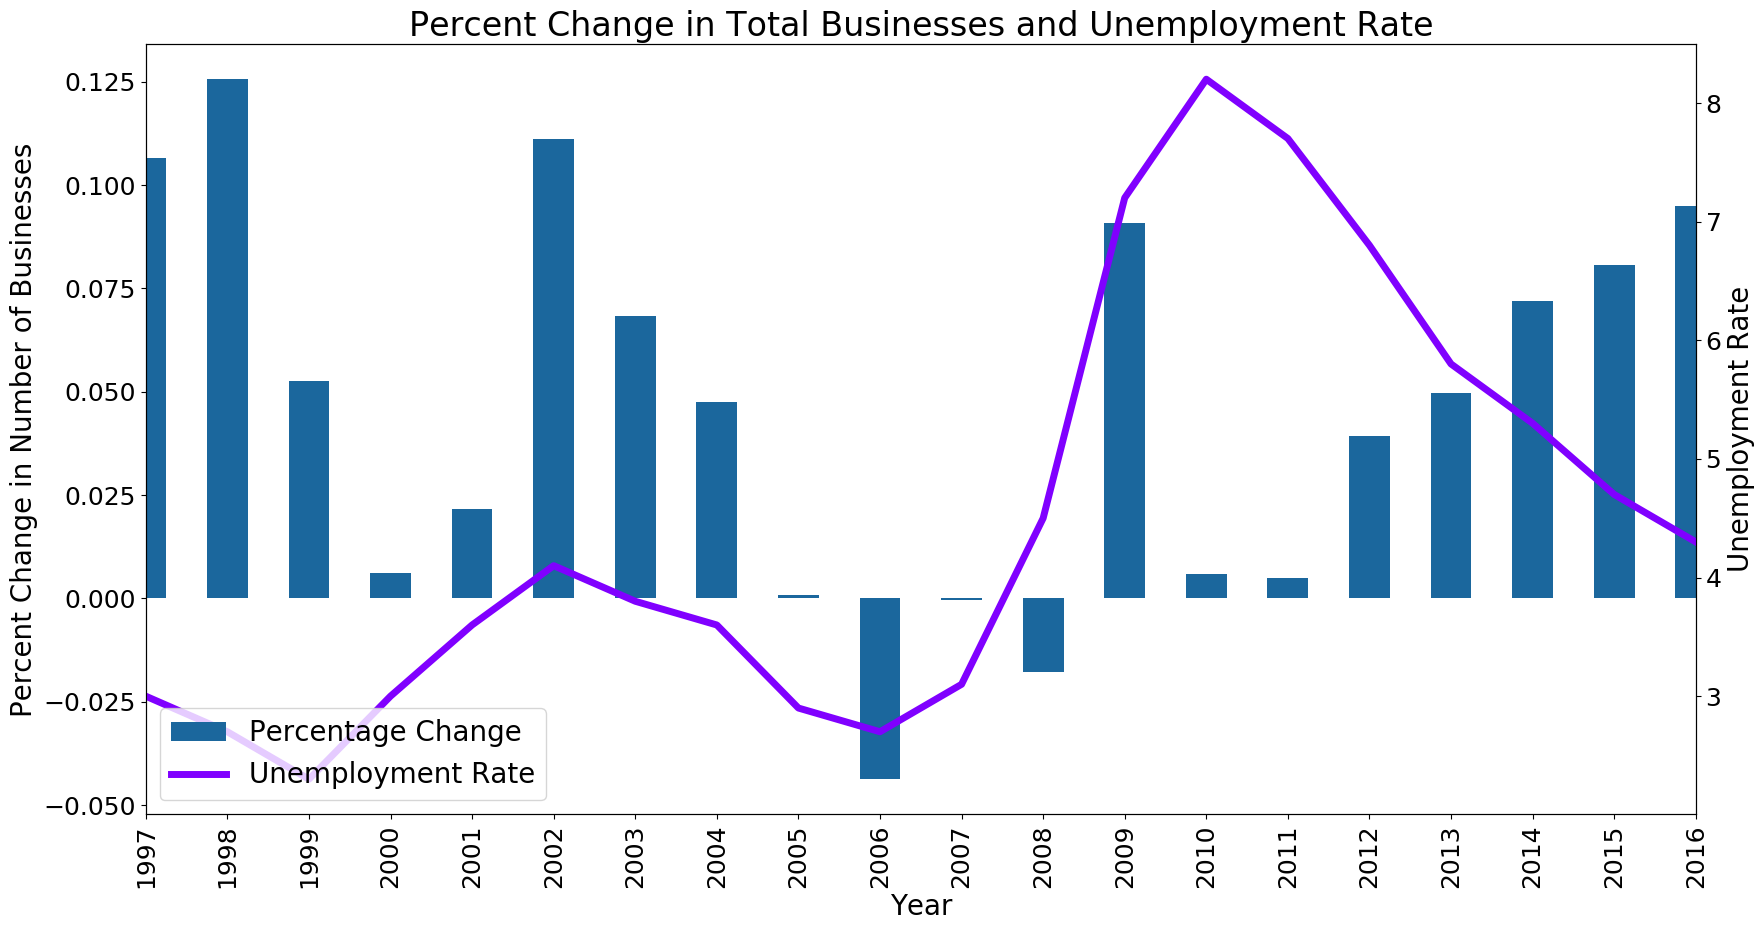

In [169]:
# Plot
# For whatever reason, multiple plots only works if the x axis is a string value
temp_df = year_counts_df.copy()
temp_df = temp_df[(temp_df.index >= 1997) & (temp_df.index < 2017)] # Hide 2017; contains no useful data
temp_df['Year'] = temp_df['Year'].astype('str')

## PLOTTING ##
fig, ax1 = plt.subplots(1, 1)
temp_df[['Year', 'Percentage Change']].plot(
    ax=ax1, rot=90,
    kind='bar',
    x='Year')

ax2 = ax1.twinx()
temp_df[['Year', 'Unemployment Rate']].plot(
    ax=ax2, mark_right=False,
    linestyle='-', colormap='rainbow', linewidth=5,
    x='Year')

# Figure
ax1.set_title('Percent Change in Total Businesses and Unemployment Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percent Change in Number of Businesses')
ax2.set_ylabel('Unemployment Rate')

# Hide old legends
ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)

# Make new legend
ax1_handles, ax1_labels = ax1.get_legend_handles_labels()
ax2_handles, ax2_labels = ax2.get_legend_handles_labels()
plt.legend(ax1_handles + ax2_handles, ax1_labels + ax2_labels, loc=3)

print "Unemployment Rate correlation with net change:", temp_df['Unemployment Rate'].corr(temp_df['Net Change'])
print "Unemployment Rate correlation with percent change:", temp_df['Unemployment Rate'].corr(temp_df['Percentage Change'])
print "Unemployment Rate correlation with open fraction:", temp_df['Unemployment Rate'].corr(temp_df['Open Fraction'])

Change in National GDP correlation with net change: -0.0429741443358
Change in National GDP correlation with percent change: 0.0167378875275
Change in National GDP correlation with open fraction: -0.0108400475807
Change in Gainesville GDP correlation with net change: -0.137245348535
Change in Gainesville GDP correlation with percent change: -0.137805915421
Change in Gainesville GDP correlation with open fraction: -0.199115170919


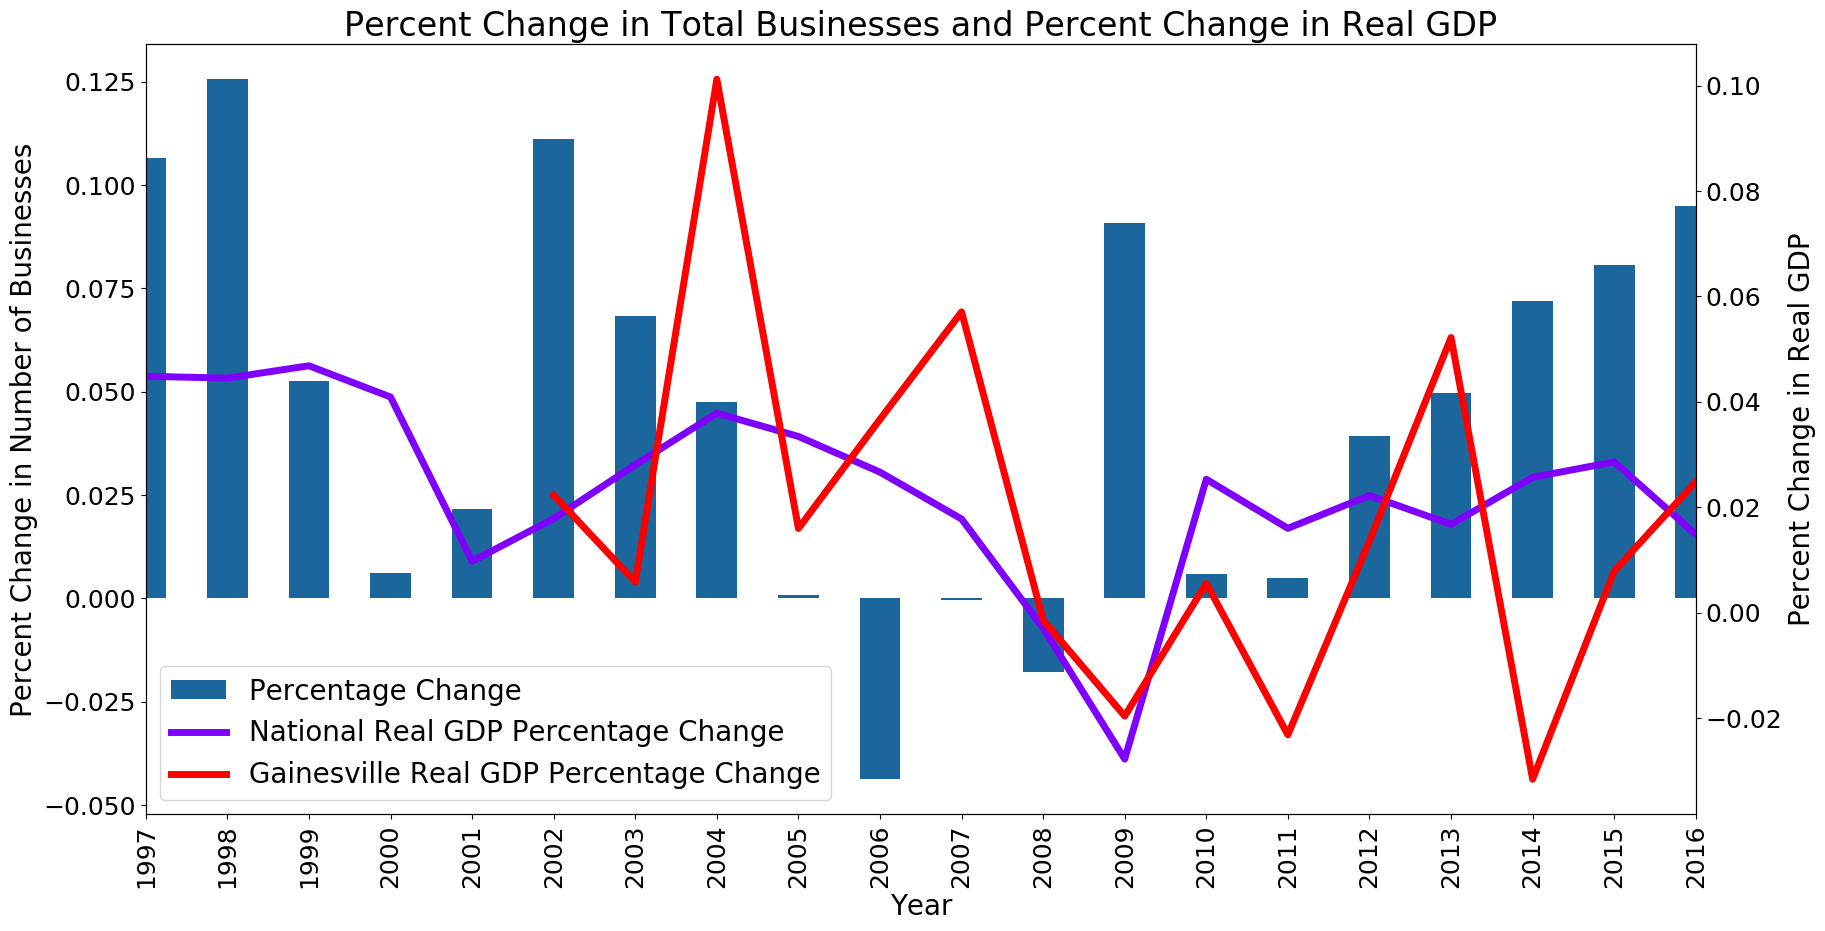

In [56]:
# Plot
# For whatever reason, multiple plots only works if the x axis is a string value
temp_df = year_counts_df.copy()
temp_df = temp_df[(temp_df.index >= 1997) & (temp_df.index < 2017)] # Hide 2017; contains no useful data
temp_df['Year'] = temp_df['Year'].astype('str')

## PLOTTING ##
fig, ax1 = plt.subplots(1, 1)
temp_df[['Year', 'Percentage Change']].plot(
    ax=ax1, rot=90,
    kind='bar',
    x='Year')

ax2 = ax1.twinx()
temp_df[['Year', 'National Real GDP Percentage Change', 'Gainesville Real GDP Percentage Change']].plot(
    ax=ax2, mark_right=False,
    linestyle='-', colormap='rainbow', linewidth=5,
    x='Year')

# Figure
ax1.set_title('Percent Change in Total Businesses and Percent Change in Real GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percent Change in Number of Businesses')
ax2.set_ylabel('Percent Change in Real GDP')

# Hide old legends
ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)

# Make new legend
ax1_handles, ax1_labels = ax1.get_legend_handles_labels()
ax2_handles, ax2_labels = ax2.get_legend_handles_labels()
plt.legend(ax1_handles + ax2_handles, ax1_labels + ax2_labels, loc=3)

print "Change in National GDP correlation with net change:", temp_df['National Real GDP Change'].corr(temp_df['Net Change'])
print "Change in National GDP correlation with percent change:", temp_df['National Real GDP Change'].corr(temp_df['Percentage Change'])
print "Change in National GDP correlation with open fraction:", temp_df['National Real GDP Change'].corr(temp_df['Open Fraction'])

print "Change in Gainesville GDP correlation with net change:", temp_df['Gainesville Real GDP Change'].corr(temp_df['Net Change'])
print "Change in Gainesville GDP correlation with percent change:", temp_df['Gainesville Real GDP Change'].corr(temp_df['Percentage Change'])
print "Change in Gainesville GDP correlation with open fraction:", temp_df['Gainesville Real GDP Change'].corr(temp_df['Open Fraction'])

CSI correlation with net change: 0.213729951584
CSI correlation with percent change: 0.293976918855
CSI correlation with open fraction: 0.222983746917
Shifted CSI correlation with net change: 0.592964523566
Shifted CSI correlation with percent change: 0.66311353695
Shifted CSI correlation with open fraction: 0.569299359669


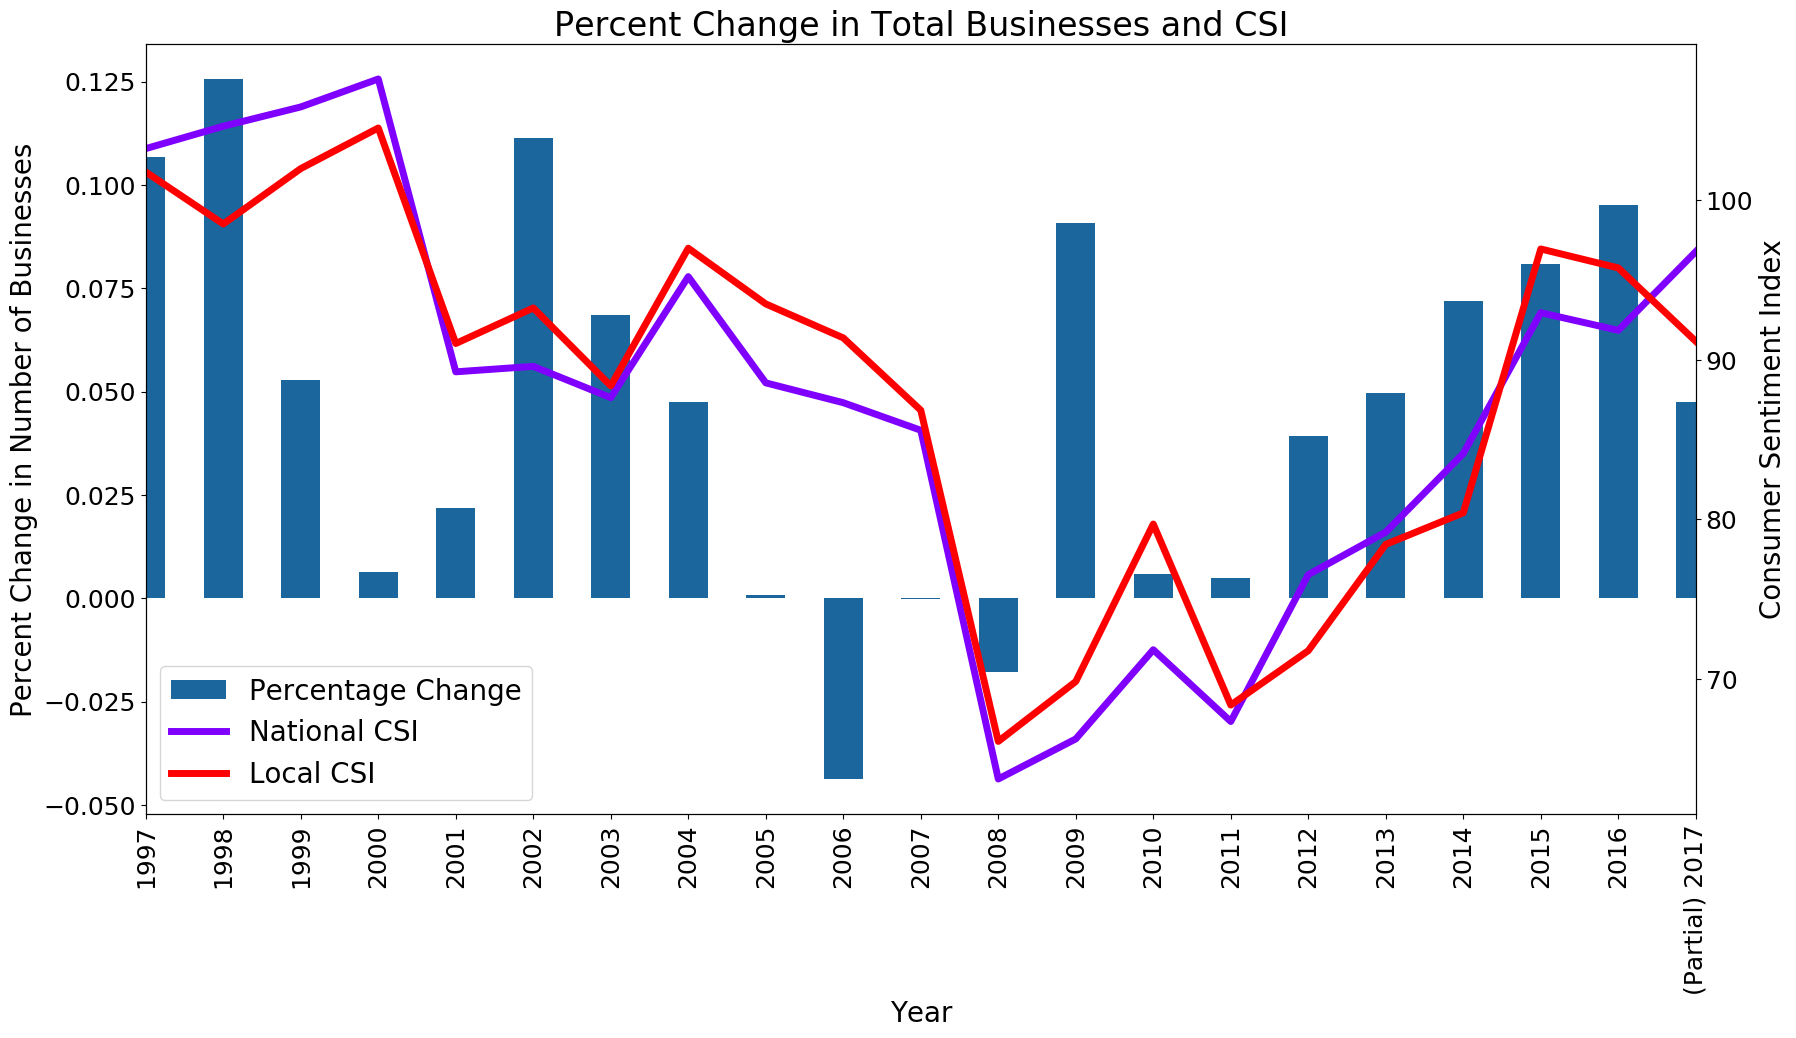

In [57]:
# Plot
# For whatever reason, multiple plots only works if the x axis is a string value
temp_df = year_counts_df.copy()
temp_df = temp_df[temp_df.index >= 1997]
temp_df['Year'] = temp_df['Year'].astype('str')

## PLOTTING ##
fig, ax1 = plt.subplots(1, 1)
temp_df[['Year', 'Percentage Change']].plot(
    ax=ax1, rot=90,
    kind='bar',
    x='Year')

ax2 = ax1.twinx()
temp_df[['Year', 'National CSI', 'Local CSI']].plot(
    ax=ax2, mark_right=False,
    linestyle='-', colormap='rainbow', linewidth=5,
    x='Year')

# Figure
ax1.set_title('Percent Change in Total Businesses and CSI')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percent Change in Number of Businesses')
ax2.set_ylabel('Consumer Sentiment Index')

# Label 2017 as incomplete
x_labels = ax1.get_xticklabels()
x_labels[20] = '(Partial) 2017'
ax1.set_xticklabels(x_labels)

# Hide old legends
ax1.get_legend().set_visible(False)
ax2.get_legend().set_visible(False)

# Make new legend
ax1_handles, ax1_labels = ax1.get_legend_handles_labels()
ax2_handles, ax2_labels = ax2.get_legend_handles_labels()
plt.legend(ax1_handles + ax2_handles, ax1_labels + ax2_labels, loc=3)

print "CSI correlation with net change:", temp_df['Local CSI'].corr(temp_df['Net Change'])
print "CSI correlation with percent change:", temp_df['Local CSI'].corr(temp_df['Percentage Change'])
print "CSI correlation with open fraction:", temp_df['Local CSI'].corr(temp_df['Open Fraction'])

print "Shifted CSI correlation with net change:", temp_df['Local CSI (-2 Years)'].corr(temp_df['Net Change'])
print "Shifted CSI correlation with percent change:", temp_df['Local CSI (-2 Years)'].corr(temp_df['Percentage Change'])
print "Shifted CSI correlation with open fraction:", temp_df['Local CSI (-2 Years)'].corr(temp_df['Open Fraction'])

In [58]:
temp_df = year_counts_df[year_counts_df.index >= 1984]
print "CSI correlation with net change:", temp_df['Local CSI'].corr(temp_df['Net Change'])
print "CSI correlation with percent change:", temp_df['Local CSI'].corr(temp_df['Percentage Change'])
print "CSI correlation with open fraction:", temp_df['Local CSI'].corr(temp_df['Open Fraction'])

CSI correlation with net change: 0.203431343128
CSI correlation with percent change: 0.20265965628
CSI correlation with open fraction: 0.218817349805


In [59]:
years = act_bus_copy['start_date'].dt.year.sort_values().unique()
tempDf = act_bus_copy[act_bus_copy['start_date'].dt.year == years[0]]['NAICS Business Type'].value_counts()

for year in years[1:]:
    tempDf2 = act_bus_copy[act_bus_copy['start_date'].dt.year == year]['NAICS Business Type'].value_counts()
    tempDf = pd.concat([tempDf,tempDf2],axis=1).fillna(0)
tempDf.columns = years
tempDf

1948  1955  1957  1958  \
Accommodation and Food Services                    0.0   0.0   0.0   0.0   
Admin., Support, Waste Mgmt., Remediation          0.0   0.0   1.0   0.0   
Agriculture, Forestry, Fishing and Hunting         0.0   0.0   0.0   0.0   
Arts, Entertainment, and Recreation                0.0   0.0   0.0   0.0   
Construction                                       0.0   0.0   0.0   0.0   
Educational Services                               0.0   0.0   0.0   0.0   
Finance & Insurance                                1.0   0.0   0.0   0.0   
Health Care and Social Assistance                  0.0   0.0   0.0   0.0   
Information                                        0.0   0.0   0.0   0.0   
Manufacturing                                      0.0   0.0   0.0   0.0   
Manufacturing/Wholesale trade                      0.0   0.0   0.0   0.0   
Other Services                                     0.0   0.0   0.0   0.0   
Professional, Scientific, and Technical Services   0.0   0.0   0.0   1.0   
Real Estate Rental and Leasing                     0.0   0.0   0.0   0.0   
Retail Trade                                       0.0   0.0   0.0   1.0   
Transportation and Warehousing                     0.0   0.0   0.0   0.0   
Wholesale trade                                    0.0   0.0   0.0   0.0   
Wholesale trade                                    0.0   1.0   0.0   0.0   

                                                  1968  1969  1971  1972  \
Accommodation and Food Services                    0.0   0.0   0.0   0.0   
Admin., Support, Waste Mgmt., Remediation          0.0   0.0   0.0   0.0   
Agriculture, Forestry, Fishing and Hunting         0.0   0.0   0.0   0.0   
Arts, Entertainment, and Recreation                0.0   0.0   0.0   0.0   
Construction                                       1.0   0.0   0.0   1.0   
Educational Services                               0.0   0.0   0.0   0.0   
Finance & Insurance                                0.0   0.0   0.0   0.0   
Health Care and Social Assistance                  0.0   0.0   0.0   0.0   
Information                                        0.0   0.0   1.0   0.0   
Manufacturing                                      0.0   0.0   0.0   0.0   
Manufacturing/Wholesale trade                      0.0   0.0   0.0   0.0   
Other Services                                     0.0   0.0   1.0   0.0   
Professional, Scientific, and Technical Services   0.0   1.0   1.0   0.0   
Real Estate Rental and Leasing                     0.0   0.0   0.0   0.0   
Retail Trade                                       1.0   1.0   0.0   1.0   
Transportation and Warehousing                     0.0   0.0   0.0   0.0   
Wholesale trade                                    0.0   0.0   0.0   0.0   
Wholesale trade                                    0.0   0.0   0.0   0.0   

                                                  1973  1974  ...    2008  \
Accommodation and Food Services                    0.0   0.0  ...    23.0   
Admin., Support, Waste Mgmt., Remediation          1.0   0.0  ...    20.0   
Agriculture, Forestry, Fishing and Hunting         0.0   0.0  ...     0.0   
Arts, Entertainment, and Recreation                0.0   0.0  ...     4.0   
Construction                                       0.0   1.0  ...    12.0   
Educational Services                               0.0   0.0  ...     2.0   
Finance & Insurance                                1.0   0.0  ...    19.0   
Health Care and Social Assistance                  0.0   0.0  ...    21.0   
Information                                        0.0   0.0  ...     0.0   
Manufacturing                                      0.0   0.0  ...     3.0   
Manufacturing/Wholesale trade                      0.0   0.0  ...     0.0   
Other Services                                     0.0   0.0  ...    52.0   
Professional, Scientific, and Technical Services   0.0   0.0  ...    41.0   
Real Estate Rental and Leasing                     1.0   0.0  ...    16.0   
Retai

In [60]:
# number_of_NAICS_bus_type = len(tempDf.index)
# num_cols = 2
# num_rows = int(math.ceil(1.0*number_of_NAICS_bus_type/num_cols))
# fig, axes = plt.subplots(nrows= num_rows, ncols= num_cols)
# row_num = 0
# col_num = 0

# fig.set_figwidth(20)
# fig.set_figheight(90)
# column_names = tempDf.index
# for index, col in enumerate(column_names):
#     ax = tempDf.transpose()[col].plot(kind='bar',ax=axes[index/num_cols, index%num_cols])
#     ax.set_ylabel(col,rotation=0, size='x-large')
#     ax.yaxis.set_label_coords(0.4,0.9)

In [61]:
# ax = tempDf.transpose().plot(kind='bar',stacked=True,figsize=(15,15))
# ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)

** Finding how many businesses failed early on **

In [62]:
# def plot_lifespan_by_months(ls_series, max_days = 10000):
#     months = 6
#     days = 182.5
#     lifespan_dict={}
#     while (days < min(max_days, max(ls_series.index))):
#         temp_series = ls_series[(ls_series.index < days) & (ls_series.index >= days - 182.5)]
#         #print temp_series.sum()
#         num = temp_series.sum()
#         if num > 0:
#             lifespan_dict[months] = temp_series.sum()
#         months += 6
#         days += 182.5
#     lifespan_by_months_series = pd.Series(lifespan_dict, name='number of businesses')
#     ax = lifespan_by_months_series.plot(kind='bar', figsize=(15,10))
#     return ax

In [63]:
# def plot_lifespan_by_years(ls_series, max_years = 10000):
#     months_in_year = 12
#     months = months_in_year
#     days_in_year = 352.25
#     days = days_in_year
#     max_days = max_years * days_in_year
#     lifespan_dict={}
#     while (days < min(max_days, max(ls_series.index))):
#         temp_series = ls_series[(ls_series.index < days) & (ls_series.index >= days - days_in_year/2)]
#         #print temp_series.sum()
#         num = temp_series.sum()
#         if num > 0:
#             lifespan_dict[months/months_in_year] = temp_series.sum()
#         months += months_in_year
#         days += days_in_year
#     lifespan_by_months_series = pd.Series(lifespan_dict, name='number of businesses')
#     ax = lifespan_by_months_series.plot(kind='bar', figsize=(15,10))
#     return ax

In [64]:
# temp = inactive_business_df[inactive_business_df['life_span']  > 0]['life_span'].value_counts()

# ax = plot_lifespan_by_months(temp, max_days=6000)
# ax.set_title('Inactive Business Lifespans')
# ax.set_xlabel('Months')
# ax.set_ylabel('Business count')

** Finding ages of active businesses **

In [65]:
# temp = active_businesses_df[active_businesses_df['life_span']  > 0]['life_span'].value_counts()

# ax = plot_lifespan_by_months(temp, max_days=9000)
# ax.set_title('Active Business Ages')
# ax.set_xlabel('Months')
# ax.set_ylabel('Business count')

In [66]:
# temp = active_businesses_df[active_businesses_df['life_span']  > 0]['life_span'].value_counts()

# ax = plot_lifespan_by_years(temp, max_years=31)
# ax.set_title('Active Business Ages')
# ax.set_xlabel('Years')
# ax.set_ylabel('Business count')

## Business Ages using Life Span

In [67]:
# life_spans_df = pd.DataFrame(index=range(0, 70))
# life_spans_df['Year Total'] = (merged_locations_df[merged_locations_df['Lifespan']  > 0]['Lifespan']//365.25).value_counts()

# ax = life_spans_df['Year Total'][:31].plot(kind='bar', ylim=(0, 700), figsize=(15, 10))
# ax.set_title('Active Business Ages')
# ax.set_xlabel('Years')
# ax.set_ylabel('Business count')

# for p in ax.patches:
#     ax.annotate(str(int(np.round(p.get_height()))), (p.get_x() - .075, p.get_height()+4), rotation =90, ha='left', va='bottom')

## Business Ages using Start Date

** Merge by ID and location **

In [68]:
merged_active_locations_df = master_df.drop_duplicates(subset=['GRU ID', 'Address'])
len(merged_active_locations_df)

5528

** Get active business ages **

In [69]:
len(merged_active_locations_df)

5528

In [70]:
(merged_active_locations_df['Start Date'] >= datetime.datetime(2009, 1, 1)).sum()

2730

In [71]:
current_time = datetime.datetime(2017, 11, 1) # Date the ActiveBusinesses dataset was last modified

temp_df = merged_active_locations_df[['DGLIM ID']].copy()
temp_df['Life Span'] = merged_active_locations_df['Start Date'].apply(lambda x: math.floor((current_time - x).days/365.25))

years_active_df = pd.DataFrame(index=range(0, 70))
years_active_df['Year Total'] = temp_df['Life Span'].value_counts()
years_active_df['Running Total'] = np.cumsum(years_active_df['Year Total'].iloc[::-1])

# years_active_df

** Get inactive business ages **

In [72]:
temp_df = inactive_business_df.copy()
temp_df['Life Span in Years'] = ((inactive_business_df['out_of_business'] - inactive_business_df['start_date']).dt.days//365.25).clip(lower=0, axis='columns')

years_inactive_df = pd.DataFrame(index=range(0, 70))
years_inactive_df['Year Total'] = temp_df['Life Span in Years'].value_counts()
years_inactive_df['Descending Running Total'] = np.cumsum(years_inactive_df['Year Total'].iloc[::-1])
years_inactive_df['Ascending Running Total'] = np.cumsum(years_inactive_df['Year Total'])

In [73]:
temp_df['start_date'].sort_values()

6219   1950-09-27
7617   1952-11-01
3343   1955-06-01
1687   1960-01-01
1825   1960-01-01
323    1960-06-28
7939   1961-01-01
3993   1961-08-30
7364   1961-09-01
2441   1965-01-01
4897   1966-01-01
6501   1966-08-15
2704   1966-10-01
4046   1967-01-01
1764   1967-05-01
3463   1968-01-01
7392   1968-03-01
580    1968-11-01
7913   1970-01-01
7966   1970-01-01
6031   1970-01-01
42     1970-06-01
672    1971-01-01
7576   1971-01-01
6247   1971-10-08
5203   1971-12-13
1399   1972-01-01
6946   1972-01-01
2982   1972-01-01
7390   1972-03-01
          ...    
880    2016-03-28
4438   2016-03-29
4151   2016-04-01
5408   2016-04-05
4629   2016-04-25
6429   2016-04-26
7962   2016-04-28
8474   2016-04-29
2036   2016-05-02
662    2016-05-17
6223   2016-06-07
8244   2016-06-15
5316   2016-06-16
2987   2016-06-16
7189   2016-06-21
4237   2016-06-21
7082   2016-07-01
5822   2016-07-22
1476   2016-07-25
7052   2016-08-03
3431   2016-09-01
3626   2016-11-01
3625   2016-11-23
7067   2016-12-02
2031   201

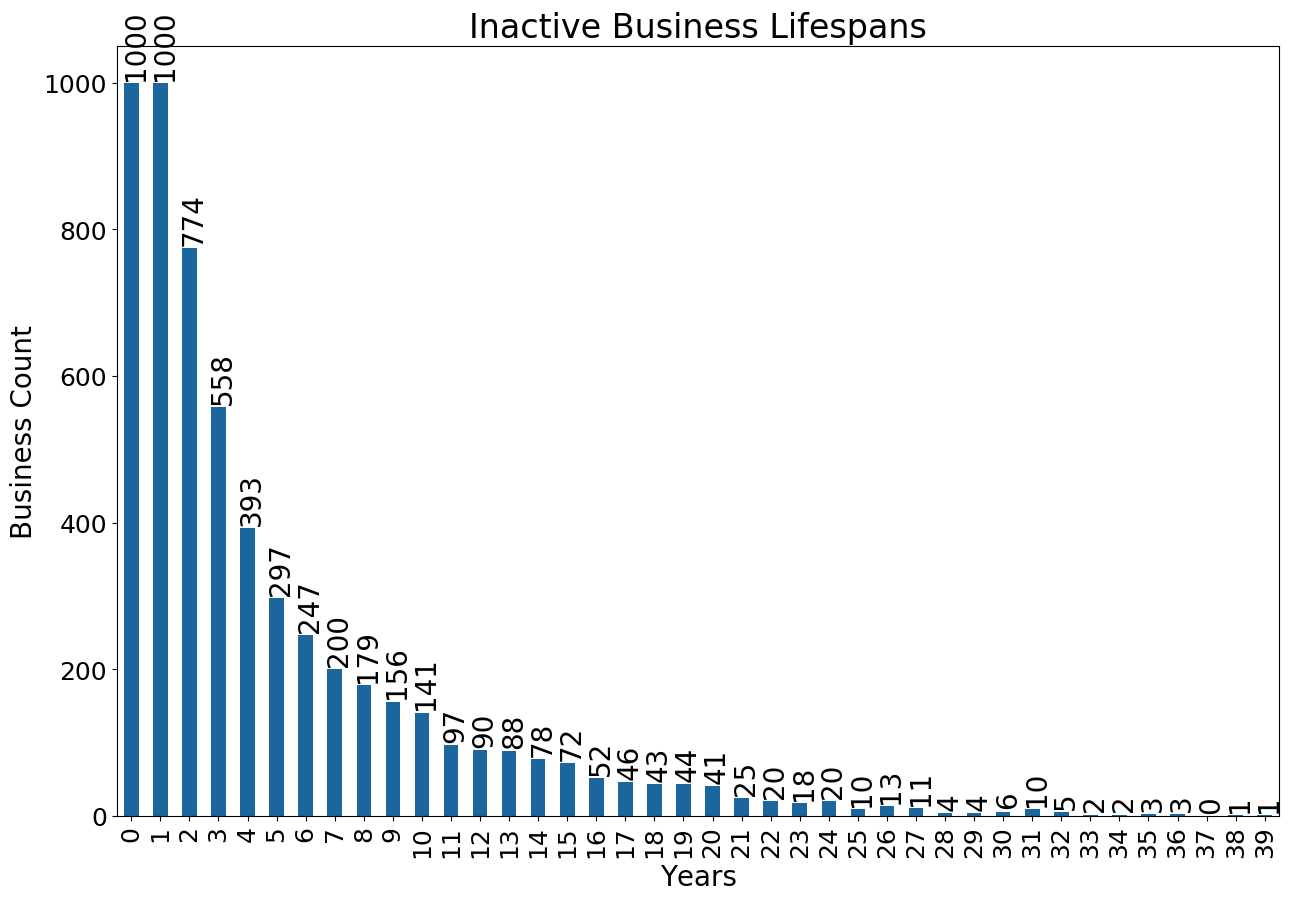

In [74]:
ax = years_inactive_df['Year Total'][:40].clip(upper=1000, axis='columns').plot(kind='bar', figsize=(15, 10))
ax.set_title('Inactive Business Lifespans')
ax.set_xlabel('Years')
ax.set_ylabel('Business Count')

for p in ax.patches:
    ax.annotate(str(int(np.round(p.get_height()))), (p.get_x() - .075, p.get_height()+4), rotation=90, ha='left', va='bottom')

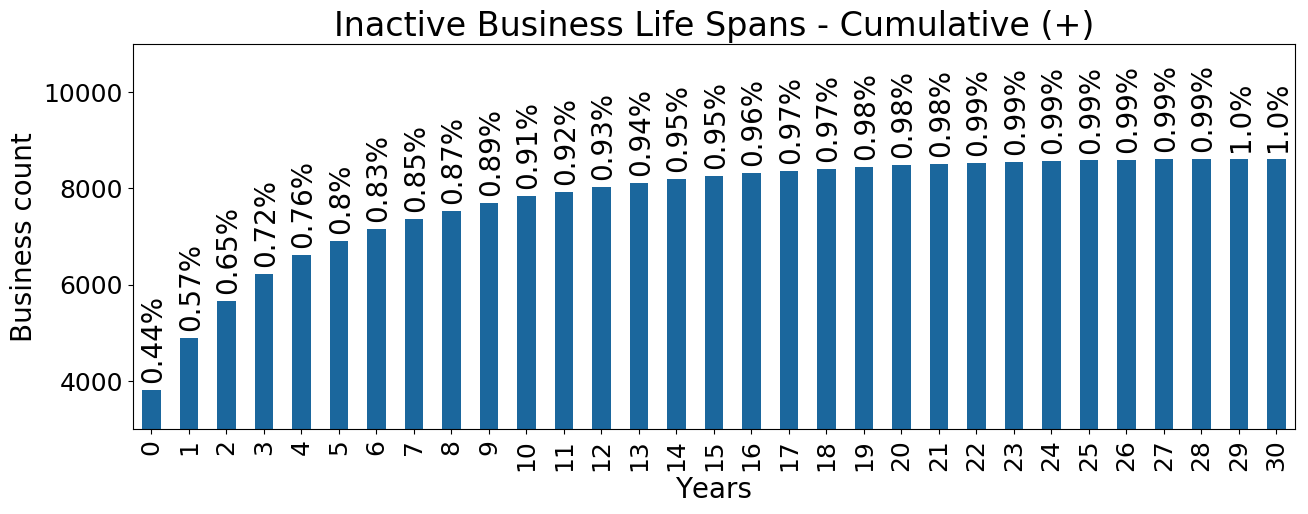

In [75]:
ax = years_inactive_df['Ascending Running Total'][:31].plot(kind='bar', ylim=(3000, 11000), figsize=(15, 5))
ax.set_title('Inactive Business Life Spans - Cumulative (+)')
ax.set_xlabel('Years')
ax.set_ylabel('Business count')

total = years_inactive_df['Ascending Running Total'].max()
for p in ax.patches:
    text  = str(np.around(p.get_height()/total, decimals=2)) + '%'
    ax.annotate(text, (p.get_x() - .075, p.get_height()+150), rotation =90, ha='left', va='bottom')

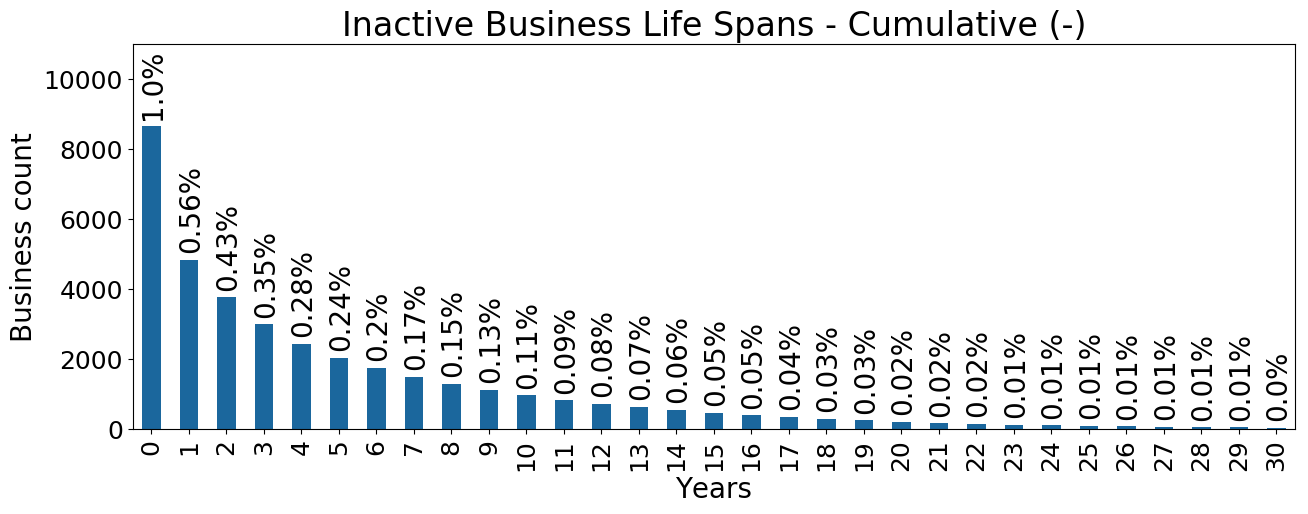

In [76]:
ax = years_inactive_df['Descending Running Total'][:31].plot(kind='bar', ylim=(0, 11000), figsize=(15, 5))
ax.set_title('Inactive Business Life Spans - Cumulative (-)')
ax.set_xlabel('Years')
ax.set_ylabel('Business count')

total = years_inactive_df['Descending Running Total'].max()
for p in ax.patches:
    text  = str(np.around(p.get_height()/total, decimals=2)) + '%'
    ax.annotate(text, (p.get_x() - .075, p.get_height()+200), rotation =90, ha='left', va='bottom')

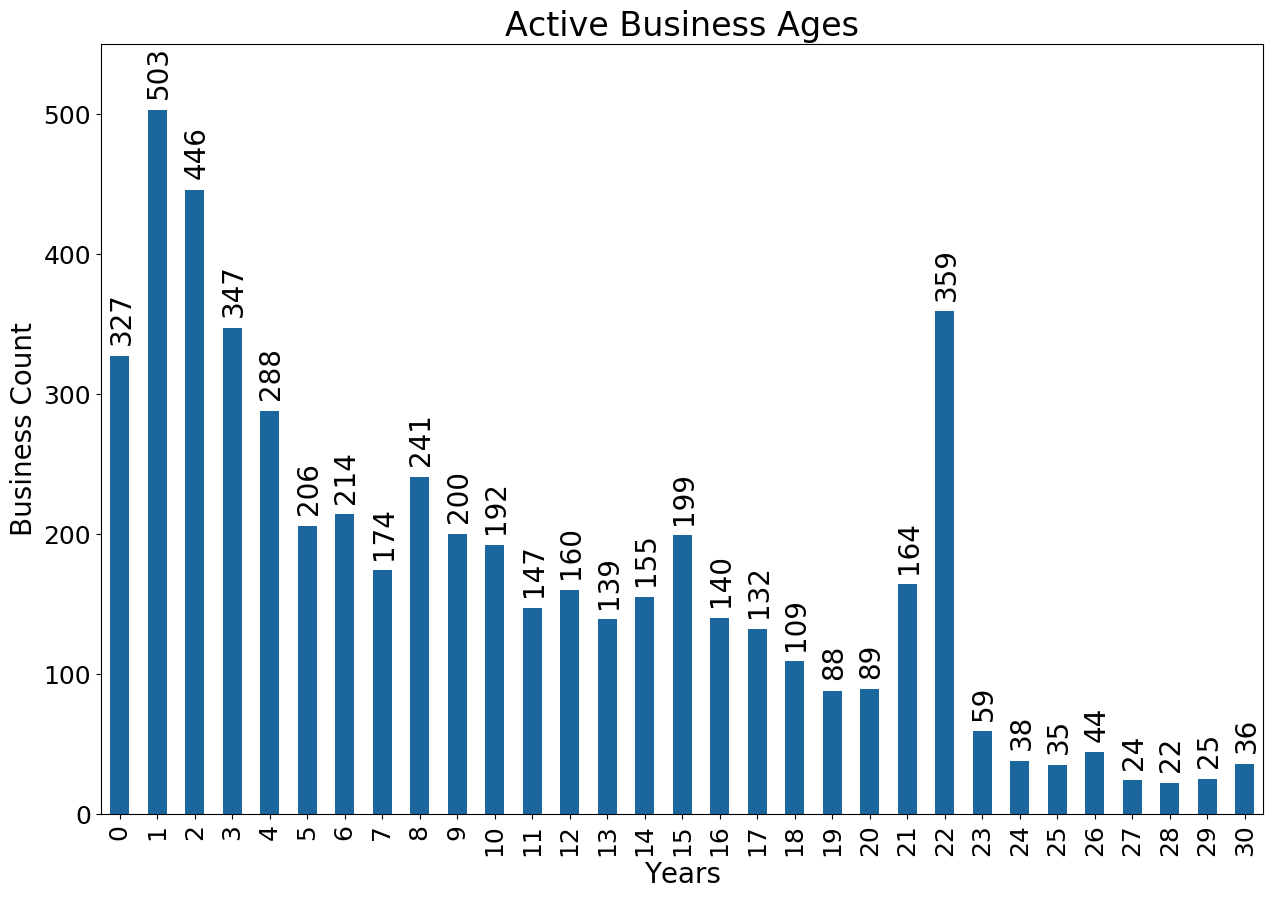

In [77]:
ax = years_active_df['Year Total'][:31].plot(kind='bar', ylim=(0, 550), figsize=(15, 10))
ax.set_title('Active Business Ages')
ax.set_xlabel('Years')
ax.set_ylabel('Business Count')

for p in ax.patches:
    ax.annotate(str(int(np.round(p.get_height()))), (p.get_x() - .075, p.get_height() + 8), rotation =90, ha='left', va='bottom')

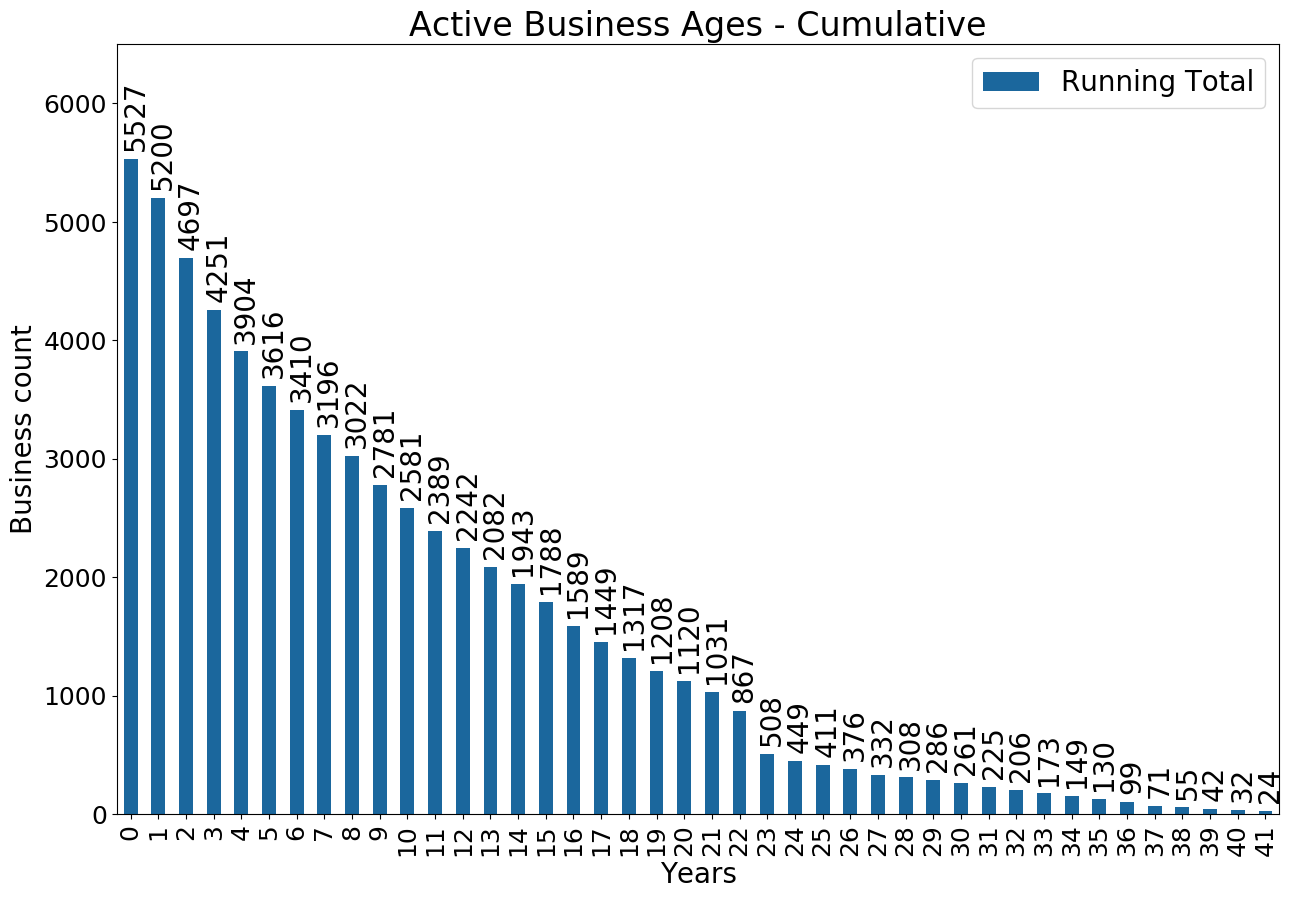

In [78]:
ax = years_active_df[['Running Total']][:42].plot(kind='bar', ylim=(0, 6500), figsize=(15, 10))
ax.set_title('Active Business Ages - Cumulative')
ax.set_xlabel('Years')
ax.set_ylabel('Business count')

for p in ax.patches:
    ax.annotate(str(int(np.round(p.get_height()))), (p.get_x() - .075, p.get_height() + 70), rotation =90, ha='left', va='bottom')

In [79]:
max(active_businesses_df[active_businesses_df['life_span']/365  > 40]['life_span']/365)

69.852054794520555

In [80]:
temp_df = inactive_business_df[(inactive_business_df['life_span'] > 30)& (inactive_business_df['life_span'] < 365)]

In [81]:
inactive_business_df[inactive_business_df['business_type'].notnull()].shape[0]

1272

In [82]:
temp_df[~temp_df['business_type'].isnull()]['business_type'].value_counts(normalize=True).apply(lambda x: x*100)

PEDDLER                                       20.714286
RETAIL MERCHANT                                8.571429
YARD PARKING PER ORDINANCE                     7.857143
INTERIOR JANITORIAL AND CLEANING SERVICES      5.000000
SERVICE-OTHER                                  4.285714
RESTAURANT                                     3.571429
CONSULTANT                                     2.857143
MASSAGE THERAPIST                              2.857143
BARBER/COSMETOLOGIST/NAIL TECH                 2.857143
CONTRACTOR-INSTALLATION                        2.142857
CONTRACTOR-LAND CLEAR/INCL. LANDSCAPE          2.142857
CONTRACTOR-PAINTER/PAPERHANGER                 2.142857
CLINICAL SOCIAL WORKER                         1.428571
PROFESSIONAL-ACUPUNCTURE                       1.428571
CATALOGUE OR MAIL ORDER SERVICE                1.428571
ADVERTISING AGENCY                             1.428571
REPAIRS NOT REQUIRING STATE LICENSE            1.428571
TAXIS, VANS WITH DRIVERS                       1

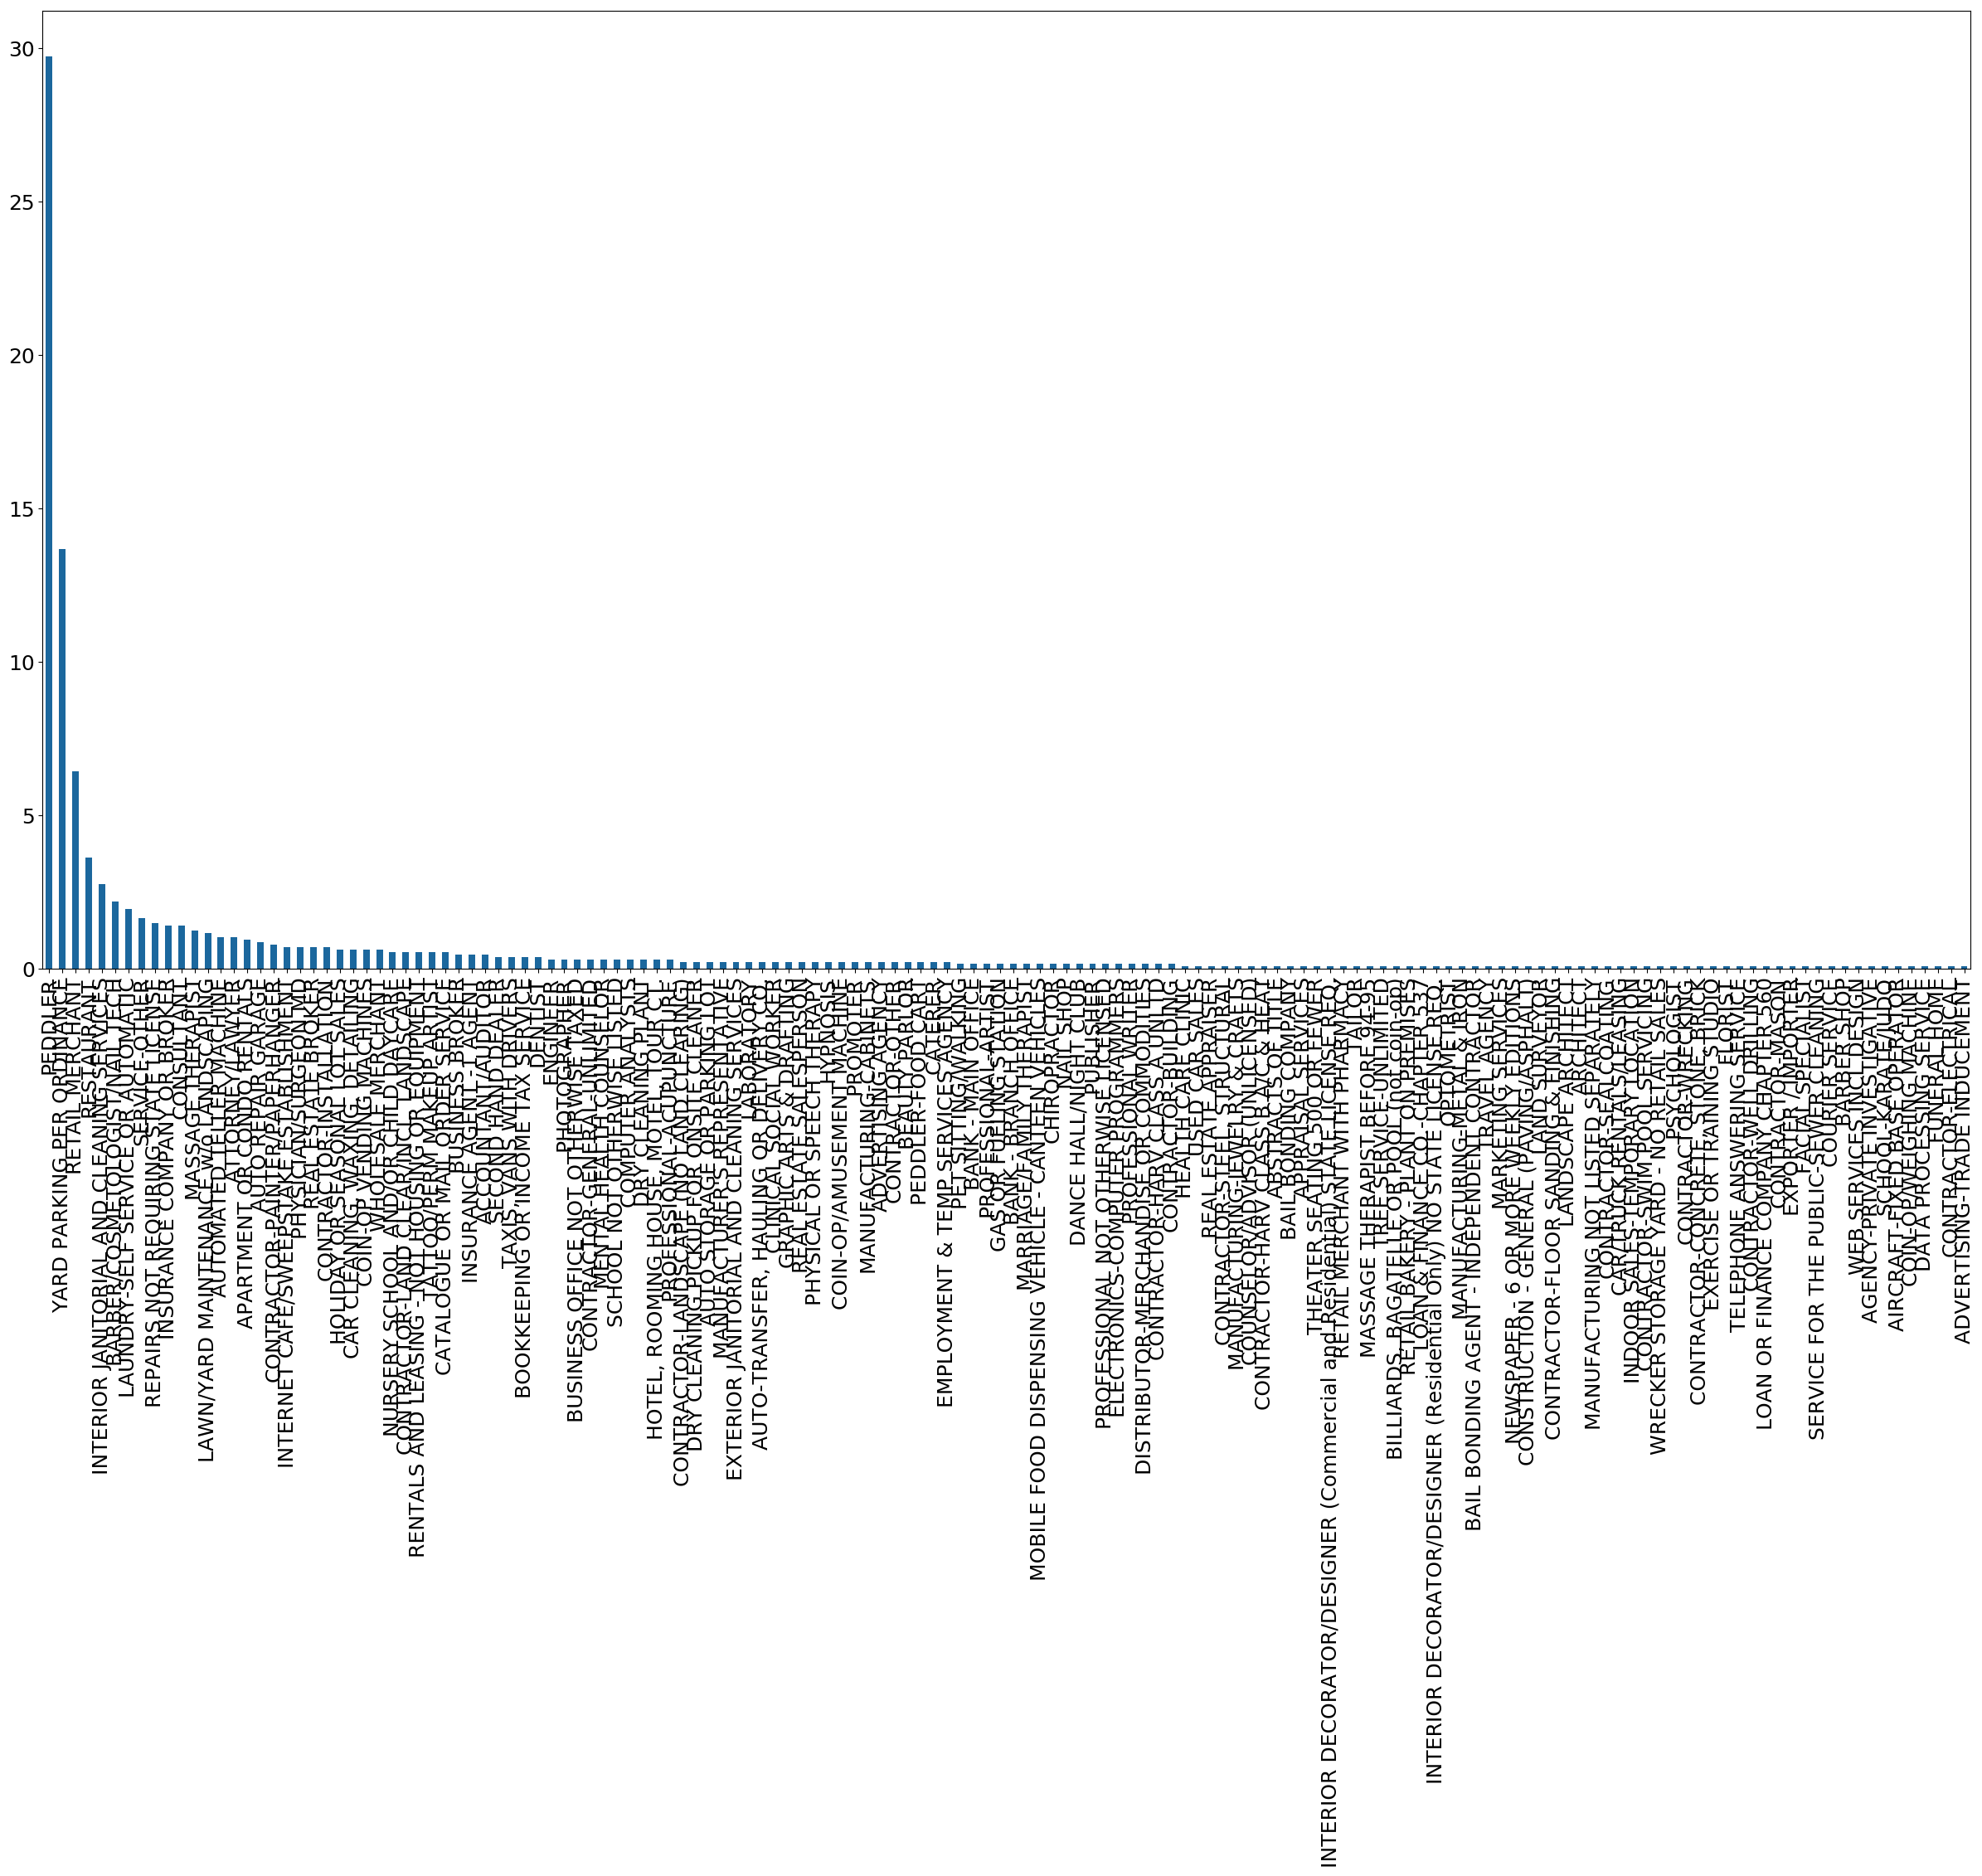

In [83]:
(inactive_business_df[(~inactive_business_df['business_type'].isnull())]['business_type'].value_counts(normalize=True)*100).plot(kind='bar', figsize=(30,15))

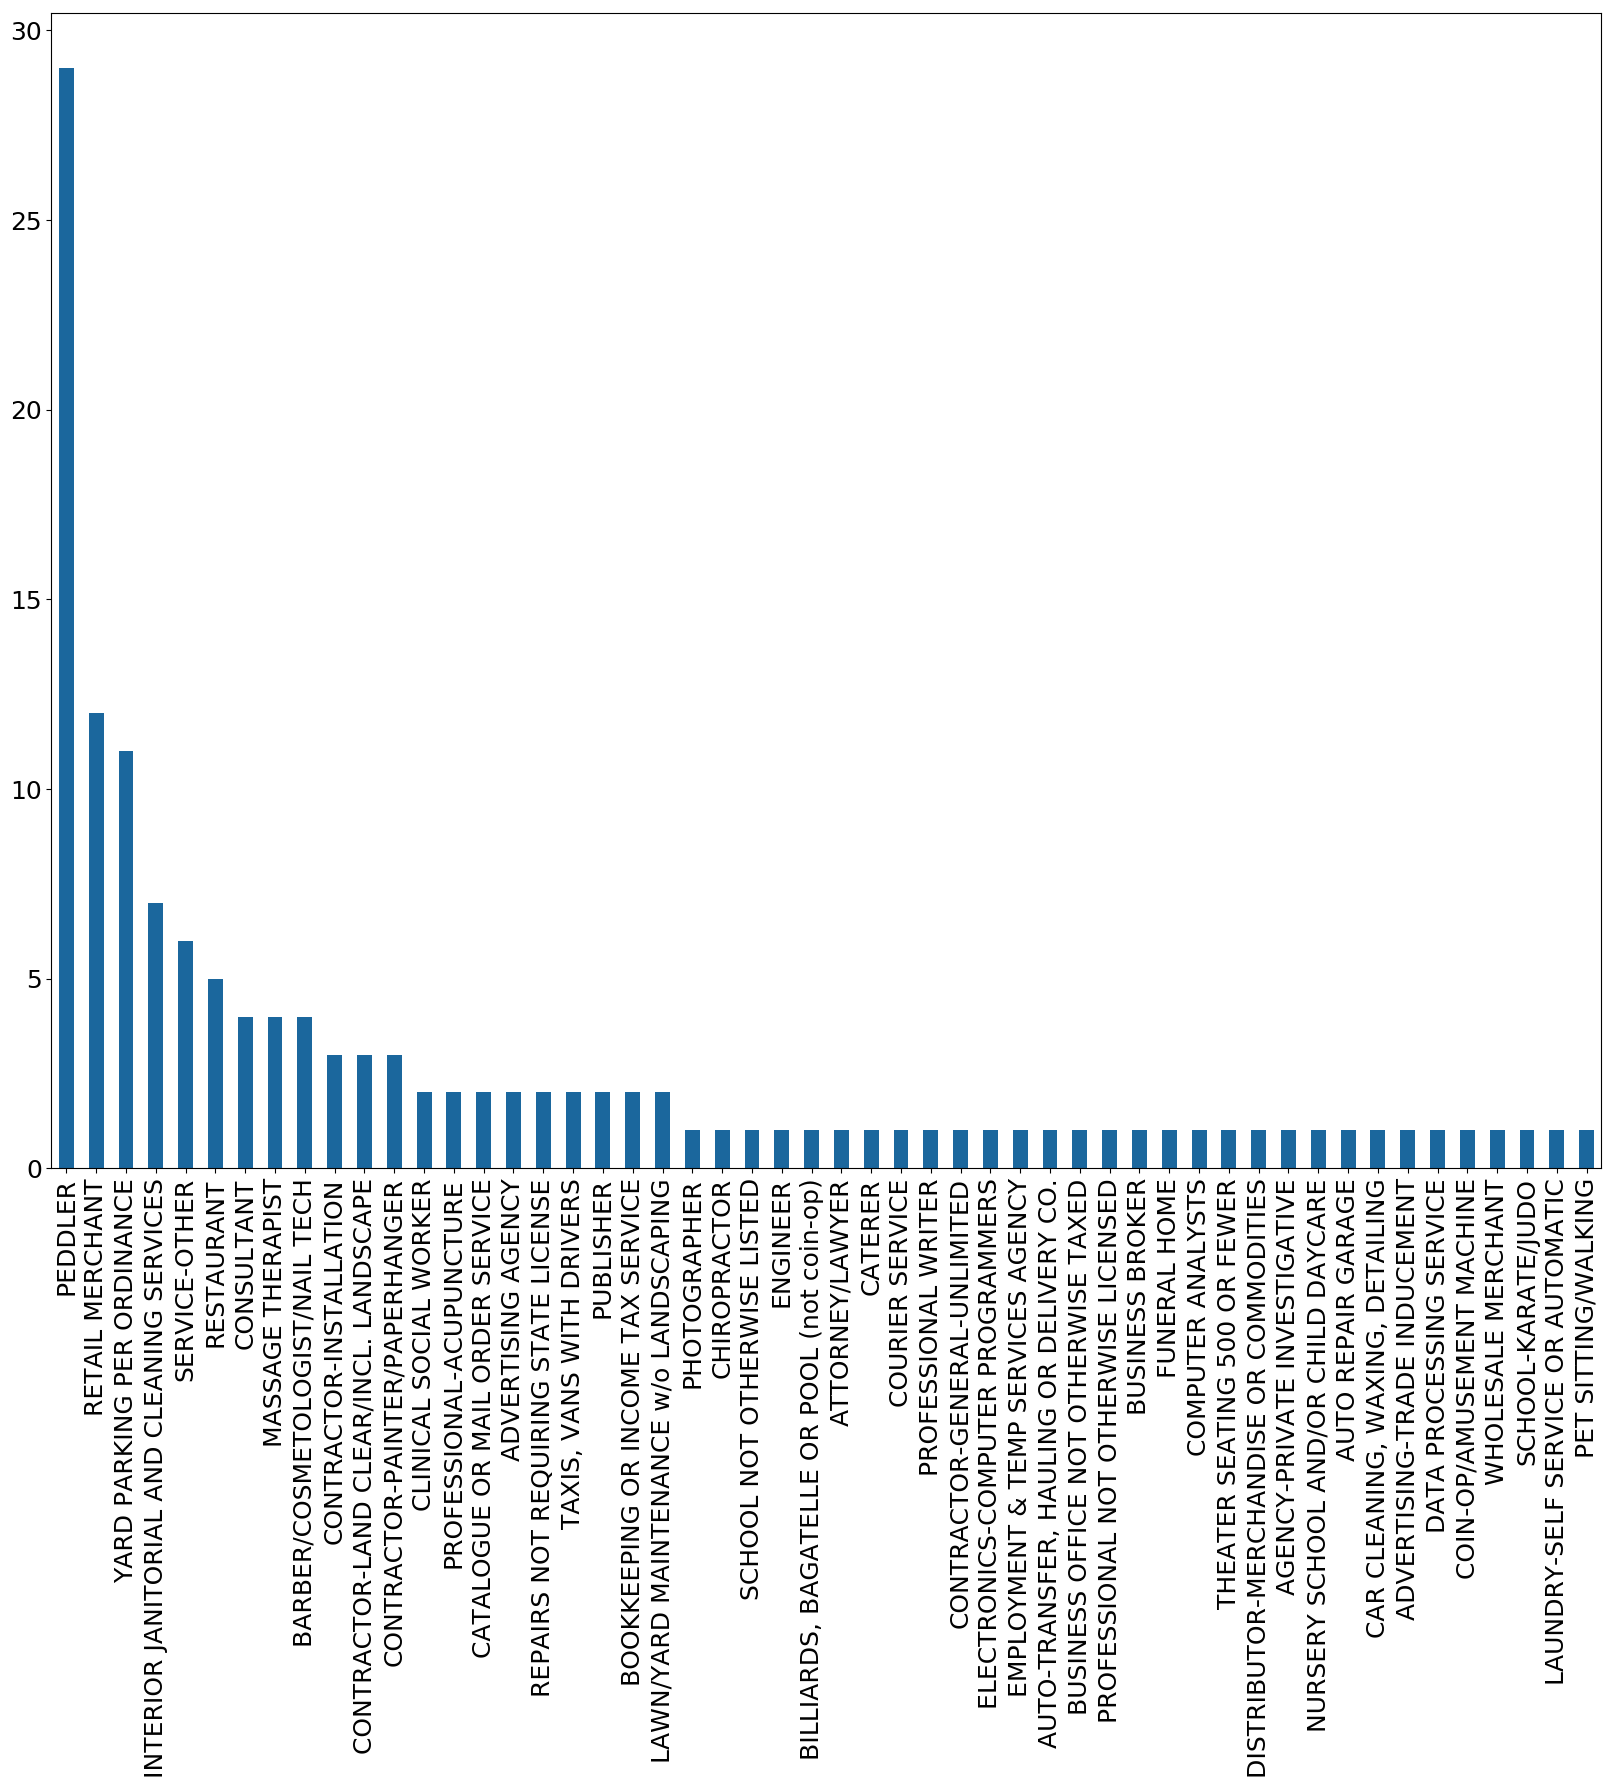

In [84]:
temp_df[~temp_df['business_type'].isnull()]['business_type'].value_counts().plot(kind='bar', figsize=(20,15))

In [85]:
lifespan_stats_df = inactive_business_df[['business_type','life_span']].groupby('business_type').agg(['min','max','mean',pd.Series.median,pd.Series.mode])

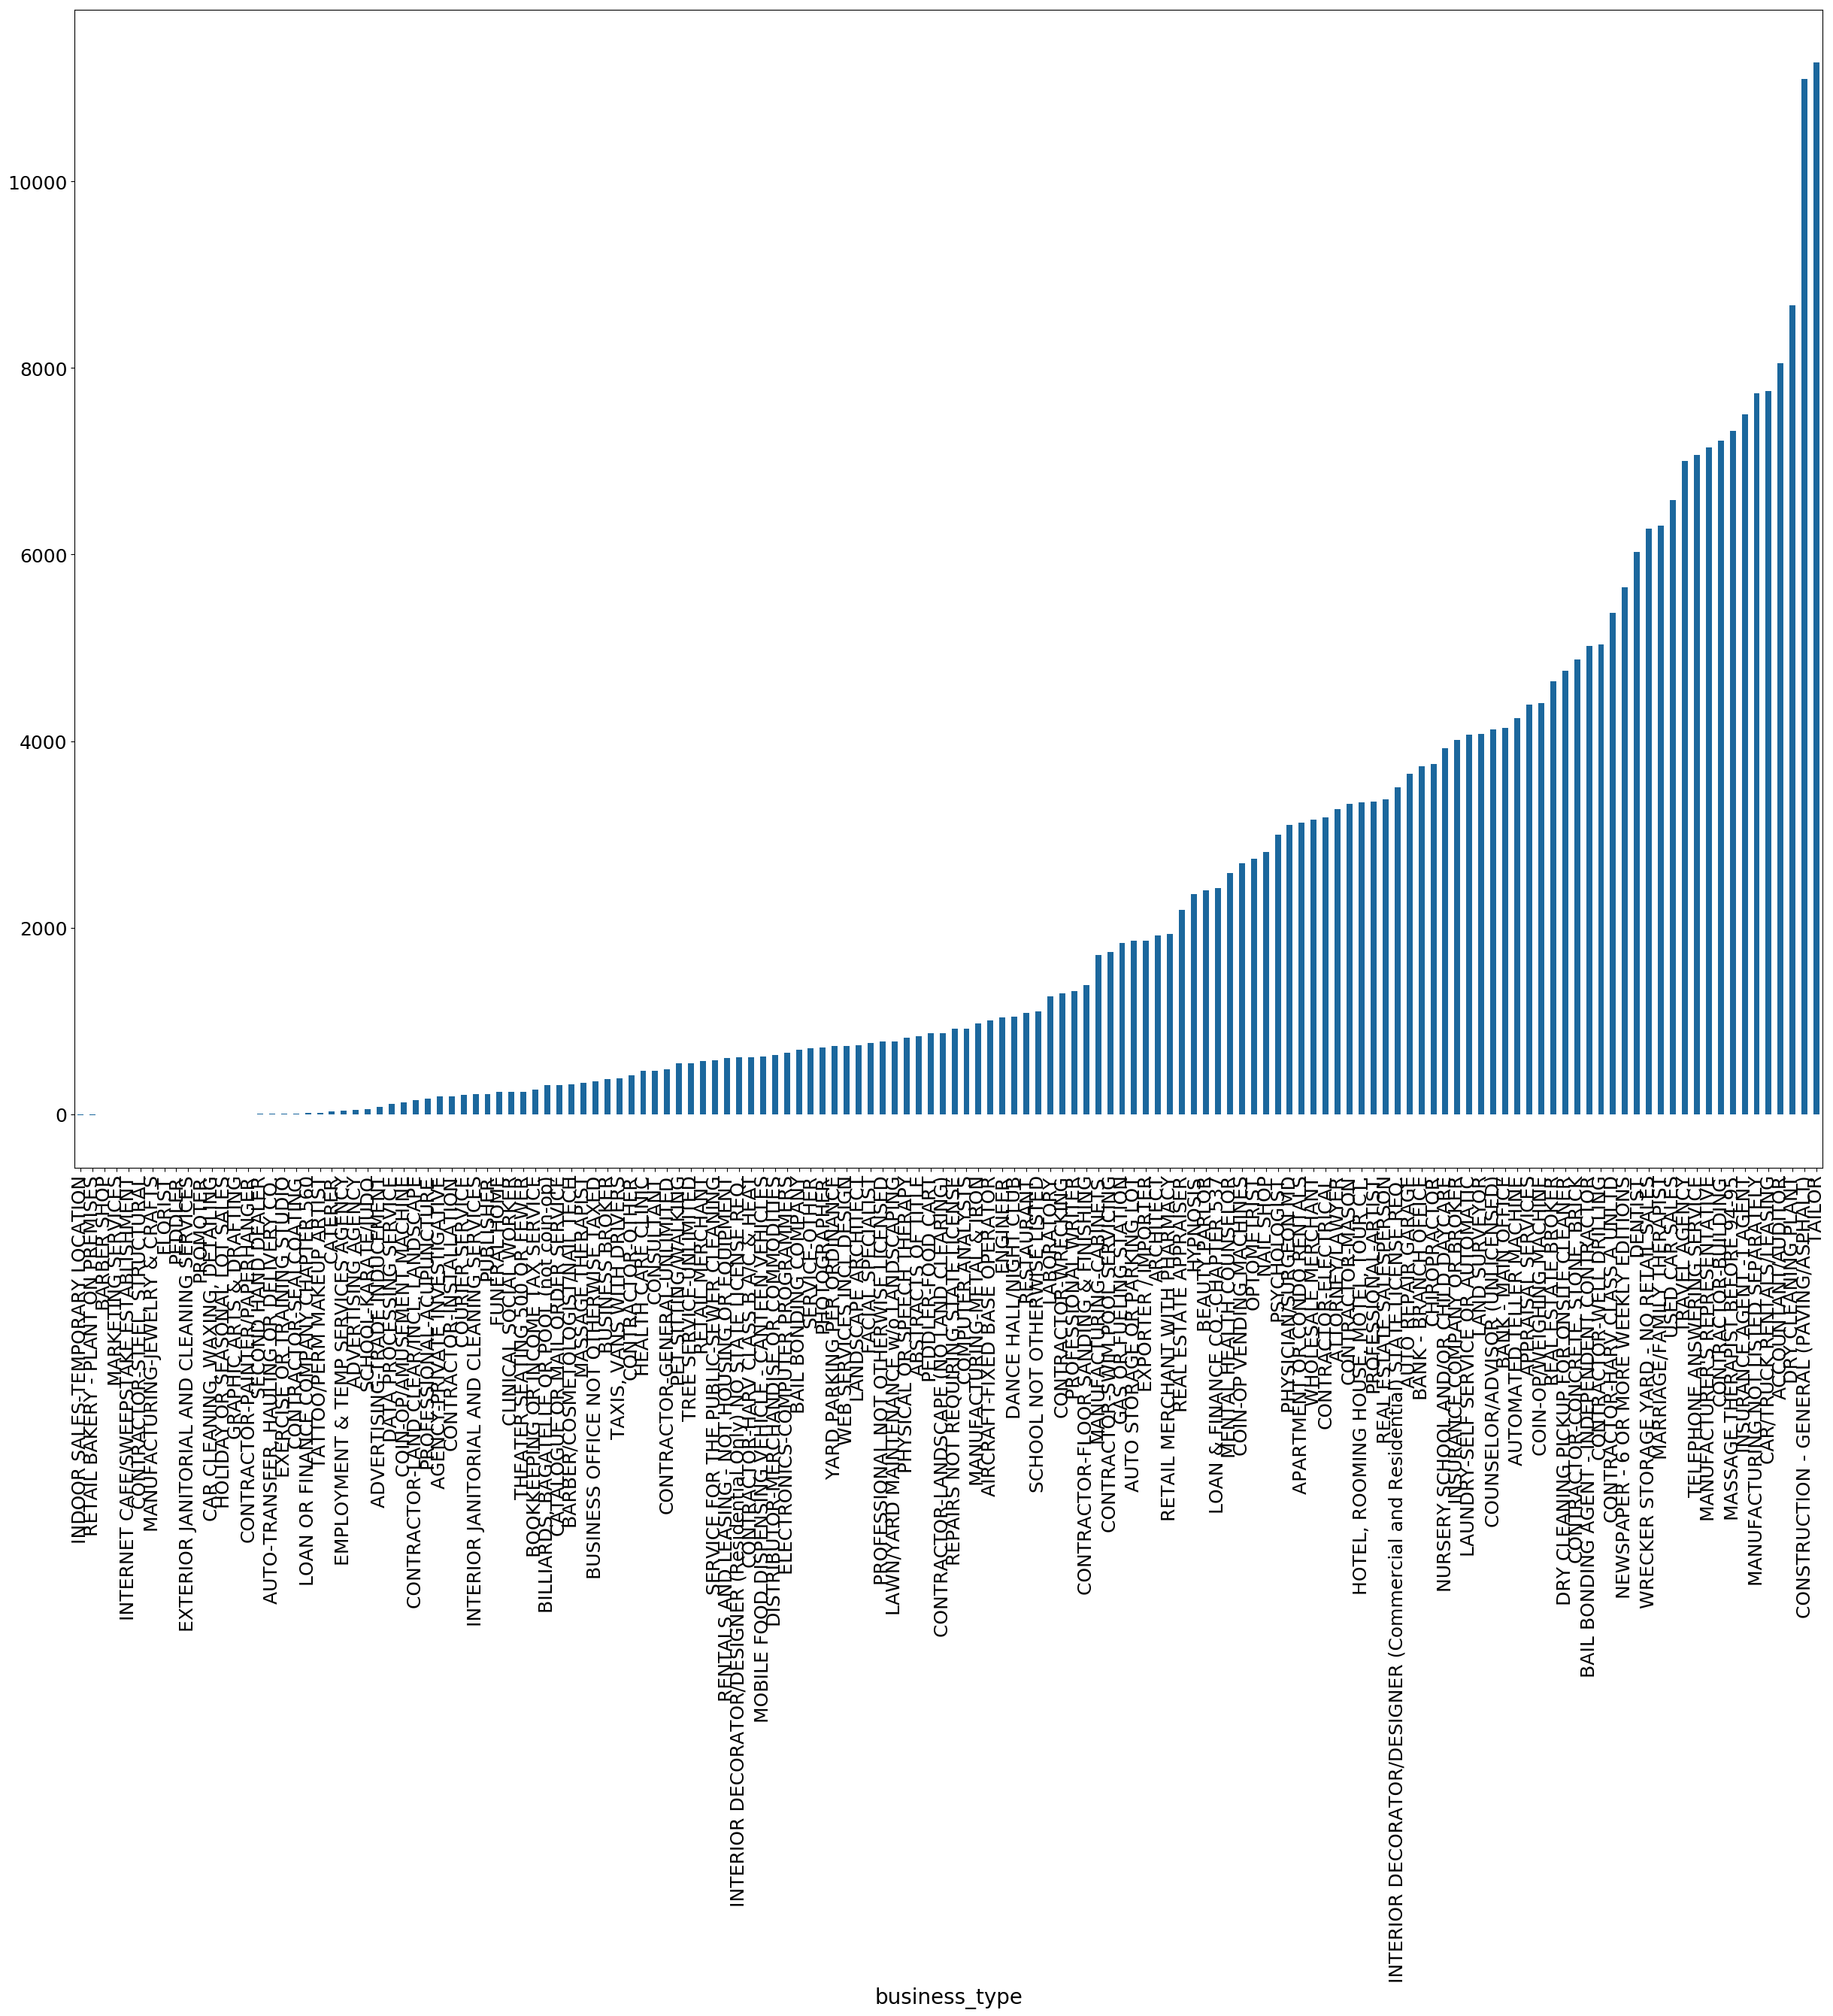

In [86]:
lifespan_stats_df['life_span']['median'].sort_values().plot(kind='bar', figsize=(30,20))

** Plot with clipping **

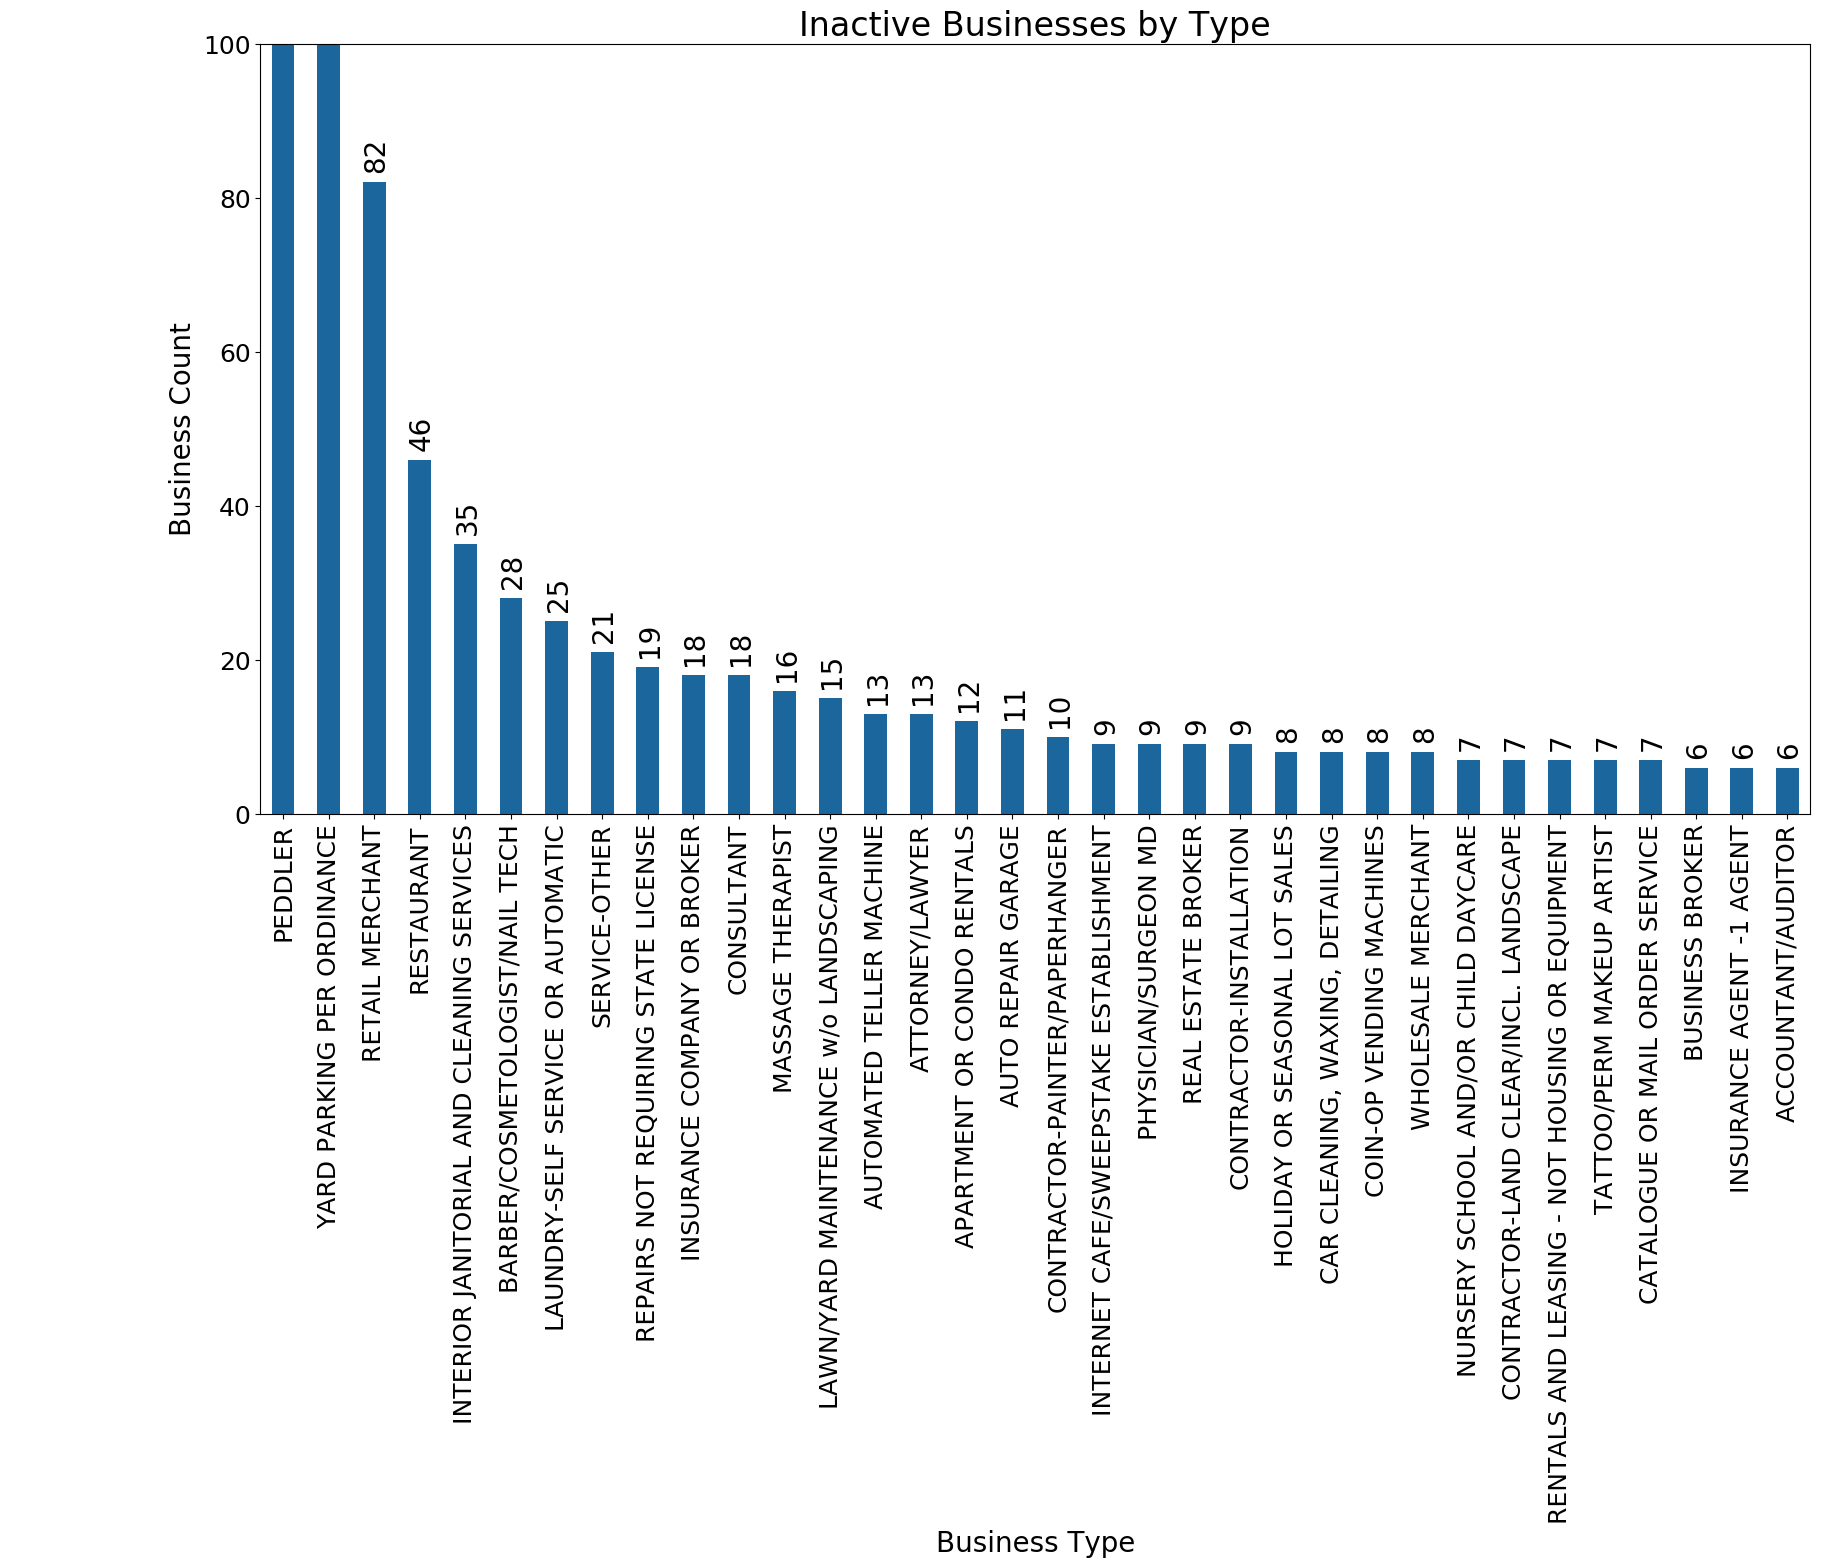

In [87]:
temp_series = inactive_business_df[inactive_business_df['business_type'].notnull()]['business_type'].value_counts()

ax = temp_series[temp_series > 5].plot(kind='bar', ylim=(0, 100), figsize=(20, 10))
ax.set_title('Inactive Businesses by Type')
ax.set_xlabel('Business Type')
ax.set_ylabel('Business Count')

for p in ax.patches:
    ax.annotate(str(int(np.round(p.get_height()))), (p.get_x() - .01, p.get_height() + 1.25), rotation =90, ha='left', va='bottom')

In [88]:
temp_series

PEDDLER                                           378
YARD PARKING PER ORDINANCE                        174
RETAIL MERCHANT                                    82
RESTAURANT                                         46
INTERIOR JANITORIAL AND CLEANING SERVICES          35
BARBER/COSMETOLOGIST/NAIL TECH                     28
LAUNDRY-SELF SERVICE OR AUTOMATIC                  25
SERVICE-OTHER                                      21
REPAIRS NOT REQUIRING STATE LICENSE                19
INSURANCE COMPANY OR BROKER                        18
CONSULTANT                                         18
MASSAGE THERAPIST                                  16
LAWN/YARD MAINTENANCE w/o LANDSCAPING              15
AUTOMATED TELLER MACHINE                           13
ATTORNEY/LAWYER                                    13
APARTMENT OR CONDO RENTALS                         12
AUTO REPAIR GARAGE                                 11
CONTRACTOR-PAINTER/PAPERHANGER                     10
INTERNET CAFE/SWEEPSTAKE EST

** Plot without first two **

In [89]:
inactive_business_df['start_date'].sort_values()

6219   1950-09-27
7617   1952-11-01
3343   1955-06-01
1687   1960-01-01
1825   1960-01-01
323    1960-06-28
7939   1961-01-01
3993   1961-08-30
7364   1961-09-01
2441   1965-01-01
4897   1966-01-01
6501   1966-08-15
2704   1966-10-01
4046   1967-01-01
1764   1967-05-01
3463   1968-01-01
7392   1968-03-01
580    1968-11-01
7913   1970-01-01
7966   1970-01-01
6031   1970-01-01
42     1970-06-01
672    1971-01-01
7576   1971-01-01
6247   1971-10-08
5203   1971-12-13
1399   1972-01-01
6946   1972-01-01
2982   1972-01-01
7390   1972-03-01
          ...    
880    2016-03-28
4438   2016-03-29
4151   2016-04-01
5408   2016-04-05
4629   2016-04-25
6429   2016-04-26
7962   2016-04-28
8474   2016-04-29
2036   2016-05-02
662    2016-05-17
6223   2016-06-07
8244   2016-06-15
5316   2016-06-16
2987   2016-06-16
7189   2016-06-21
4237   2016-06-21
7082   2016-07-01
5822   2016-07-22
1476   2016-07-25
7052   2016-08-03
3431   2016-09-01
3626   2016-11-01
3625   2016-11-23
7067   2016-12-02
2031   201

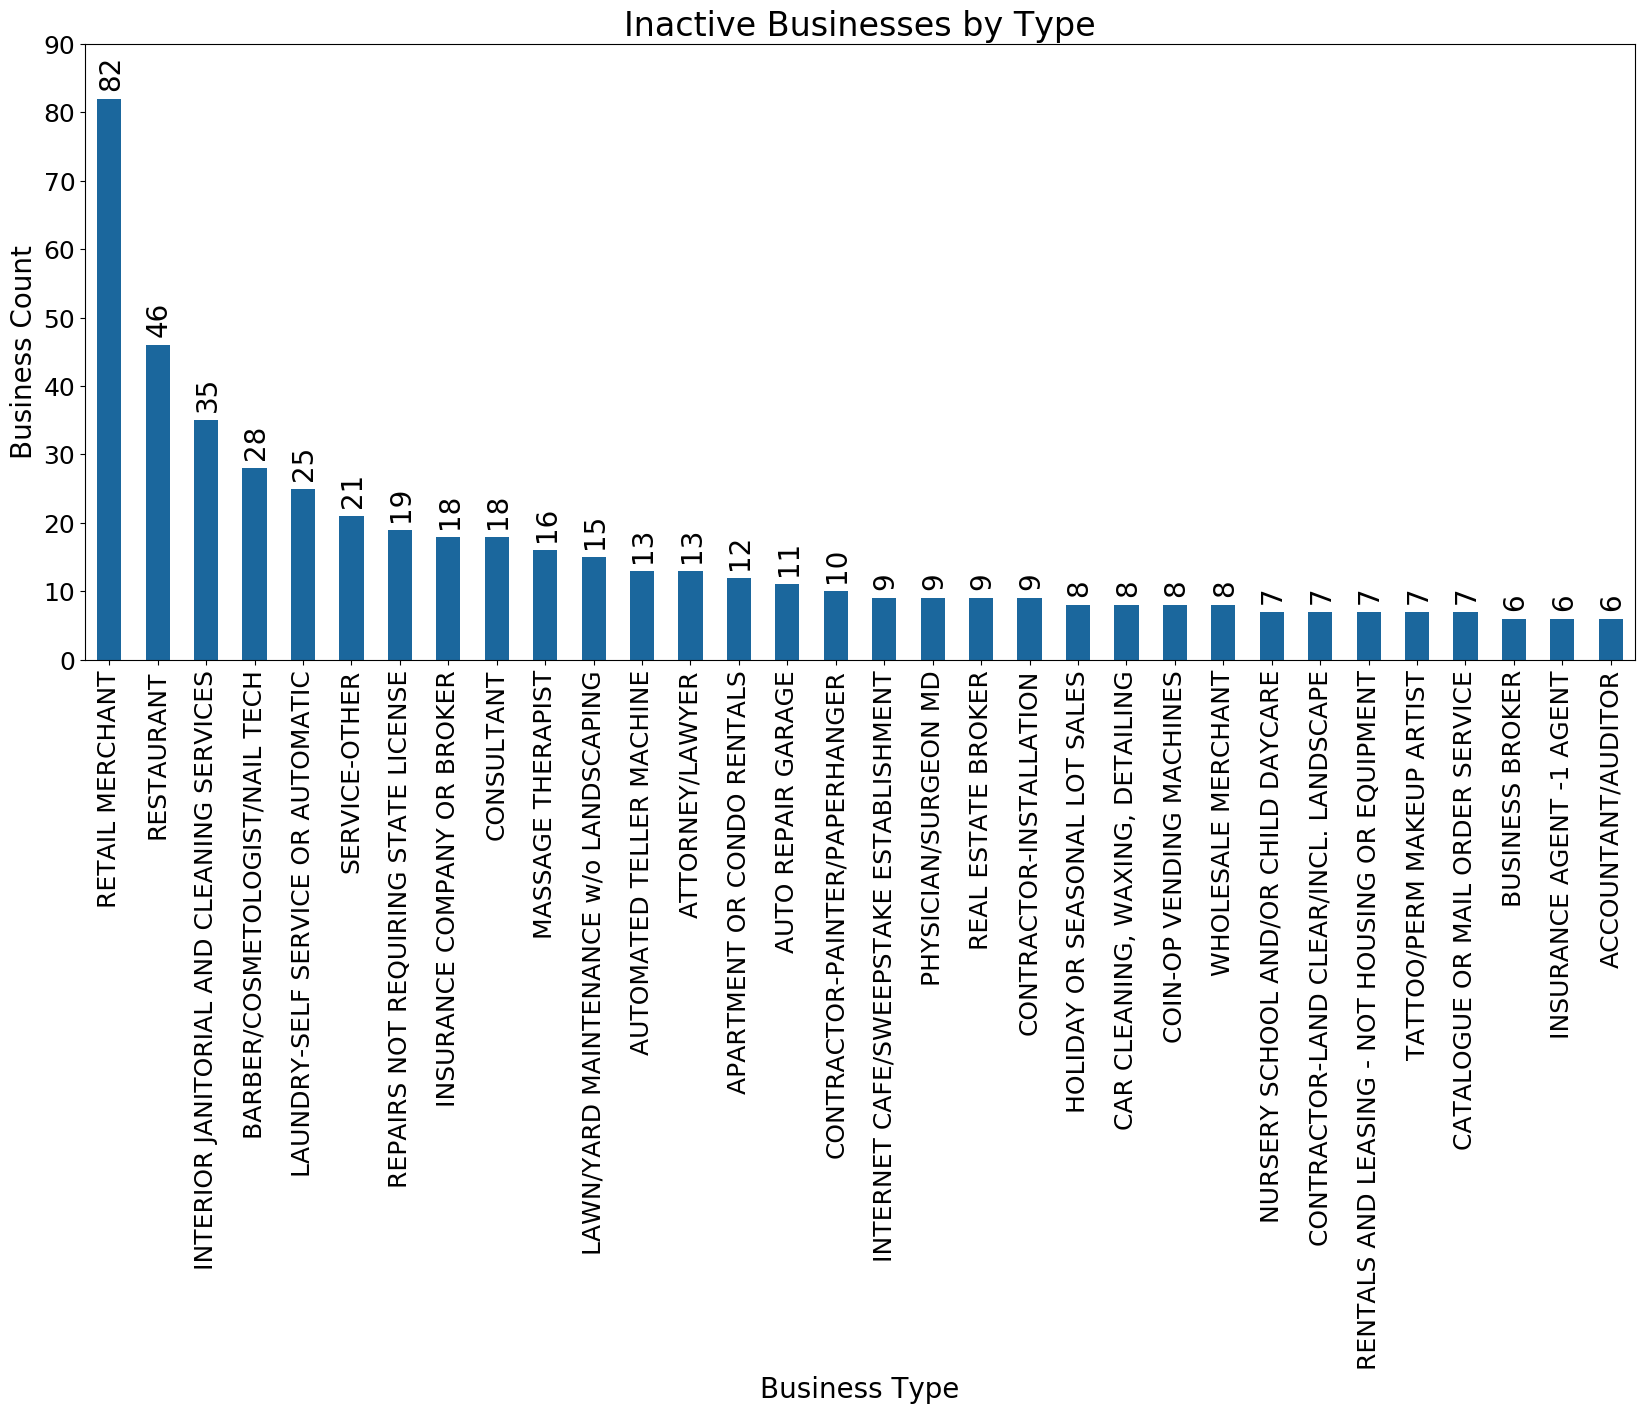

In [90]:
temp_series = inactive_business_df[inactive_business_df['business_type'].notnull()]['business_type'].value_counts()
temp_series.drop(labels=['PEDDLER', 'YARD PARKING PER ORDINANCE'], inplace=True)

ax = temp_series[temp_series > 5].plot(kind='bar', ylim=(0, 90), figsize=(20, 8))
ax.set_title('Inactive Businesses by Type')
ax.set_xlabel('Business Type')
ax.set_ylabel('Business Count')

for p in ax.patches:
    ax.annotate(str(int(np.round(p.get_height()))), (p.get_x() - .01, p.get_height() + 1.25), rotation =90, ha='left', va='bottom')

** Plot by NAICS type **

In [91]:
temp_series#.apply(lambda x: textwrap.wrap(x.get_text(), width=32))

RETAIL MERCHANT                                   82
RESTAURANT                                        46
INTERIOR JANITORIAL AND CLEANING SERVICES         35
BARBER/COSMETOLOGIST/NAIL TECH                    28
LAUNDRY-SELF SERVICE OR AUTOMATIC                 25
SERVICE-OTHER                                     21
REPAIRS NOT REQUIRING STATE LICENSE               19
INSURANCE COMPANY OR BROKER                       18
CONSULTANT                                        18
MASSAGE THERAPIST                                 16
LAWN/YARD MAINTENANCE w/o LANDSCAPING             15
AUTOMATED TELLER MACHINE                          13
ATTORNEY/LAWYER                                   13
APARTMENT OR CONDO RENTALS                        12
AUTO REPAIR GARAGE                                11
CONTRACTOR-PAINTER/PAPERHANGER                    10
INTERNET CAFE/SWEEPSTAKE ESTABLISHMENT             9
PHYSICIAN/SURGEON MD                               9
REAL ESTATE BROKER                            

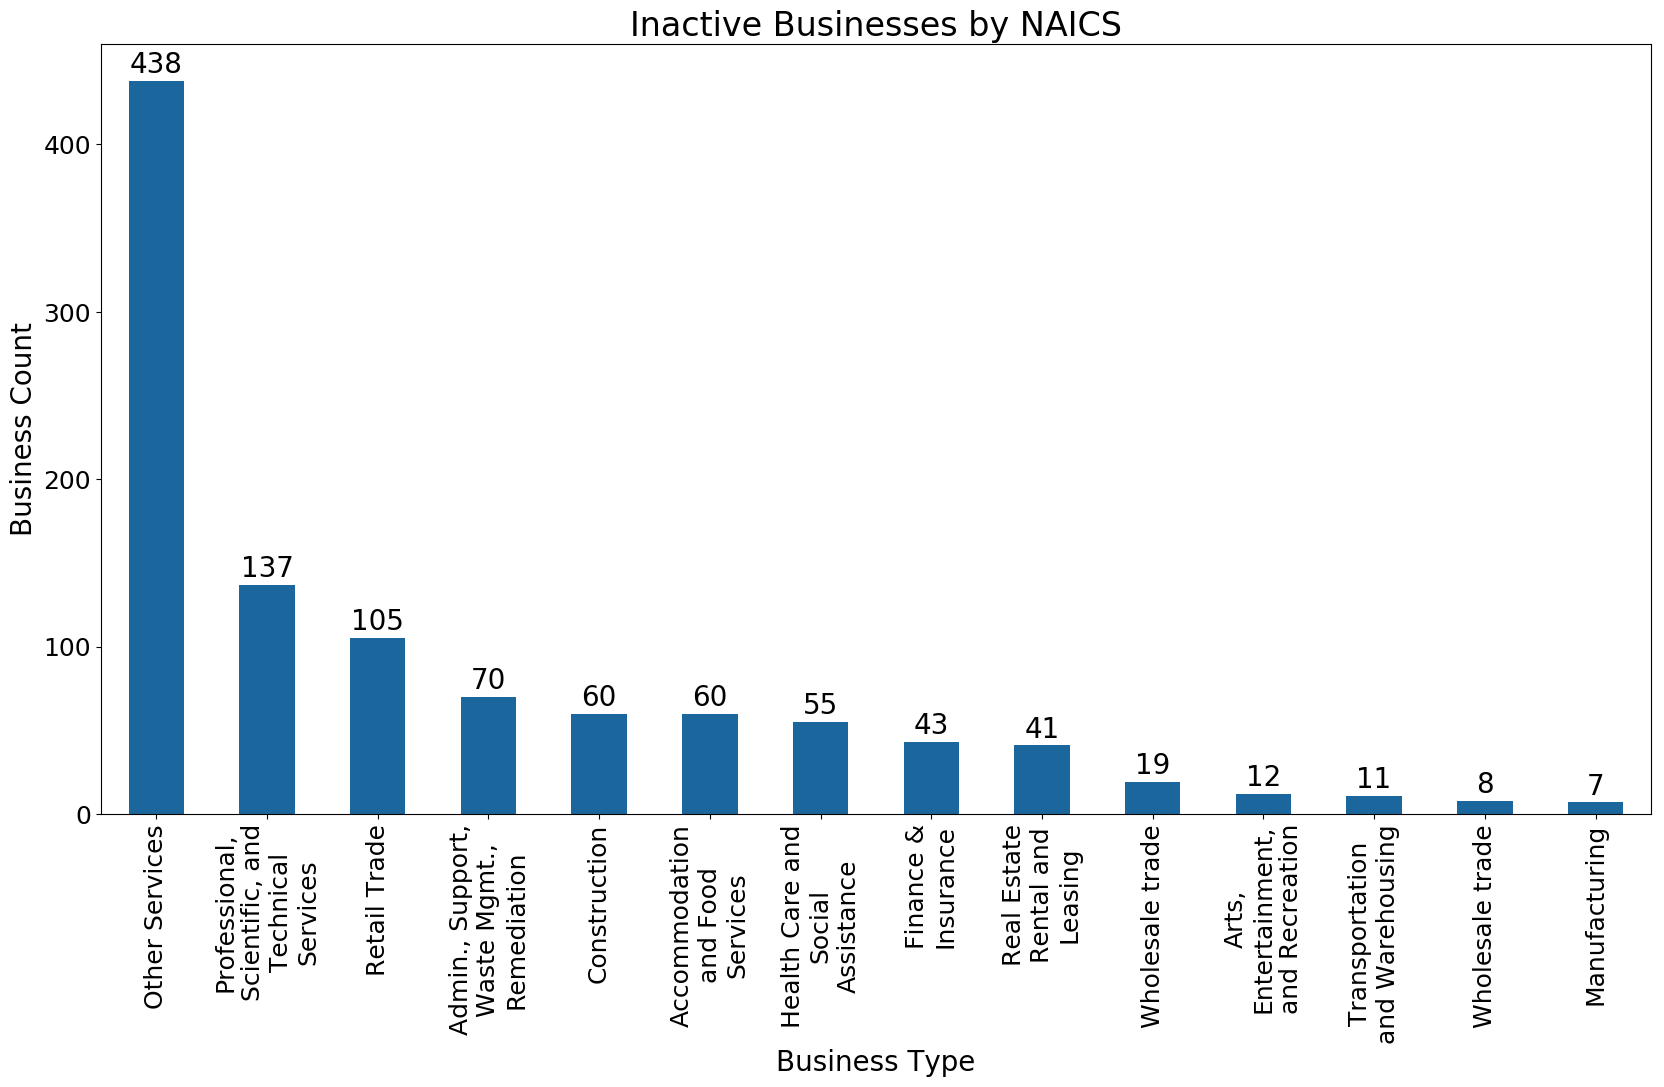

In [92]:
temp_series = inactive_business_df[inactive_business_df['NAICS Business Type'].notnull()]['NAICS Business Type'].value_counts()
temp_series.drop(labels=['Not found'], inplace=True)

ax = temp_series[temp_series > 5].plot(kind='bar', figsize=(20, 10))
ax.set_title('Inactive Businesses by NAICS')
ax.set_xlabel('Business Type')
ax.set_ylabel('Business Count')

# Shorten y axis labels
vals = ax.get_xticklabels()
ax.set_xticklabels(['\n'.join(textwrap.wrap(x.get_text(), width=16)) for x in vals])

# Annotate
for p in ax.patches:
    ax.annotate(str(int(np.round(p.get_height()))), (p.get_x() + p.get_width()/2, p.get_height() + 1.25), rotation=0, ha='center', va='bottom')

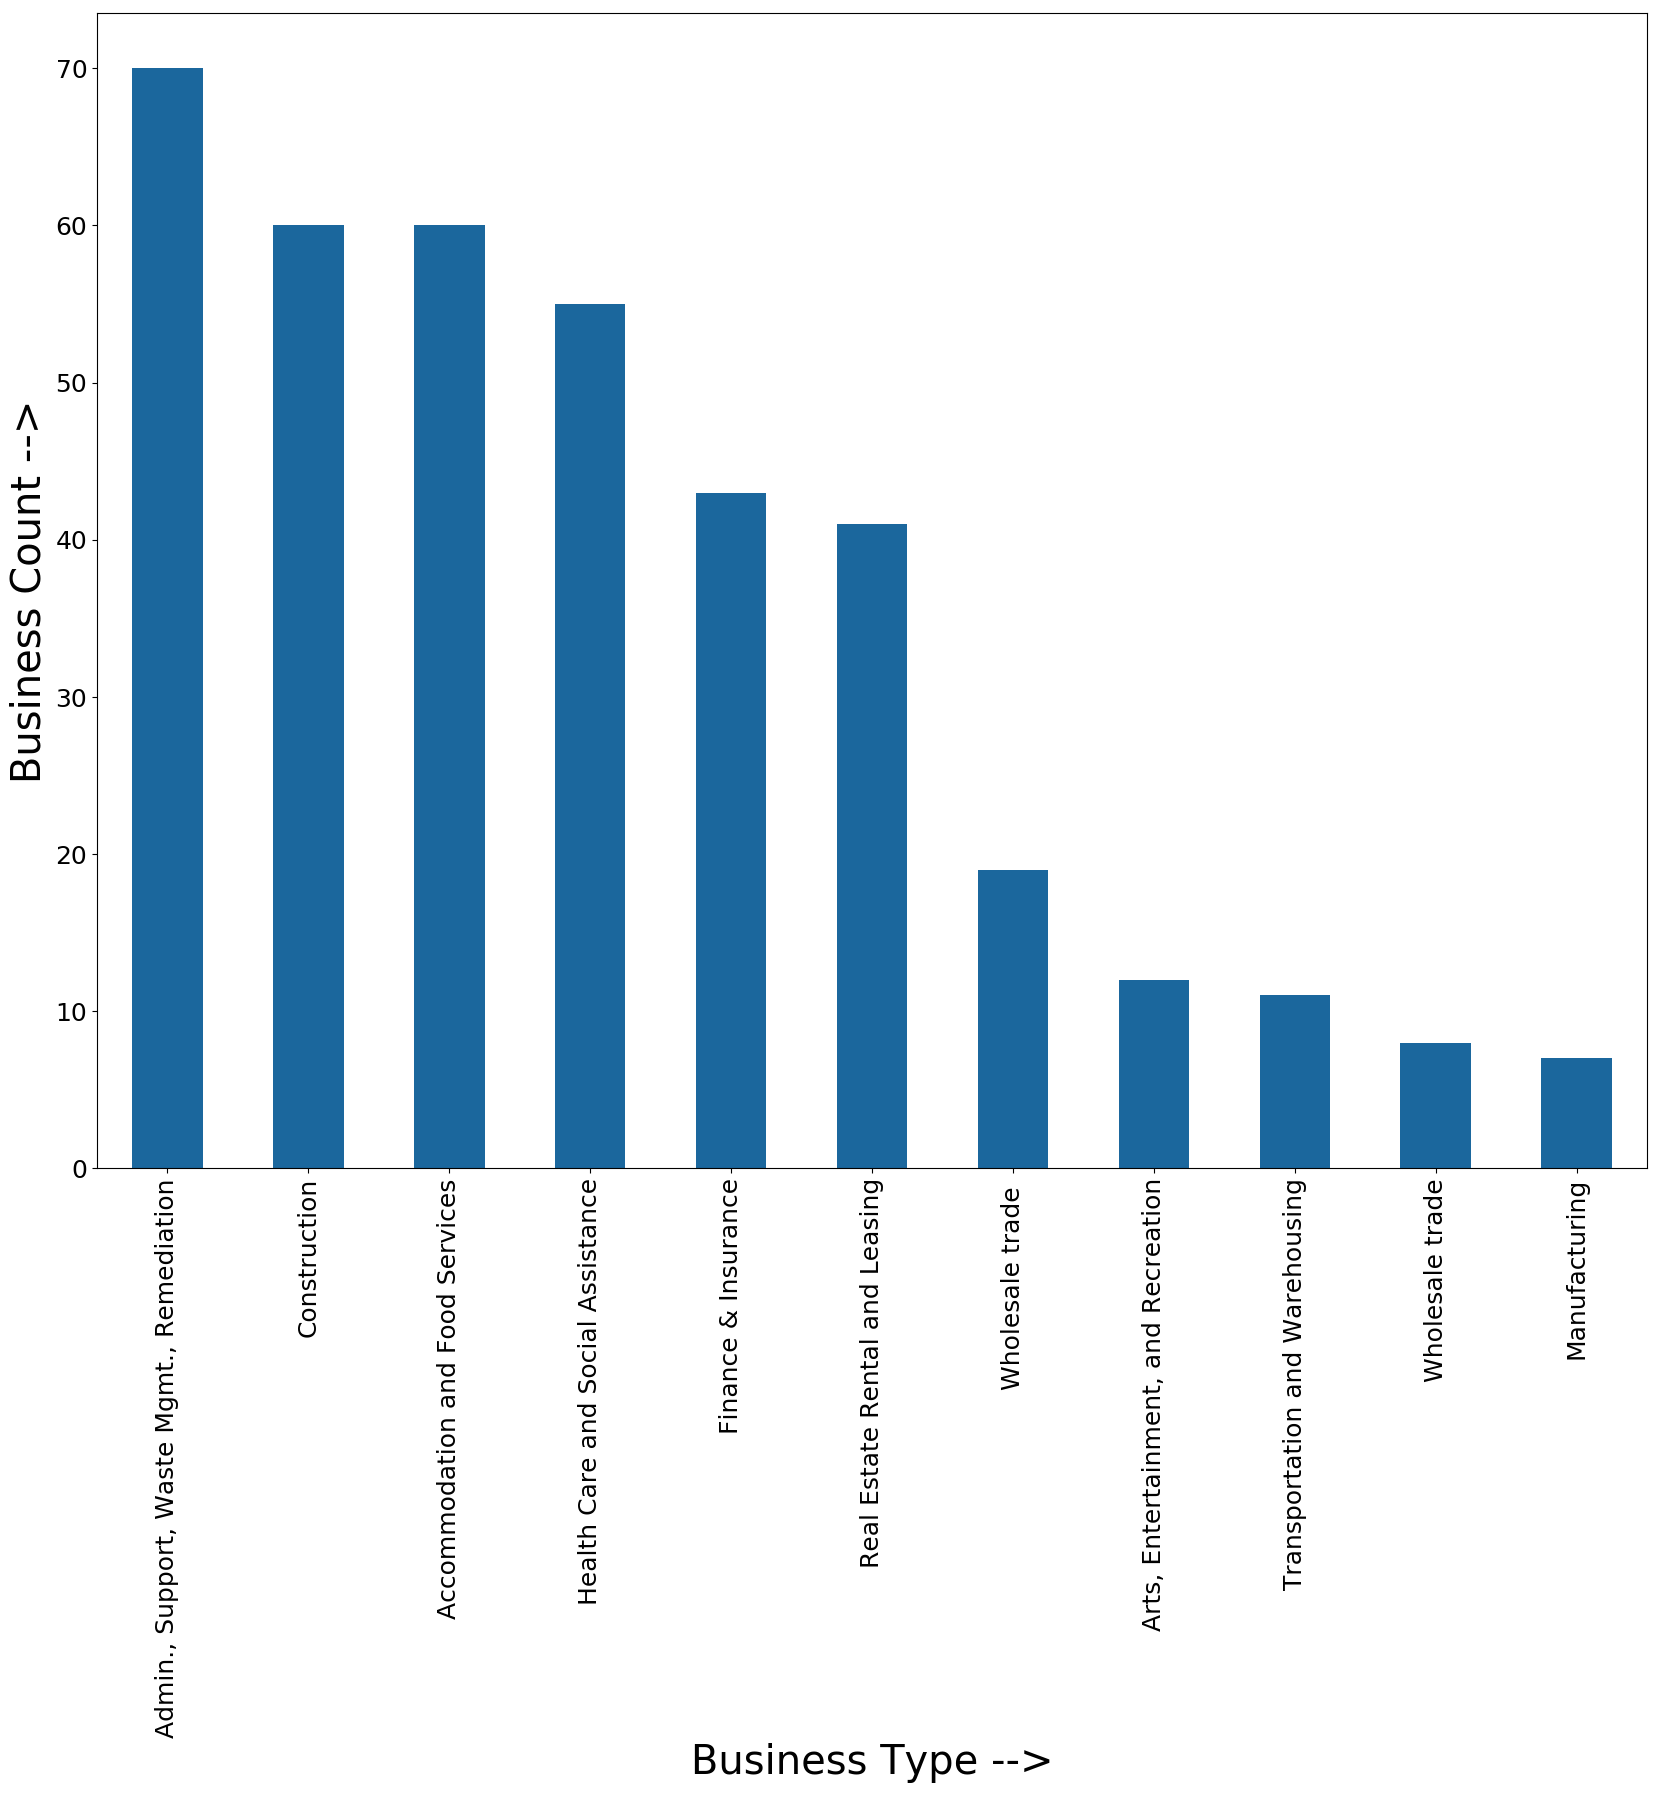

In [93]:
# TODO: normalize this somehow (think about it!)
ax = temp_series[(temp_series > 5) & (temp_series < 100)].plot(kind='bar',figsize=(20,15))
ax.set_xlabel('Business Type -->', size='x-large')
ax.set_ylabel('Business Count -->', size='x-large')

In [94]:
regions = []

In [95]:
def regionCheck(addr):
    if(type(addr) == str):
        if 'NW' in addr:
            regions.append("NW")
        elif 'SW' in addr:
            regions.append("SW")
        elif 'NE' in addr or 'WALDO RD' in addr:
            regions.append("NE")
        elif 'SE' in addr:
            regions.append("SE")
        elif ' N ' in addr:
            regions.append("N")
        elif ' S ' in addr:
            regions.append("S")
        elif ' E ' in addr:
            regions.append("E")
        elif ' W ' in addr:
            regions.append("W")
        elif 'UNI' in addr or 'UF' in addr:
            regions.append("UF")
        else:
            regions.append(addr)
    else:
        regions.append(addr)

In [96]:
inactive_business_df['location_address'].apply(regionCheck)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
8621    None
8622    None
8623    None
8624    None
8625    None
8626    None
8627    None
8628    None
8629    None
8630    None
8631    None
8632    None
8633    None
8634    None
8635    None
8636    None
8637    None
8638    None
8639    None
8640    None
8641    None
8642    None
8643    None
8644    None
8645    None
8646    None
8647    None
8648    None
8649    None
8650    None
Name: location_address, Length: 8651, dtype: object

In [97]:
region_series = pd.Series(regions)

In [98]:
inactive_business_df['region'] = region_series

In [99]:
inactive_business_df[inactive_business_df['region']=='W']

business_type     id  \
9                                NaN  30769   
11                               NaN  30304   
71                               NaN  22257   
158                              NaN  10225   
171                              NaN  33037   
233                              NaN  10341   
234                              NaN  26144   
237                              NaN  22719   
239                              NaN  27308   
250               ADVERTISING AGENCY  41316   
272                              NaN  25239   
315                              NaN  10456   
345                              NaN  25098   
357                              NaN  34175   
373                              NaN  10578   
418                              NaN  23645   
480                              NaN  24863   
485                              NaN  29178   
500                              NaN  10715   
513                              NaN  10749   
578                              NaN  25520   
581                              NaN  32701   
591                       RESTAURANT  39513   
605                              NaN  10897   
612                              NaN  10907   
652                              NaN  29987   
674                              NaN  10990   
689                              NaN  22196   
690                              NaN  11022   
733                              NaN  11092   
...                              ...    ...   
8046                             NaN  28072   
8064                             NaN  21115   
8066                             NaN  33524   
8125                             NaN  21221   
8143                             NaN  34471   
8146                             NaN  23163   
8157                             NaN  21278   
8184                             NaN  34285   
8250                             NaN  32086   
8254                             NaN  25387   
8310                             NaN  25397   
8328                             NaN  33722   
8336                             NaN  21567   
8383                             NaN  29180   
8396                             NaN  37901   
8414                             NaN  33536   
8440                             NaN  21696   
8445  BARBER/COSMETOLOGIST/NAIL TECH  39463   
8464                             NaN  30855   
8473                             NaN  32824   
8492                             NaN  33551   
8500       TATTOO/PERM MAKEUP ARTIST  40491   
8529                             NaN  21823   
8546                             NaN  21840   
8549                             NaN  27954   
8584                             NaN  32828   
8599                             NaN  26466   
8607                             NaN  34287   
8618                             NaN  34288   
8632                             NaN  24778   

                                          name start_date  \
9                        21ST CENTURY REPTILES 2004-09-01   
11                                  238 WEST.. 2004-04-02   
71                   AAA AUTO CLUB SOUTH, INC. 1996-07-15   
158                            AFFAIRS BY FAYE 1985-09-06   
171                    AHRE INVESTORS TWO, INC 2005-03-01   
233           ALFREDA S ALTERATION & TAILORING 1990-11-01   
234                            ALHAMRA KITCHEN 2000-07-01   
237                    ALL AMERICA HOMES, INC. 1997-01-31   
239                         ALL AMERICAN NAILS 2001-10-10   
250                       ALLBRITTON MEDIA INC 2014-10-27   
272           ALLSTATE FLORIDIAN INSURANCE CO. 1986-01-19   
315                    AMERICAN COINS & STAMPS 1990-03-12   
345           AMERICAN SATELLITE & VIDEO, INC. 1999-08-15   
357                        AMORE PIZZA & PASTA 2006-11-01   
373                     ANDERSON, JON, PRINTER 1982-03-10   
418                  APEX CAR RENTAL SYS. INC. 1997-10-25   
480                ARTWORKS GALLERY & BOUTIQUE 1999-04-13   
485       

In [100]:
region_arr = ['NE','NW','SE','SW','S','N','E','W','UF']

In [101]:
region_series_temp = region_series.apply(lambda x: x if x in region_arr else None)

In [102]:
region_series_temp.dropna().value_counts()#(normalize = True).apply(lambda x : x*100)

NW    3774
NE    1391
SW     937
W      472
SE     290
N      209
S      126
E      124
UF      43
dtype: int64

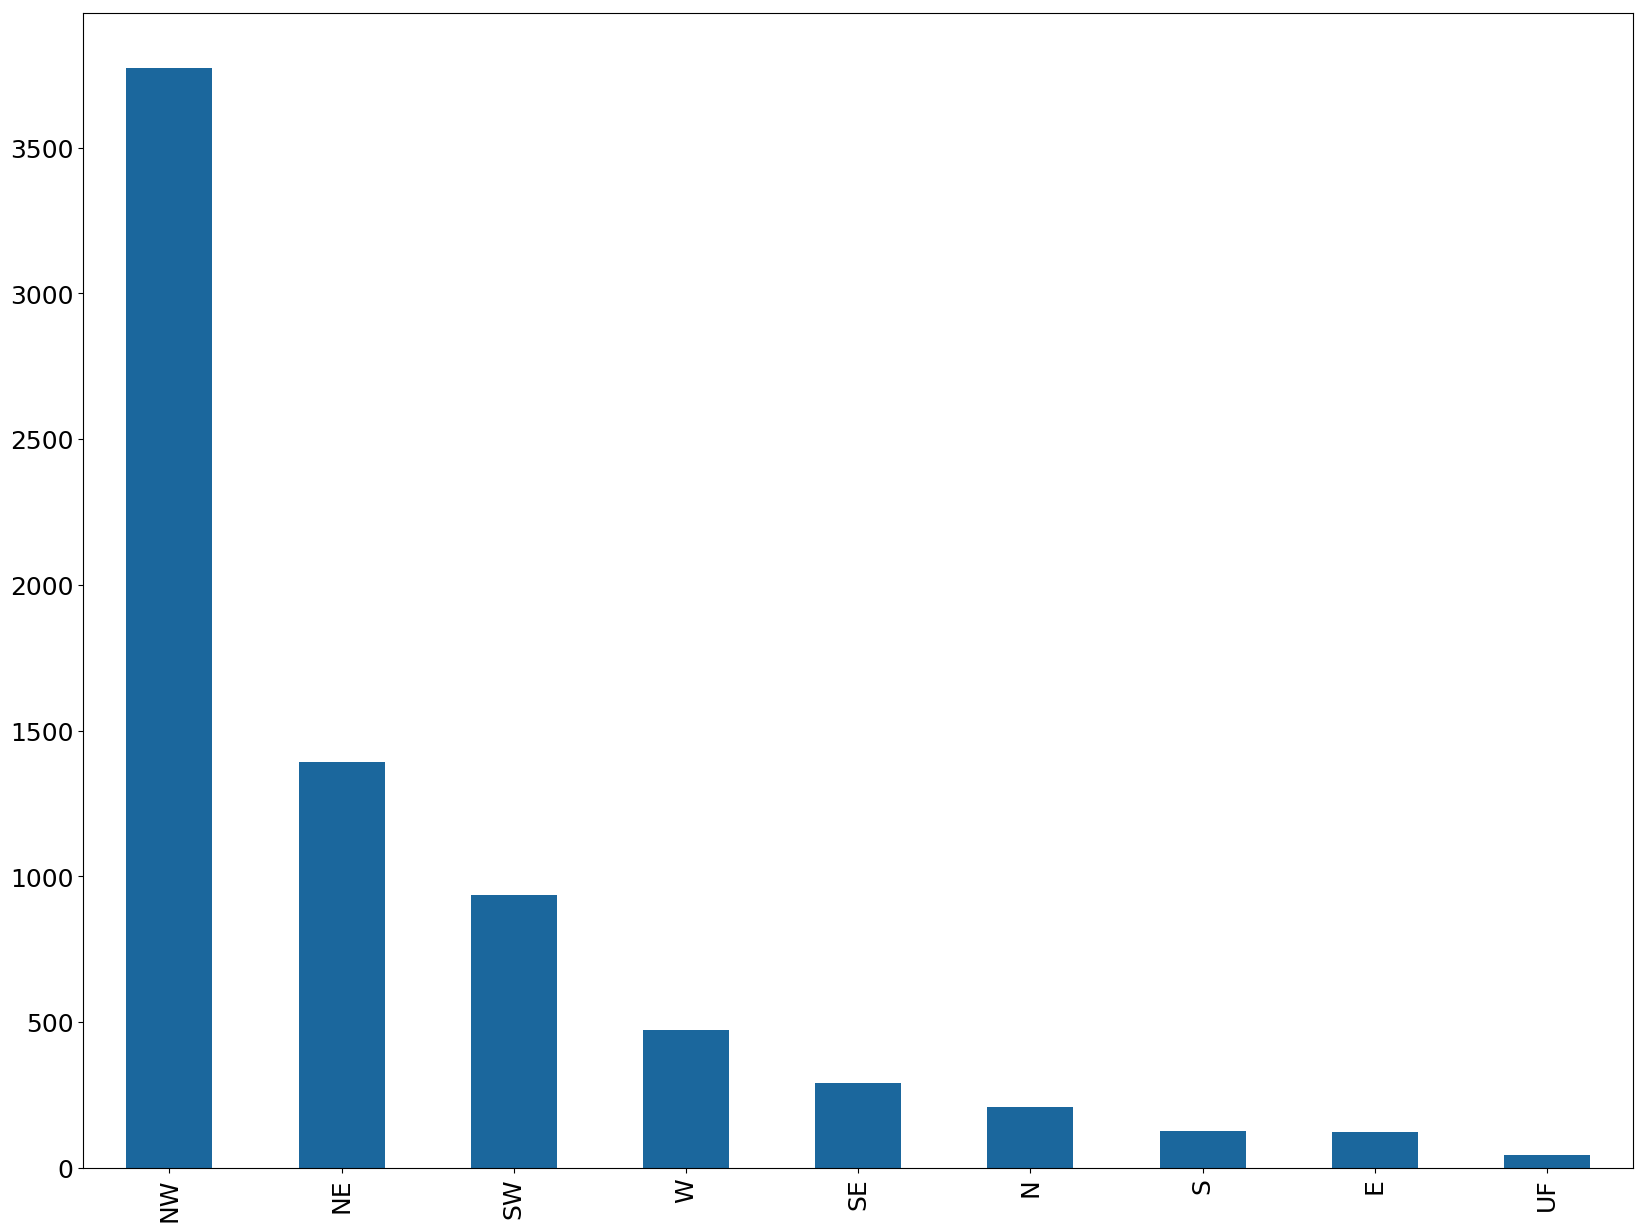

In [103]:
region_series_temp.dropna().value_counts().plot(kind='bar', figsize=(20,15))

In [104]:
regions = []

In [105]:
active_businesses_df['location_address'].apply(regionCheck)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
7057    None
7058    None
7059    None
7060    None
7061    None
7062    None
7063    None
7064    None
7065    None
7066    None
7067    None
7068    None
7069    None
7070    None
7071    None
7072    None
7073    None
7074    None
7075    None
7076    None
7077    None
7078    None
7079    None
7080    None
7081    None
7082    None
7083    None
7084    None
7085    None
7086    None
Name: location_address, Length: 7087, dtype: object

In [106]:
pd.Series(regions).apply(lambda x: x if x in region_arr else None).value_counts()

NW    3117
NE    1252
SW    1110
W      306
SE     252
N      204
S       96
E       86
UF      41
dtype: int64

In [107]:
pd.Series(regions).apply(lambda x: x if x in region_arr else None).value_counts() + region_series_temp.dropna().value_counts()

NW    6891
NE    2643
SW    2047
W      778
SE     542
N      413
S      222
E      210
UF      84
dtype: int64

In [108]:
lifespan_nw = inactive_business_df[inactive_business_df['region']=='NW']['life_span']

In [109]:
temp_nw = lifespan_nw[lifespan_nw > 30].value_counts()

In [110]:
temp_nw

730     9
58      8
571     7
733     6
741     6
378     6
736     6
362     6
361     6
191     6
921     6
115     5
732     5
315     5
123     5
182     5
266     5
64      5
364     5
347     5
623     5
90      5
461     5
521     5
51      5
489     5
393     5
452     5
853     5
956     5
       ..
2544    1
2548    1
2550    1
2494    1
443     1
377     1
2456    1
381     1
2430    1
383     1
2436    1
397     1
1399    1
2448    1
2450    1
2452    1
407     1
4507    1
4537    1
4509    1
2462    1
417     1
1642    1
2472    1
433     1
8627    1
2484    1
437     1
6582    1
2049    1
Name: life_span, Length: 2028, dtype: int64

In [111]:
plot_lifespan_by_months(temp_nw)

NameError: name 'plot_lifespan_by_months' is not defined

In [ ]:
inactive_business_df